# PLOTTING NETWORKS IN *R*

* **Install R: http://archive.linux.duke.edu/cran/**
* **Install Jupyter (iPython Notebook): http://continuum.io/downloads**
* **Install the R kernel for Jupyter: https://github.com/IRkernel/IRkernel**

[1. Defining (Importing or Constructing) a Network in *R*](#1)

* [1.1 Working in *network* and *sna*](#1.1)
* [1.2 Working in *igraph*](#1.2)

[2. Network Visualization in *R*](#2)

* [2.1 Plotting in *sna*](#2.1)
* [2.2 Vertex Attributes and Edge Labels (Weights) in *sna*](#2.2)
* [2.3 Plotting in *igraph*](#2.3)
* [2.4 Network Layouts in *igraph*](#2.4)
* [2.5 Vertex and Edge Attributes in *igraph*](#2.5)

<a id='1'></a>
## 1. Defining (Importing or Constructing) a Network in *R*

<a id='1.1'></a>
### 1.1 Working in *network*

### 1.1.1 Built-In Datasets

In [1]:
library(network)        # Make sure that network package is loaded
# library(sna)           # It is not needed to load for what we are doing here
data(package="network") # List available datasets in network package
help("network-package")

# # Useful info (help):

# ?list.files
# ?read.csv
# ?as.matrix
# ?rownames
# ?colnames
# ?network
# ?as.network.matrix
# ?summary.network
# ?network.dyadcount
# ?network.edgecount
# ?as.sociomatrix
# ?as.matrix.network
# ?is.directed
# ?plot

network: Classes for Relational Data
Version 1.13.0 created on 2015-08-31.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
                    Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Martina Morris, University of Washington
                    Skye Bender-deMoll, University of Washington
 For citation information, type citation("network").
 Type help("network-package") to get started.



#### Import the Florentine Network

In [2]:
data(flo)               # Load a built-in data set for the Florentine network
?flo
flo                     # Examine the flo adjacency matrix
class(flo)

Acciaiuoli Albizzi Barbadori Bischeri Castellani Ginori Guadagni
Acciaiuoli   0          0       0         0        0          0      0       
Albizzi      0          0       0         0        0          1      1       
Barbadori    0          0       0         0        1          0      0       
Bischeri     0          0       0         0        0          0      1       
Castellani   0          0       1         0        0          0      0       
Ginori       0          1       0         0        0          0      0       
Guadagni     0          1       0         1        0          0      0       
Lamberteschi 0          0       0         0        0          0      1       
Medici       1          1       1         0        0          0      0       
Pazzi        0          0       0         0        0          0      0       
Peruzzi      0          0       0         1        1          0      0       
Pucci        0          0       0         0        0          0      0       
Ridolfi      0          0       0         0        0          0      0       
Salviati     0          0       0         0        0          0      0       
Strozzi      0          0       0         1        1          0      0       
Tornabuoni   0          0       0         0        0          0      1       
             Lamberteschi Medici Pazzi Peruzzi Pucci Ridolfi Salviati Strozzi
Acciaiuoli   0            1      0     0       0     0       0        0      
Albizzi      0            1      0     0       0     0       0        0      
Barbadori    0            1      0     0       0     0       0        0      
Bischeri     0            0      0     1       0     0       0        1      
Castellani   0            0      0     1       0     0       0        1      
Ginori       0            0      0     0       0     0       0        0      
Guadagni     1            0      0     0       0     0       0        0      
Lamberteschi 0            0      0     0       0     0       0        0      
Medici       0            0      0     0       0     1       1        0      
Pazzi        0            0      0     0       0     0       1        0      
Peruzzi      0            0      0     0       0     0       0        1      
Pucci        0            0      0     0       0     0       0        0      
Ridolfi      0            1      0     0       0     0       0        1      
Salviati     0            1      1     0       0     0       0        0      
Strozzi      0            0      0     1       0     1       0        0      
Tornabuoni   0            1      0     0       0     1       0        0      
             Tornabuoni
Acciaiuoli   0         
Albizzi      0         
Barbadori    0         
Bischeri     0         
Castellani   0         
Ginori       0         
Guadagni     1         
Lamberteschi 0         
Medici       1         
Pazzi        0         
Peruzzi      0         
Pucci        0         
Ridolfi      1         
Salviati     0         
Strozzi      0         
Tornabuoni   0

[1] "matrix"

#### Creating Network Object

In [3]:
g <- network(flo,directed=FALSE)       # Create a network object based on flo
g                                      # Get a quick description of the data

 Network attributes:
  vertices = 16 
  directed = FALSE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 20 
    missing edges= 0 
    non-missing edges= 20 

 Vertex attribute names: 
    vertex.names 

No edge attributes

#### Network Description

In [4]:
summary(g)           # Get an overall summary
network.dyadcount(g) # How many dyads in nflo?
network.edgecount(g) # How many edges are present?
network.size(g)      # How large is the network?
as.sociomatrix(g)    # Show it as a sociomatrix
g[,]                 # Another way to do it

Network attributes:
  vertices = 16
  directed = FALSE
  hyper = FALSE
  loops = FALSE
  multiple = FALSE
  bipartite = FALSE
 total edges = 20 
   missing edges = 0 
   non-missing edges = 20 
 density = 0.1666667 

Vertex attributes:
  vertex.names:
   character valued attribute
   16 valid vertex names

No edge attributes

Network edgelist matrix:
      [,1] [,2]
 [1,]    9    1
 [2,]    6    2
 [3,]    7    2
 [4,]    9    2
 [5,]    5    3
 [6,]    9    3
 [7,]    7    4
 [8,]   11    4
 [9,]   15    4
[10,]   11    5
[11,]   15    5
[12,]    8    7
[13,]   16    7
[14,]   13    9
[15,]   14    9
[16,]   16    9
[17,]   14   10
[18,]   15   11
[19,]   15   13
[20,]   16   13

[1] 120

[1] 20

[1] 16

Acciaiuoli Albizzi Barbadori Bischeri Castellani Ginori Guadagni
Acciaiuoli   0          0       0         0        0          0      0       
Albizzi      0          0       0         0        0          1      1       
Barbadori    0          0       0         0        1          0      0       
Bischeri     0          0       0         0        0          0      1       
Castellani   0          0       1         0        0          0      0       
Ginori       0          1       0         0        0          0      0       
Guadagni     0          1       0         1        0          0      0       
Lamberteschi 0          0       0         0        0          0      1       
Medici       1          1       1         0        0          0      0       
Pazzi        0          0       0         0        0          0      0       
Peruzzi      0          0       0         1        1          0      0       
Pucci        0          0       0         0        0          0      0       
Ridolfi      0          0       0         0        0          0      0       
Salviati     0          0       0         0        0          0      0       
Strozzi      0          0       0         1        1          0      0       
Tornabuoni   0          0       0         0        0          0      1       
             Lamberteschi Medici Pazzi Peruzzi Pucci Ridolfi Salviati Strozzi
Acciaiuoli   0            1      0     0       0     0       0        0      
Albizzi      0            1      0     0       0     0       0        0      
Barbadori    0            1      0     0       0     0       0        0      
Bischeri     0            0      0     1       0     0       0        1      
Castellani   0            0      0     1       0     0       0        1      
Ginori       0            0      0     0       0     0       0        0      
Guadagni     1            0      0     0       0     0       0        0      
Lamberteschi 0            0      0     0       0     0       0        0      
Medici       0            0      0     0       0     1       1        0      
Pazzi        0            0      0     0       0     0       1        0      
Peruzzi      0            0      0     0       0     0       0        1      
Pucci        0            0      0     0       0     0       0        0      
Ridolfi      0            1      0     0       0     0       0        1      
Salviati     0            1      1     0       0     0       0        0      
Strozzi      0            0      0     1       0     1       0        0      
Tornabuoni   0            1      0     0       0     1       0        0      
             Tornabuoni
Acciaiuoli   0         
Albizzi      0         
Barbadori    0         
Bischeri     0         
Castellani   0         
Ginori       0         
Guadagni     1         
Lamberteschi 0         
Medici       1         
Pazzi        0         
Peruzzi      0         
Pucci        0         
Ridolfi      1         
Salviati     0         
Strozzi      0         
Tornabuoni   0

Acciaiuoli Albizzi Barbadori Bischeri Castellani Ginori Guadagni
Acciaiuoli   0          0       0         0        0          0      0       
Albizzi      0          0       0         0        0          1      1       
Barbadori    0          0       0         0        1          0      0       
Bischeri     0          0       0         0        0          0      1       
Castellani   0          0       1         0        0          0      0       
Ginori       0          1       0         0        0          0      0       
Guadagni     0          1       0         1        0          0      0       
Lamberteschi 0          0       0         0        0          0      1       
Medici       1          1       1         0        0          0      0       
Pazzi        0          0       0         0        0          0      0       
Peruzzi      0          0       0         1        1          0      0       
Pucci        0          0       0         0        0          0      0       
Ridolfi      0          0       0         0        0          0      0       
Salviati     0          0       0         0        0          0      0       
Strozzi      0          0       0         1        1          0      0       
Tornabuoni   0          0       0         0        0          0      1       
             Lamberteschi Medici Pazzi Peruzzi Pucci Ridolfi Salviati Strozzi
Acciaiuoli   0            1      0     0       0     0       0        0      
Albizzi      0            1      0     0       0     0       0        0      
Barbadori    0            1      0     0       0     0       0        0      
Bischeri     0            0      0     1       0     0       0        1      
Castellani   0            0      0     1       0     0       0        1      
Ginori       0            0      0     0       0     0       0        0      
Guadagni     1            0      0     0       0     0       0        0      
Lamberteschi 0            0      0     0       0     0       0        0      
Medici       0            0      0     0       0     1       1        0      
Pazzi        0            0      0     0       0     0       1        0      
Peruzzi      0            0      0     0       0     0       0        1      
Pucci        0            0      0     0       0     0       0        0      
Ridolfi      0            1      0     0       0     0       0        1      
Salviati     0            1      1     0       0     0       0        0      
Strozzi      0            0      0     1       0     1       0        0      
Tornabuoni   0            1      0     0       0     1       0        0      
             Tornabuoni
Acciaiuoli   0         
Albizzi      0         
Barbadori    0         
Bischeri     0         
Castellani   0         
Ginori       0         
Guadagni     1         
Lamberteschi 0         
Medici       1         
Pazzi        0         
Peruzzi      0         
Pucci        0         
Ridolfi      1         
Salviati     0         
Strozzi      0         
Tornabuoni   0

#### Network Plot

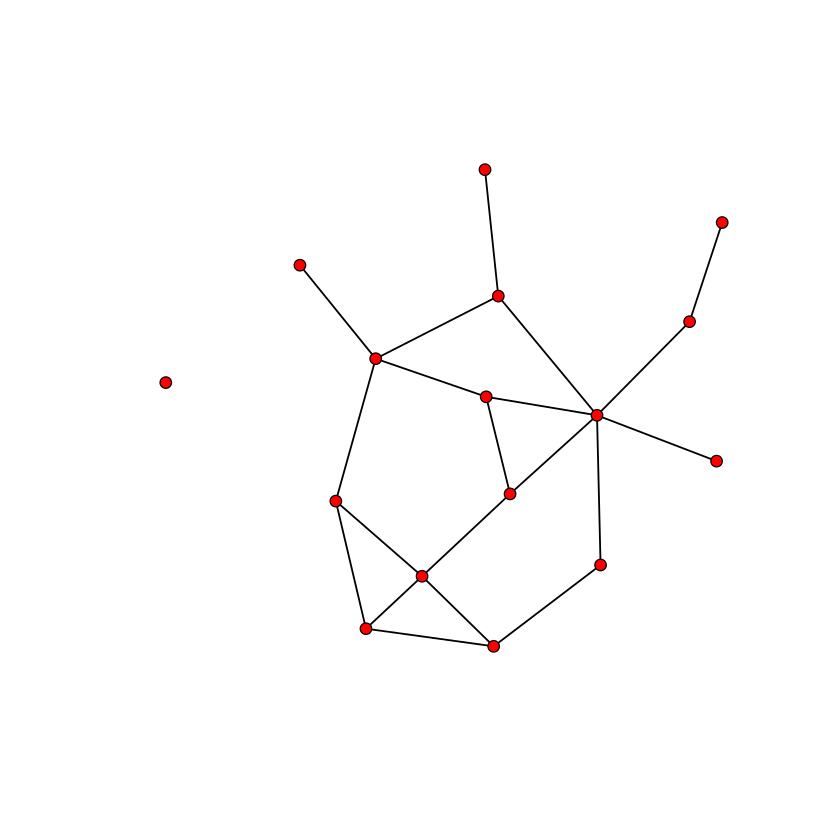

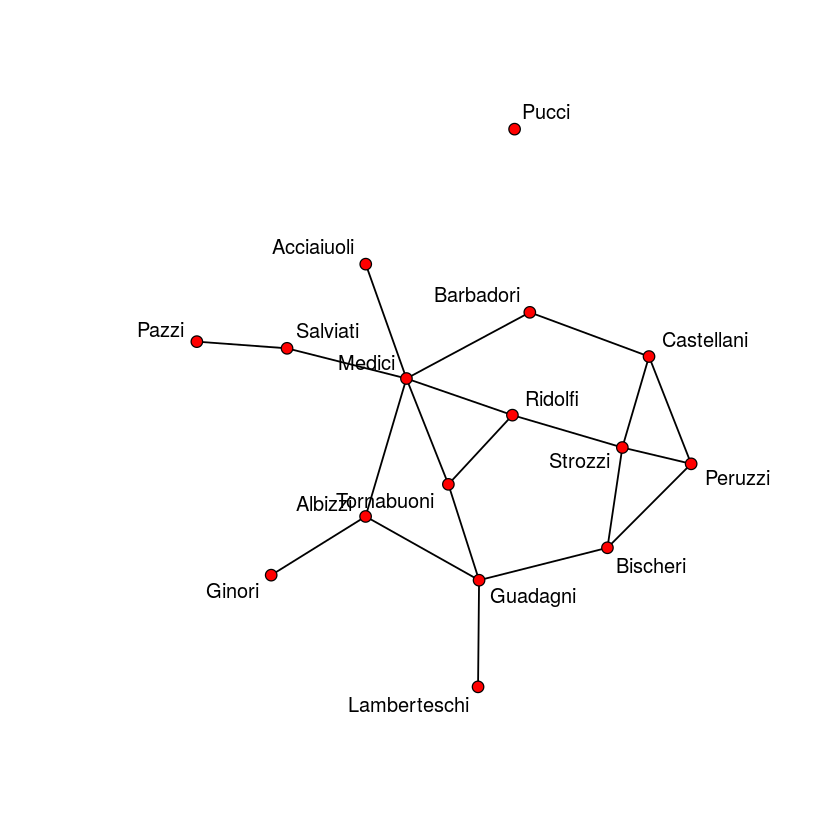

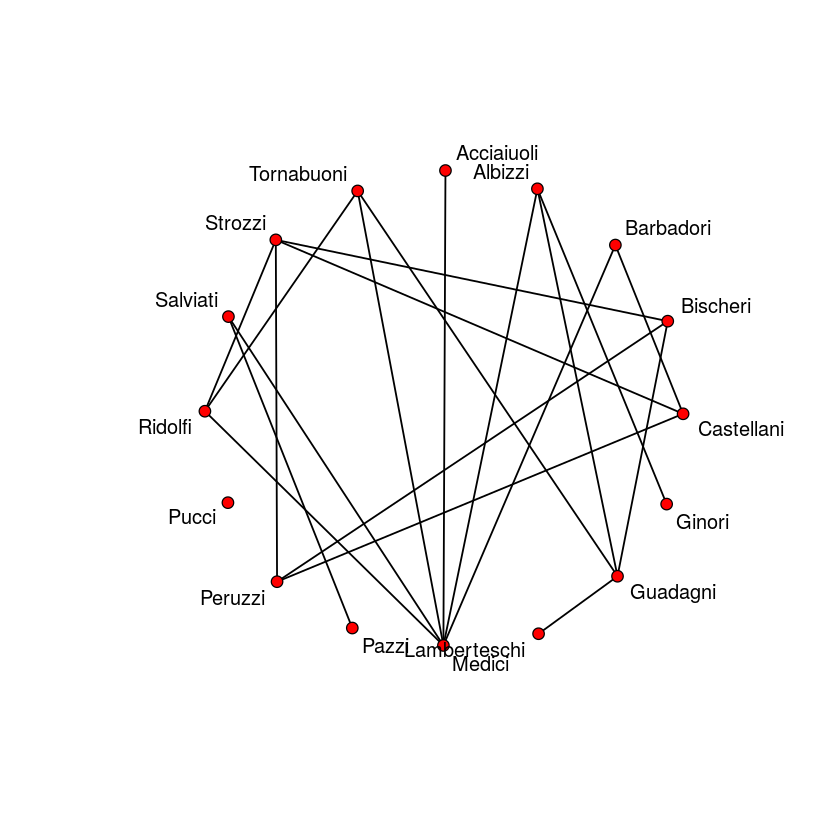

In [5]:
plot(g)                                            # Default plot is WITHOUT NAMES of nodes
plot(g,displaylabels=T)                            # Plot with names of nodes
# The default layout is Fruchterman-Reingold. Another (common) layout is:
plot(g,displaylabels=T,mode="circle")              # In the circular layout

### 1.1.2 Importing Network from a *csv* File

In [6]:
# list.files() # Check what's in the working directory

# Download the file "relationalAttributes.csv" 
# from https://statnet.org/trac/raw-attachment/wiki/Sunbelt2016/relationalData.csv

relations <- read.csv("relationalData.csv",header=FALSE,stringsAsFactors=FALSE)
relations

V1 V2 V3 V4 V5 V6 V7 V8 V9
1 0  0  0  1  1  1  0  0  0 
2 0  0  0  0  0  1  0  0  0 
3 0  0  0  0  0  0  1  0  1 
4 1  0  0  0  1  0  0  0  0 
5 1  0  0  1  0  0  0  0  0 
6 1  1  0  0  0  0  0  0  1 
7 0  0  1  0  0  0  0  0  1 
8 0  0  0  0  0  0  0  0  0 
9 0  0  1  0  0  1  1  0  0

In [7]:
relations <- as.matrix(relations) # convert to matrix format
relations

V1 V2 V3 V4 V5 V6 V7 V8 V9
 [1,] 0  0  0  1  1  1  0  0  0 
 [2,] 0  0  0  0  0  1  0  0  0 
 [3,] 0  0  0  0  0  0  1  0  1 
 [4,] 1  0  0  0  1  0  0  0  0 
 [5,] 1  0  0  1  0  0  0  0  0 
 [6,] 1  1  0  0  0  0  0  0  1 
 [7,] 0  0  1  0  0  0  0  0  1 
 [8,] 0  0  0  0  0  0  0  0  0 
 [9,] 0  0  1  0  0  1  1  0  0

In [8]:
# Download the file "vertexAttributes.csv" 
# from https://statnet.org/trac/raw-attachment/wiki/Sunbelt2016/vertexAttributes.csv

nodeInfo <- read.csv("vertexAttributes.csv",header=TRUE,stringsAsFactors=FALSE)
nodeInfo

id   name     age sex handed lastDocVisit
1 5012 Danielle 44  F   R      2012        
2 2331 Josh     44  M   R      2008        
3 1989 Mark     40  M   R      2010        
4 2217 Emma     32  F   L      2012        
5 2912 Sarah    33  F   R      2011        
6 6604 Dave     36  M   L      2007        
7 7201 Theresa  38  F   L      2009        
8 4929 Carolyn  42  F   R      2009        
9 8167 Gil      30  M   L      2010

In [9]:
# Add row/column names 

rownames(relations) <- nodeInfo$name
colnames(relations) <- nodeInfo$name
relations

Danielle Josh Mark Emma Sarah Dave Theresa Carolyn Gil
Danielle 0        0    0    1    1     1    0       0       0  
Josh     0        0    0    0    0     1    0       0       0  
Mark     0        0    0    0    0     0    1       0       1  
Emma     1        0    0    0    1     0    0       0       0  
Sarah    1        0    0    1    0     0    0       0       0  
Dave     1        1    0    0    0     0    0       0       1  
Theresa  0        0    1    0    0     0    0       0       1  
Carolyn  0        0    0    0    0     0    0       0       0  
Gil      0        0    1    0    0     1    1       0       0

#### Creating Network Object

In [10]:
g <- network(relations,directed=FALSE) # Create a network object based on relations
g                                      # Get a quick description of the data

 Network attributes:
  vertices = 9 
  directed = FALSE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 9 
    missing edges= 0 
    non-missing edges= 9 

 Vertex attribute names: 
    vertex.names 

No edge attributes

#### Network Description

In [11]:
summary(g)           # Get an overall summary
network.dyadcount(g) # How many dyads in nflo?
network.edgecount(g) # How many edges are present?
network.size(g)      # How large is the network?
as.sociomatrix(g)    # Show it as a sociomatrix
g[,]                 # Another way to do it

Network attributes:
  vertices = 9
  directed = FALSE
  hyper = FALSE
  loops = FALSE
  multiple = FALSE
  bipartite = FALSE
 total edges = 9 
   missing edges = 0 
   non-missing edges = 9 
 density = 0.25 

Vertex attributes:
  vertex.names:
   character valued attribute
   9 valid vertex names

No edge attributes

Network adjacency matrix:
         Danielle Josh Mark Emma Sarah Dave Theresa Carolyn Gil
Danielle        0    0    0    1     1    1       0       0   0
Josh            0    0    0    0     0    1       0       0   0
Mark            0    0    0    0     0    0       1       0   1
Emma            1    0    0    0     1    0       0       0   0
Sarah           1    0    0    1     0    0       0       0   0
Dave            1    1    0    0     0    0       0       0   1
Theresa         0    0    1    0     0    0       0       0   1
Carolyn         0    0    0    0     0    0       0       0   0
Gil             0    0    1    0     0    1       1       0   0

[1] 36

[1] 9

[1] 9

Danielle Josh Mark Emma Sarah Dave Theresa Carolyn Gil
Danielle 0        0    0    1    1     1    0       0       0  
Josh     0        0    0    0    0     1    0       0       0  
Mark     0        0    0    0    0     0    1       0       1  
Emma     1        0    0    0    1     0    0       0       0  
Sarah    1        0    0    1    0     0    0       0       0  
Dave     1        1    0    0    0     0    0       0       1  
Theresa  0        0    1    0    0     0    0       0       1  
Carolyn  0        0    0    0    0     0    0       0       0  
Gil      0        0    1    0    0     1    1       0       0

Danielle Josh Mark Emma Sarah Dave Theresa Carolyn Gil
Danielle 0        0    0    1    1     1    0       0       0  
Josh     0        0    0    0    0     1    0       0       0  
Mark     0        0    0    0    0     0    1       0       1  
Emma     1        0    0    0    1     0    0       0       0  
Sarah    1        0    0    1    0     0    0       0       0  
Dave     1        1    0    0    0     0    0       0       1  
Theresa  0        0    1    0    0     0    0       0       1  
Carolyn  0        0    0    0    0     0    0       0       0  
Gil      0        0    1    0    0     1    1       0       0

#### Network Plot

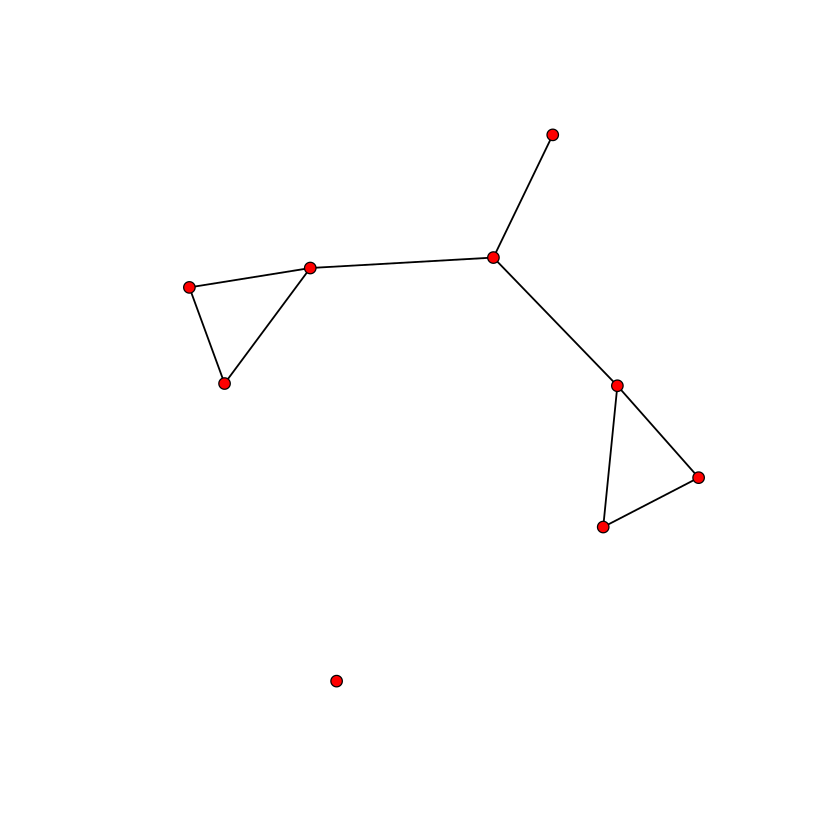

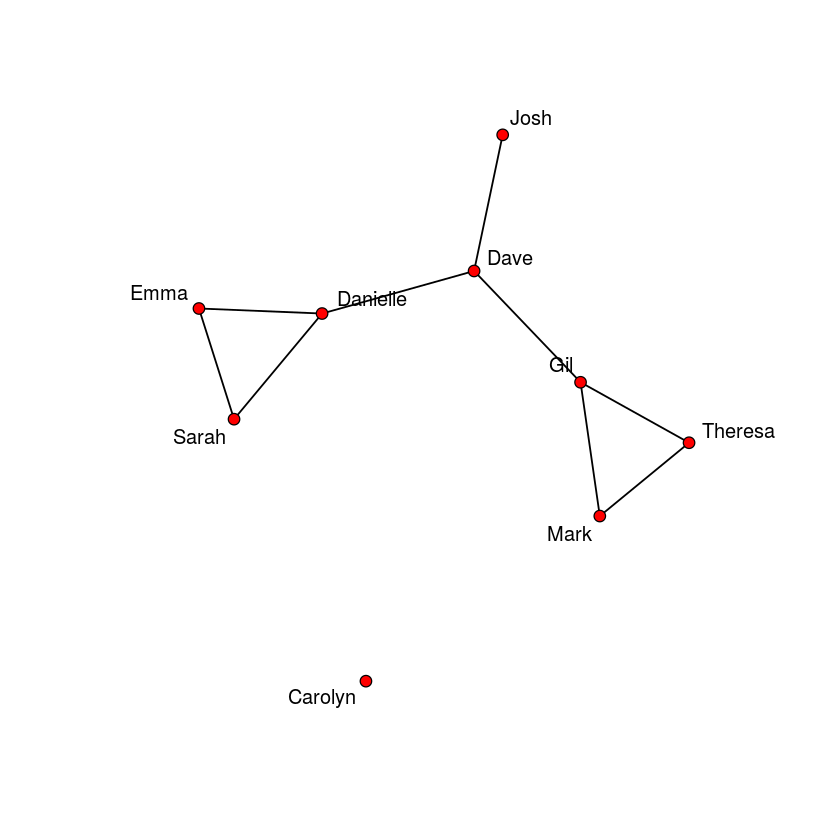

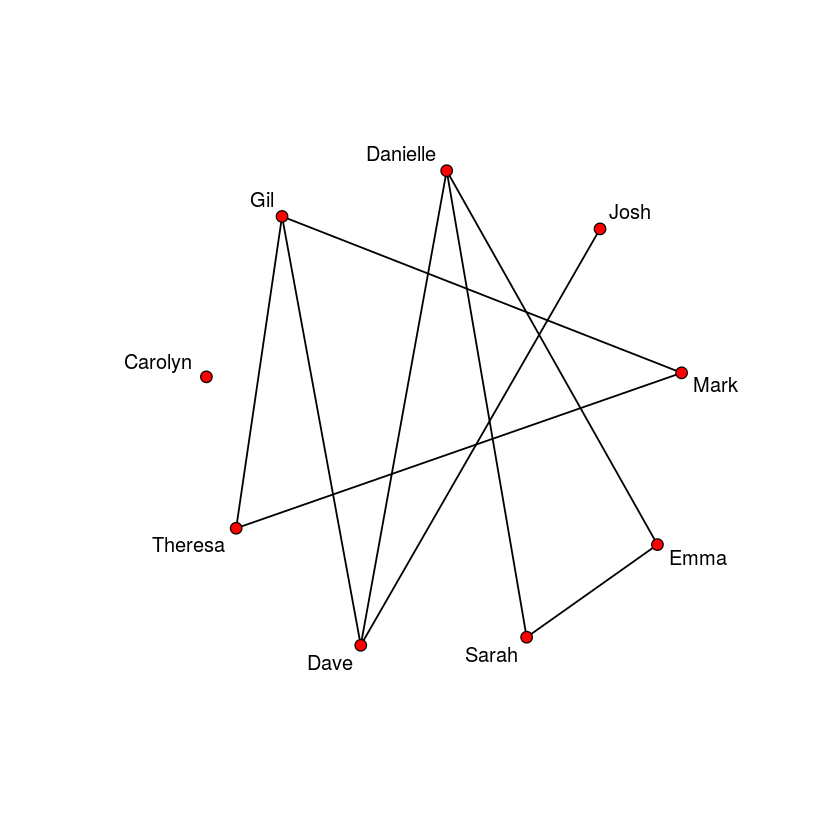

In [12]:
plot(g)                                            # Default plot is WITHOUT NAMES of nodes
plot(g,displaylabels=T)                            # Plot with names of nodes
# The default layout is Fruchterman-Reingold. Another (common) layout is:
plot(g,displaylabels=T,mode="circle")              # In the circular layout

### 1.1.3 Creating Network by Hand

In [13]:
# detach("package:sna", unload=TRUE)

#### Adding Edges

Network attributes:
  vertices = 5
  directed = TRUE
  hyper = FALSE
  loops = FALSE
  multiple = FALSE
  bipartite = FALSE
 total edges = 5 
   missing edges = 0 
   non-missing edges = 5 
 density = 0.25 

Vertex attributes:
  vertex.names:
   character valued attribute
   5 valid vertex names

No edge attributes

Network adjacency matrix:
  1 2 3 4 5
1 0 1 0 0 0
2 1 0 1 1 1
3 0 0 0 0 0
4 0 0 0 0 0
5 0 0 0 0 0

Network attributes:
  vertices = 5
  directed = FALSE
  hyper = FALSE
  loops = FALSE
  multiple = FALSE
  bipartite = FALSE
 total edges = 4 
   missing edges = 0 
   non-missing edges = 4 
 density = 0.4 

Vertex attributes:
  vertex.names:
   character valued attribute
   5 valid vertex names

No edge attributes

Network adjacency matrix:
  1 2 3 4 5
1 0 1 0 0 0
2 1 0 1 1 1
3 0 1 0 0 0
4 0 1 0 0 0
5 0 1 0 0 0

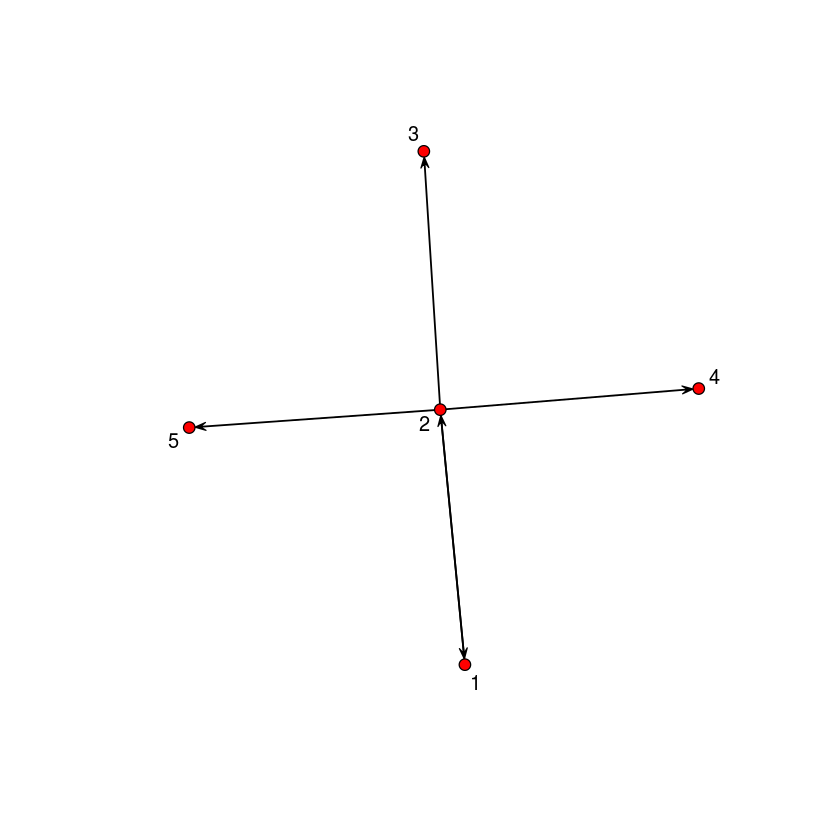

Network attributes:
  vertices = 5
  directed = FALSE
  hyper = FALSE
  loops = FALSE
  multiple = FALSE
  bipartite = FALSE
 total edges = 6 
   missing edges = 0 
   non-missing edges = 6 
 density = 0.6 

Vertex attributes:
  vertex.names:
   character valued attribute
   5 valid vertex names

No edge attributes

Network adjacency matrix:
  1 2 3 4 5
1 0 1 0 0 0
2 1 0 1 1 1
3 0 1 0 1 1
4 0 1 1 0 0
5 0 1 1 0 0

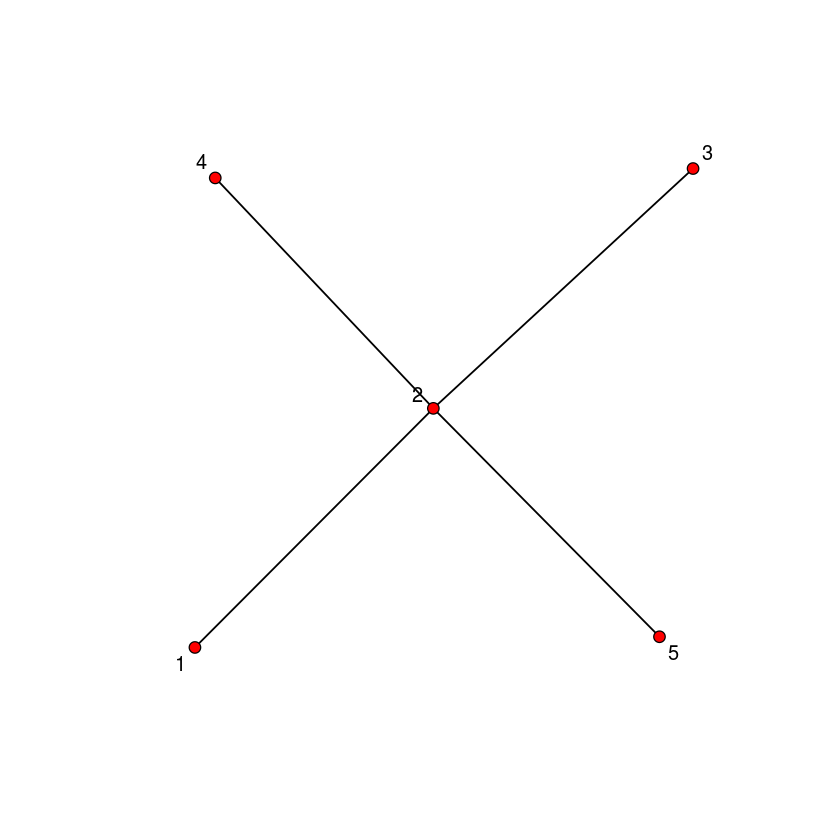

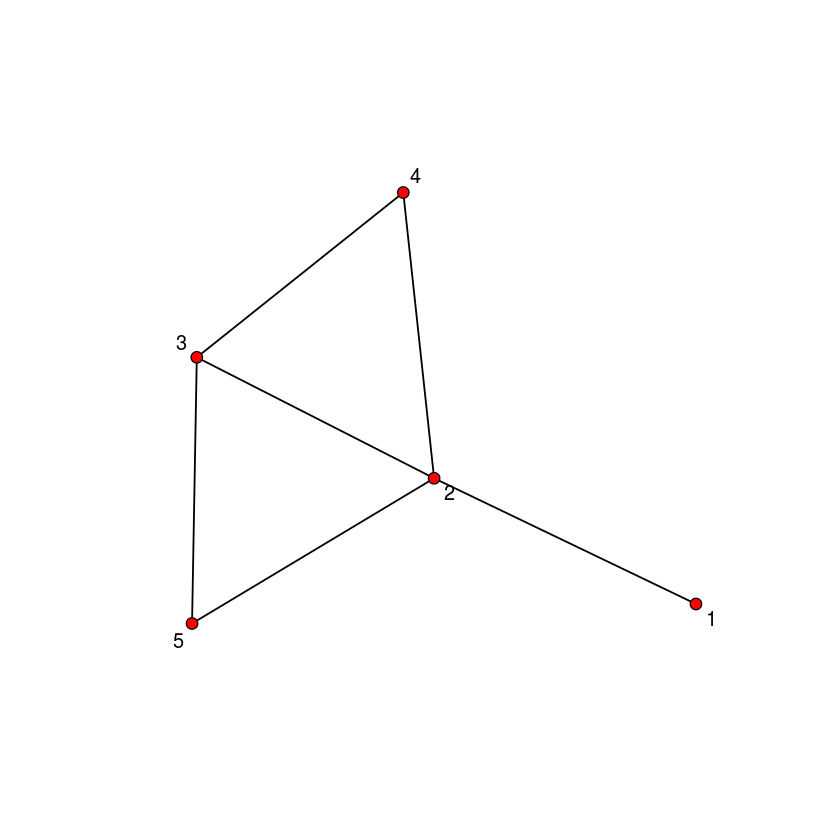

In [14]:
g <- network.initialize(5)            # Create an empty graph. By default, it is DIRECTED!    
g[1,2] <- 1                           # Add an edge from 1 to 2
g[2,] <- 1                            # Add edges from 2 to everyone else
summary(g)                     
plot(g,displaylabels=T)
g <- network.initialize(5,directed=F) # Create an empty UNDIRECTED graph    
g[1,2] <- 1                           # Add an edge from 1 to 2
g[2,] <- 1                            # Add edges from 2 to everyone else
summary(g)                     
plot(g,displaylabels=T)
m <- matrix(0, nrow=5, ncol=5)        # Create an adjacency matrix
m[3,4:5] <- 1                         # Add entries from 3 to 4 and 5
g[m>0] <- 1                           # Add more entries
summary(g)
plot(g,displaylabels=T)

#### Deleting Edges

Network attributes:
  vertices = 5
  directed = FALSE
  hyper = FALSE
  loops = FALSE
  multiple = FALSE
  bipartite = FALSE
 total edges = 5 
   missing edges = 0 
   non-missing edges = 5 
 density = 0.5 

Vertex attributes:
  vertex.names:
   character valued attribute
   5 valid vertex names

No edge attributes

Network adjacency matrix:
  1 2 3 4 5
1 0 1 0 0 0
2 1 0 1 1 1
3 0 1 0 1 0
4 0 1 1 0 0
5 0 1 0 0 0

1 2 3 4 5
1 0 0 0 0 0
2 0 0 0 0 0
3 0 0 0 0 0
4 0 0 0 0 0
5 0 0 0 0 0

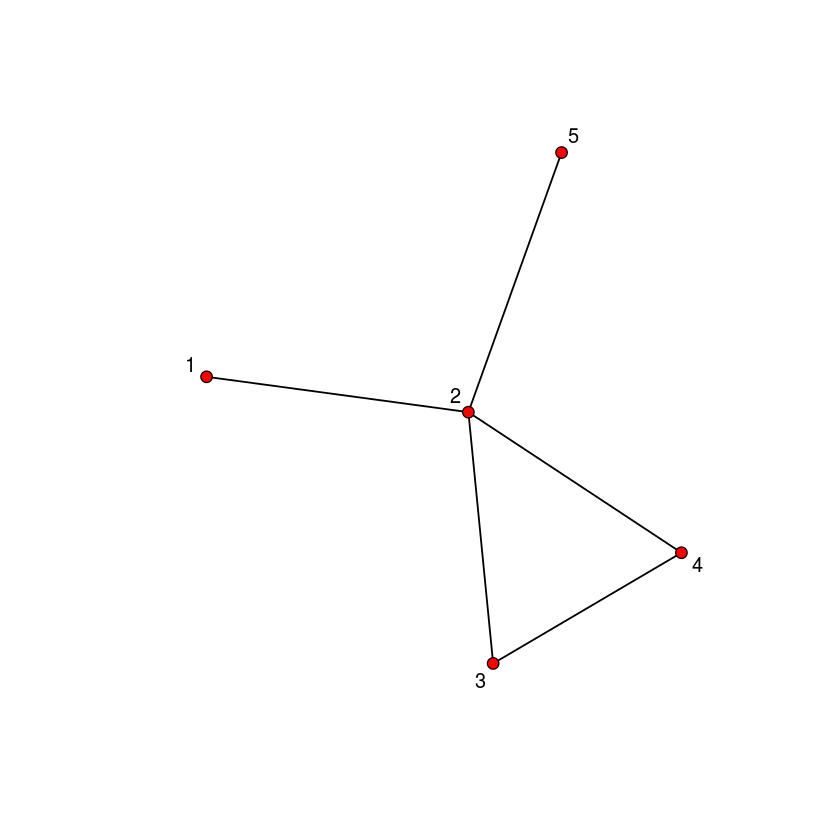

In [15]:
g[3,5] <- 0             # Remove the edge from 3 to 5
summary(g)                     
plot(g,displaylabels=T)

g1 <- g[,]
g1[,] <- 0               # Remove all edges
g1

#### Testing adjacency

In [16]:
g[4,5]
g[4,]
g[1:3,4:5]

[1] 0

[1] 0 1 1 0 0

4 5
1 0 0
2 1 1
3 1 0

#### Setting Edge Values (Weights)

In [17]:
g2 <- g[,]
g2
g2[upper.tri(g2)>0] <- rep(1:5,times=2) # give different edge values
library(sna)
g2 <- symmetrize(g2,rule="upper")
g2

1 2 3 4 5
1 0 1 0 0 0
2 1 0 1 1 1
3 0 1 0 1 0
4 0 1 1 0 0
5 0 1 0 0 0

Loading required package: statnet.common
sna: Tools for Social Network Analysis
Version 2.4 created on 2016-07-23.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
 For citation information, type citation("sna").
 Type help(package="sna") to get started.



[,1] [,2] [,3] [,4] [,5]
[1,] 0    1    2    4    2   
[2,] 1    0    3    5    3   
[3,] 2    3    0    1    4   
[4,] 4    5    1    0    5   
[5,] 2    3    4    5    0

#### Retrieving Original Edge Values (Weights)

In [18]:
g %e% "strength" <- g1 
g[,]

1 2 3 4 5
1 0 1 0 0 0
2 1 0 1 1 1
3 0 1 0 1 0
4 0 1 1 0 0
5 0 1 0 0 0

In [19]:
# # For more info
# ?network.extraction
# ?add.edge
# ?delete.edges
# ?delete.vertices
# ?get.edges
# ?upper.tri
# ?symmetrize

In [20]:
detach("package:sna", unload=TRUE)

### 1.1.4 Elementary Random Graph Generation in *sna*

sna: Tools for Social Network Analysis
Version 2.4 created on 2016-07-23.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
 For citation information, type citation("sna").
 Type help(package="sna") to get started.



[,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
 [1,] 0    0    1    1    0    0    1    0    0    0    
 [2,] 0    0    1    1    1    0    1    1    1    0    
 [3,] 0    0    0    0    1    0    0    0    0    1    
 [4,] 0    0    0    0    0    0    1    1    0    0    
 [5,] 1    0    0    0    0    0    0    0    0    1    
 [6,] 1    0    1    0    0    0    0    0    1    1    
 [7,] 1    1    1    0    1    1    0    1    1    1    
 [8,] 1    1    0    0    1    1    1    0    1    0    
 [9,] 0    0    0    1    0    0    1    1    0    1    
[10,] 1    1    0    0    0    1    1    1    0    0

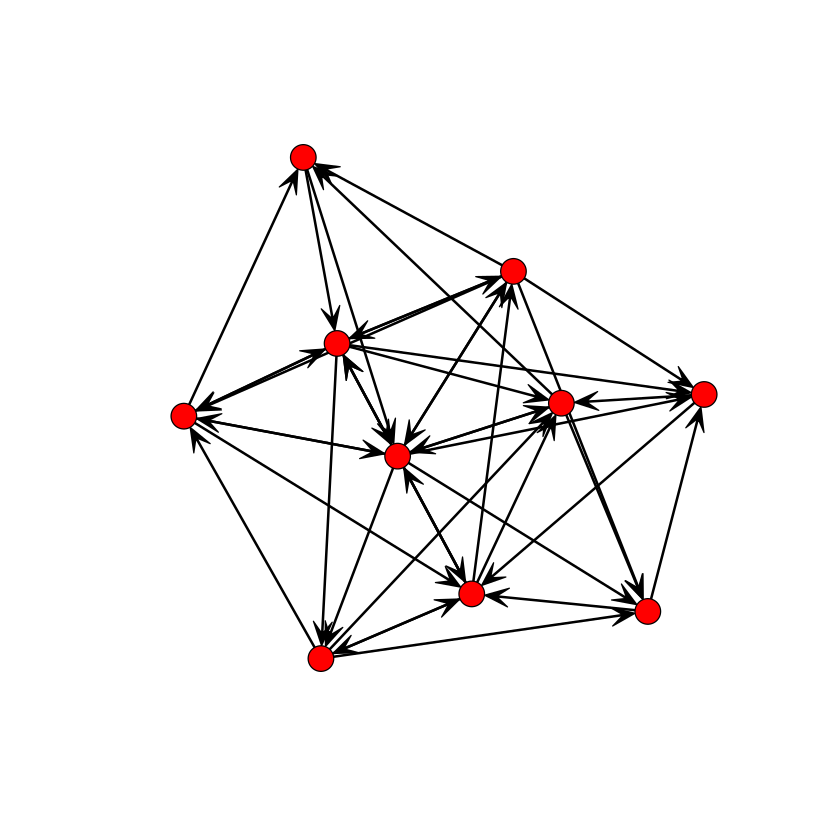

[,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
 [1,] 0    0    1    1    1    1    1    1    0    1    
 [2,] 0    0    1    1    1    0    1    1    1    1    
 [3,] 1    1    0    0    1    1    1    0    0    1    
 [4,] 1    1    0    0    0    0    1    1    1    0    
 [5,] 1    1    1    0    0    0    1    1    0    1    
 [6,] 1    0    1    0    0    0    1    1    1    1    
 [7,] 1    1    1    1    1    1    0    1    1    1    
 [8,] 1    1    0    1    1    1    1    0    1    1    
 [9,] 0    1    0    1    0    1    1    1    0    1    
[10,] 1    1    1    0    1    1    1    1    1    0

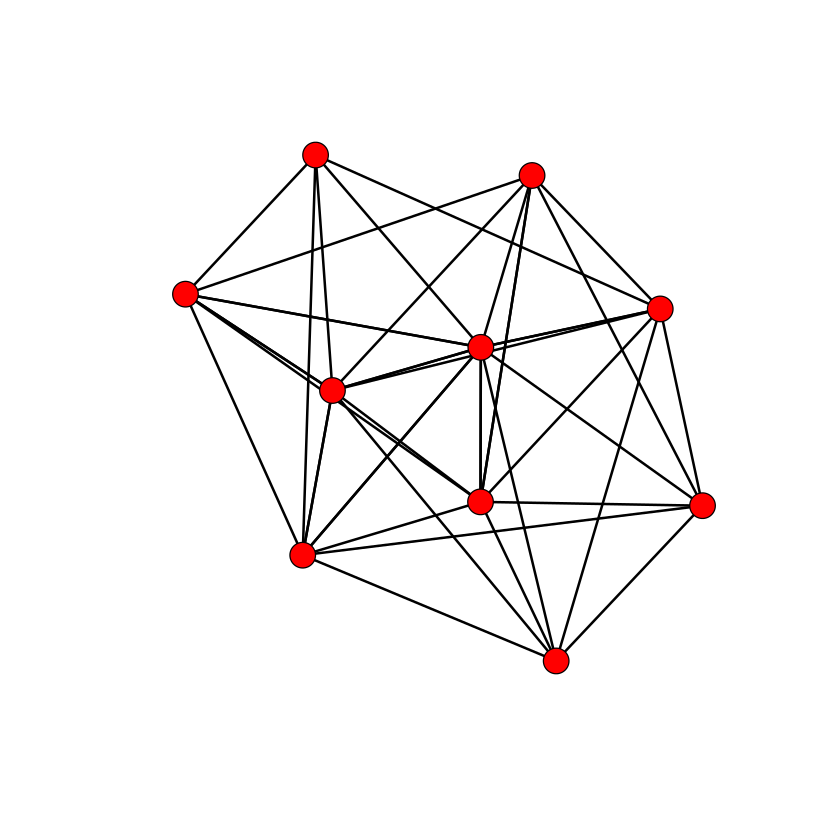

In [21]:
library(sna)

g <- rgraph(10)                  # A uniform random digraph of order 10
g
gplot(g)
coords <- gplot(g,gmode="graph")

symmetrize(g, rule="weak")       # A uniform random undirected graph of order 10

[,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
 [1,] 0    1    1    0    1    0    0    1    0    0    
 [2,] 0    0    1    1    0    0    0    1    1    0    
 [3,] 0    0    0    0    0    0    0    1    1    0    
 [4,] 0    0    0    0    1    1    0    0    1    1    
 [5,] 0    1    0    1    0    0    1    0    0    0    
 [6,] 0    0    1    0    0    0    1    0    1    1    
 [7,] 0    0    1    0    1    0    0    0    1    0    
 [8,] 0    0    0    0    0    1    0    0    0    1    
 [9,] 0    1    1    0    1    0    1    0    0    0    
[10,] 0    1    1    1    1    0    0    0    0    0

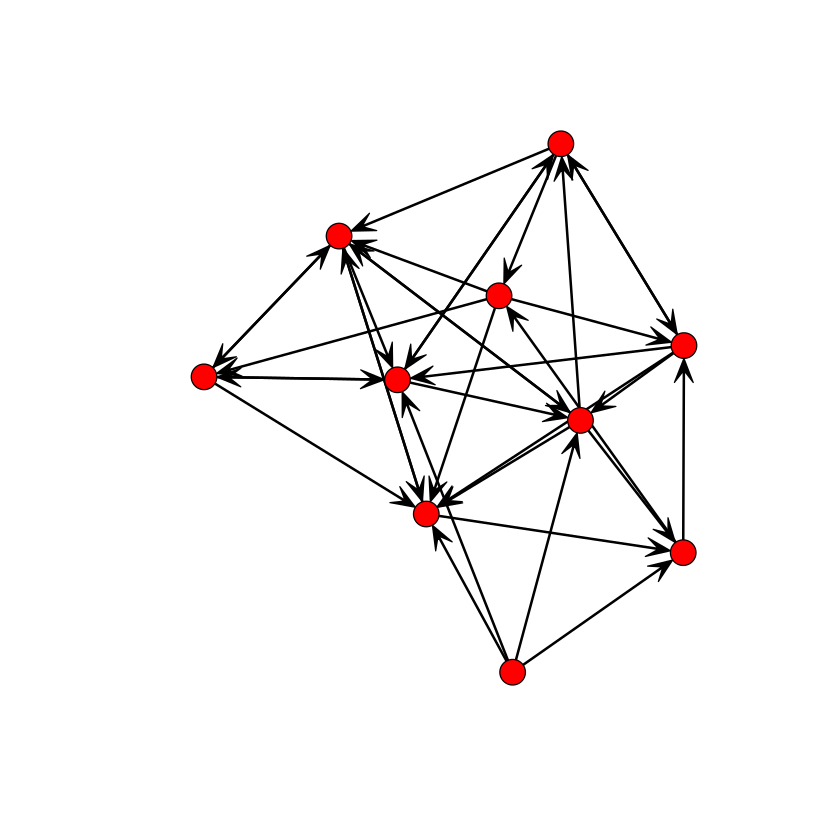

[,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
 [1,] 0    1    1    0    1    0    0    1    0    0    
 [2,] 1    0    1    1    1    0    0    1    1    1    
 [3,] 1    1    0    0    0    1    1    1    1    1    
 [4,] 0    1    0    0    1    1    0    0    1    1    
 [5,] 1    1    0    1    0    0    1    0    1    1    
 [6,] 0    0    1    1    0    0    1    1    1    1    
 [7,] 0    0    1    0    1    1    0    0    1    0    
 [8,] 1    1    1    0    0    1    0    0    0    1    
 [9,] 0    1    1    1    1    1    1    0    0    0    
[10,] 0    1    1    1    1    1    0    1    0    0

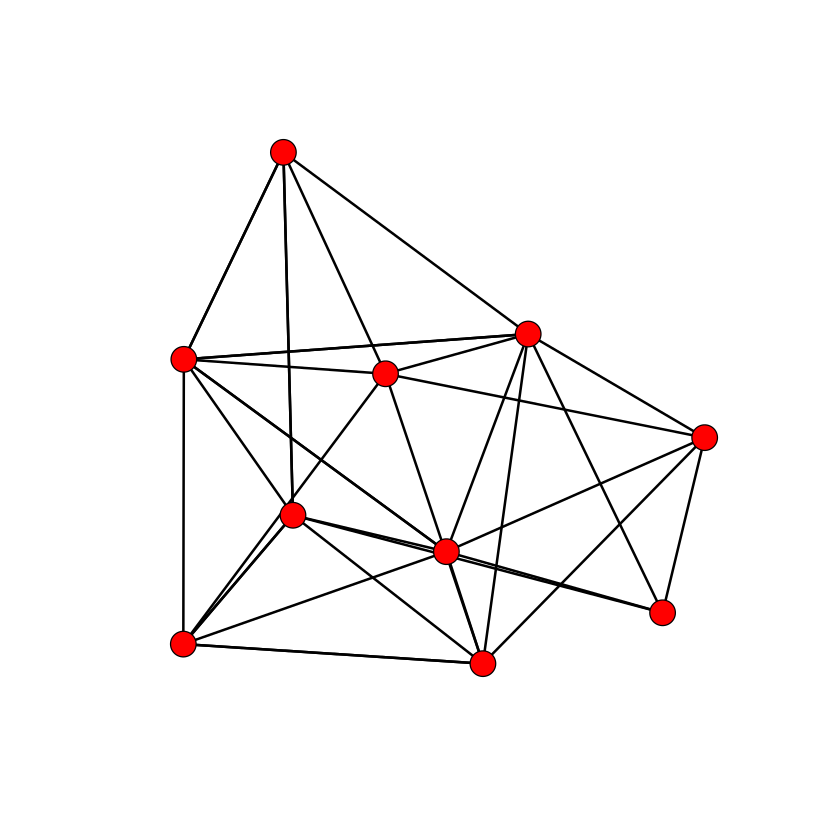

In [22]:
g <- rgraph(10, tprob=3/9)             # Homogeneous Bernoulli digraph w/mean degree 3
g
gplot(g)
coords <- gplot(g,gmode="graph")

symmetrize(g, rule="weak")             # The same as above but undirected

[,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
 [1,] 0    0    0    0    0    0    0    0    0    0    
 [2,] 0    0    1    0    1    0    0    0    0    0    
 [3,] 1    0    0    0    1    0    0    0    1    0    
 [4,] 0    0    1    0    0    1    0    0    1    0    
 [5,] 0    0    0    1    0    0    0    0    0    0    
 [6,] 0    0    1    1    0    0    1    0    1    0    
 [7,] 0    1    1    0    0    0    0    0    0    0    
 [8,] 0    0    0    1    1    0    0    0    0    0    
 [9,] 1    0    1    0    0    0    0    0    0    0    
[10,] 1    0    0    0    0    0    0    0    0    0

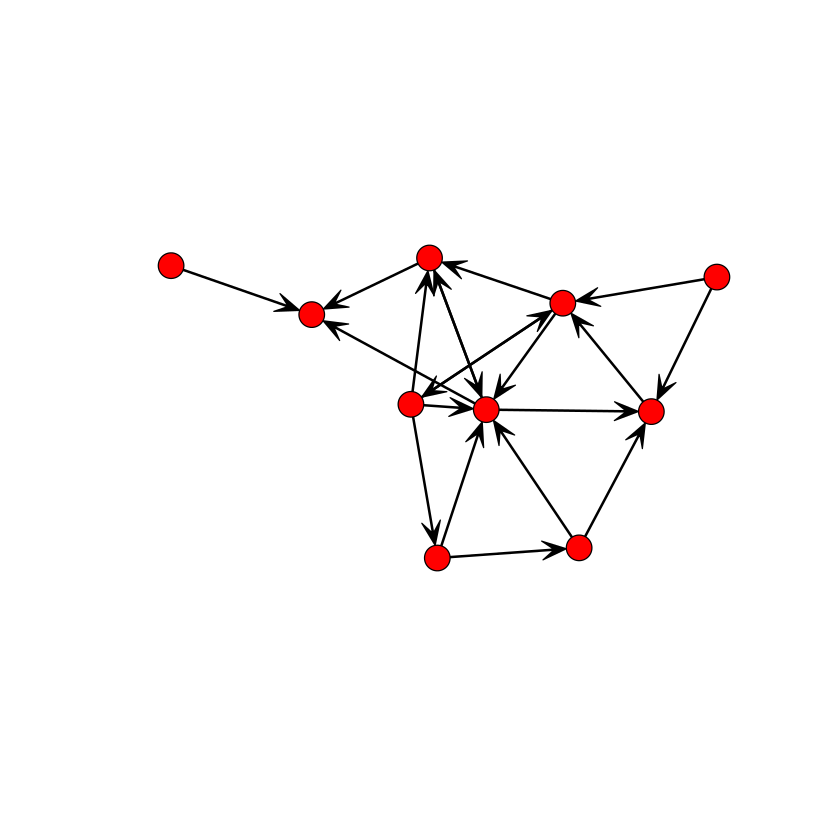

[,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
 [1,] 0    0    1    0    0    0    0    0    1    1    
 [2,] 0    0    1    0    1    0    1    0    0    0    
 [3,] 1    1    0    1    1    1    1    0    1    0    
 [4,] 0    0    1    0    1    1    0    1    1    0    
 [5,] 0    1    1    1    0    0    0    1    0    0    
 [6,] 0    0    1    1    0    0    1    0    1    0    
 [7,] 0    1    1    0    0    1    0    0    0    0    
 [8,] 0    0    0    1    1    0    0    0    0    0    
 [9,] 1    0    1    1    0    1    0    0    0    0    
[10,] 1    0    0    0    0    0    0    0    0    0

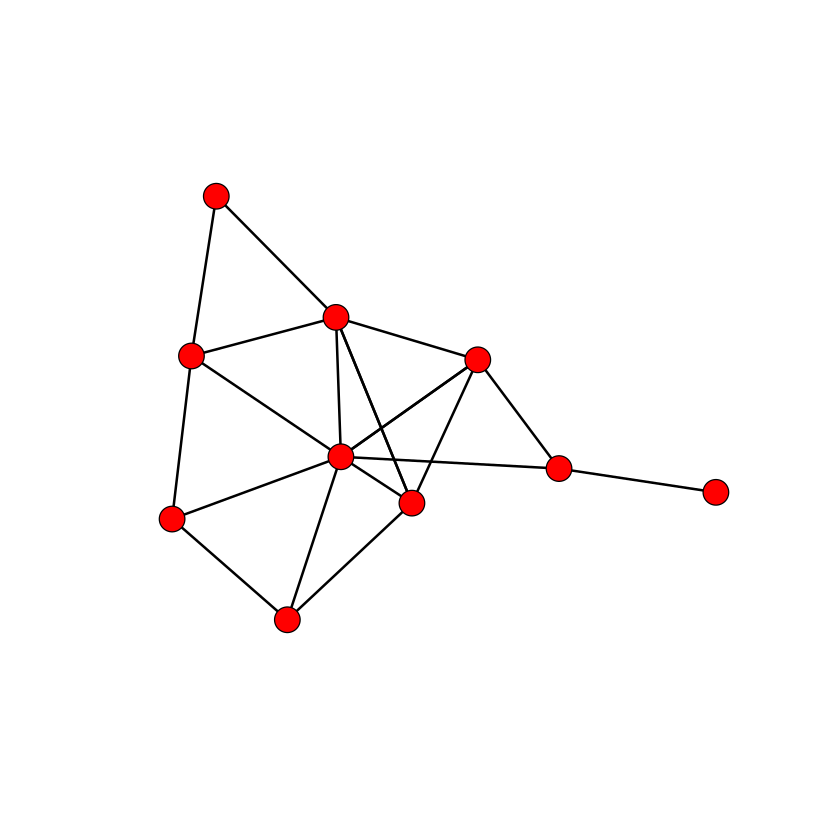

In [23]:
g <- rgnm(1, 10, 20)                # Uniform conditional on order, edges
g
gplot(g)
coords <- gplot(g,gmode="graph")

symmetrize(g, rule="weak")          # The same as above but undirected

[,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
 [1,] 0    1    0    0    0    1    1    1    1    1    
 [2,] 1    0    1    0    1    1    0    1    1    1    
 [3,] 1    0    0    1    0    1    1    0    0    0    
 [4,] 0    0    1    0    0    0    0    1    0    0    
 [5,] 1    0    1    0    0    0    0    1    0    1    
 [6,] 1    0    1    0    1    0    1    1    1    0    
 [7,] 0    0    1    0    0    1    0    0    1    1    
 [8,] 1    1    1    0    1    1    0    0    1    1    
 [9,] 1    0    1    1    0    0    1    0    0    1    
[10,] 1    0    0    1    1    1    1    1    1    0

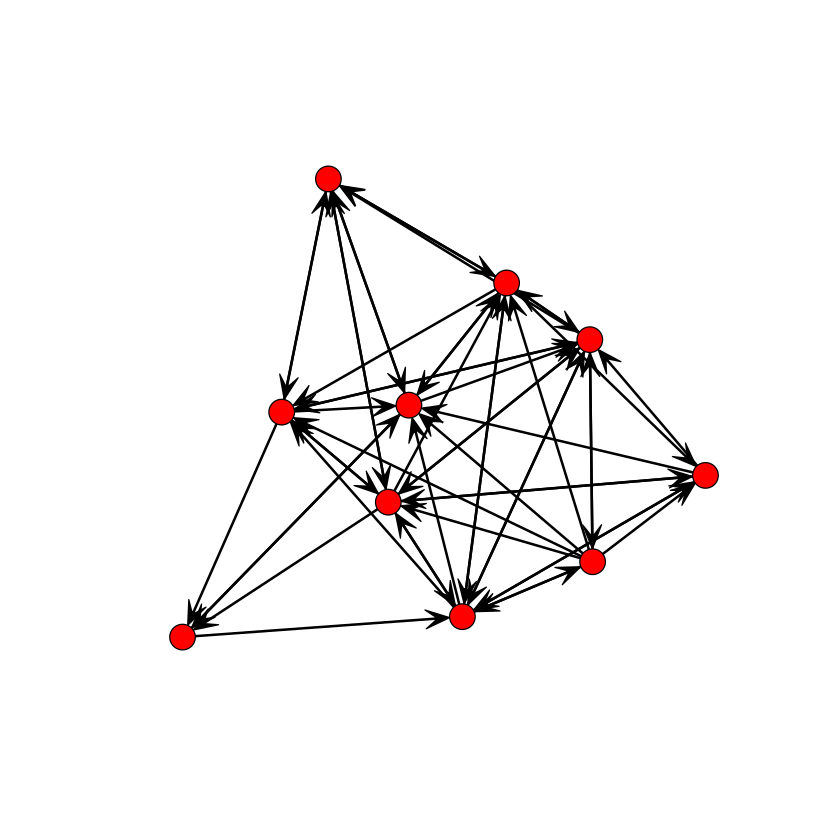

[,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
 [1,] 0    1    1    0    1    1    1    1    1    1    
 [2,] 1    0    1    0    1    1    0    1    1    1    
 [3,] 1    1    0    1    1    1    1    1    1    0    
 [4,] 0    0    1    0    0    0    0    1    1    1    
 [5,] 1    1    1    0    0    1    0    1    0    1    
 [6,] 1    1    1    0    1    0    1    1    1    1    
 [7,] 1    0    1    0    0    1    0    0    1    1    
 [8,] 1    1    1    1    1    1    0    0    1    1    
 [9,] 1    1    1    1    0    1    1    1    0    1    
[10,] 1    1    0    1    1    1    1    1    1    0

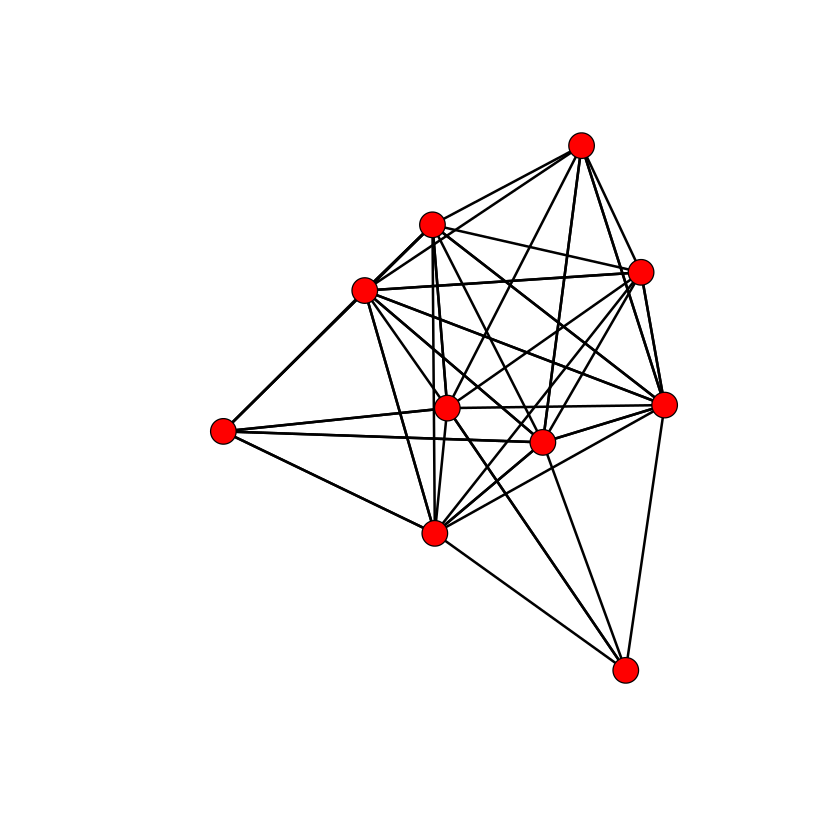

In [24]:
g <- rguman(1, 10, mut=0.5, asym=0.25, null=0.25) # Homogeneous multinomial on dyad census
g
gplot(g)
coords <- gplot(g,gmode="graph")

symmetrize(g, rule="weak")                        # The same as above but undirected

[,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
 [1,] 0    0    0    0    1    1    0    1    0    0    
 [2,] 1    0    1    0    0    0    1    1    1    1    
 [3,] 1    0    0    1    1    0    0    0    0    1    
 [4,] 1    1    0    0    1    1    0    0    0    0    
 [5,] 0    1    0    0    0    0    1    1    0    1    
 [6,] 0    1    1    0    1    0    0    0    1    0    
 [7,] 1    0    1    1    0    1    0    0    1    1    
 [8,] 0    0    1    1    0    1    1    0    1    1    
 [9,] 1    0    1    1    1    0    0    0    0    1    
[10,] 1    0    0    1    0    1    0    0    0    0

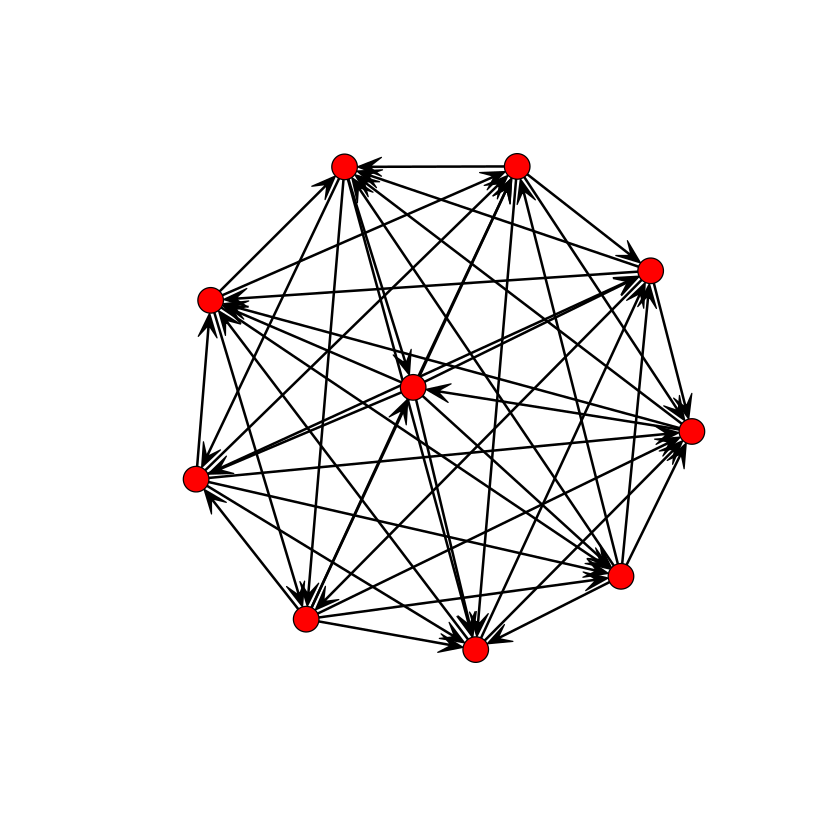

[,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
 [1,] 0    1    1    1    1    1    1    1    1    1    
 [2,] 1    0    1    1    1    1    1    1    1    1    
 [3,] 1    1    0    1    1    1    1    1    1    1    
 [4,] 1    1    1    0    1    1    1    1    1    1    
 [5,] 1    1    1    1    0    1    1    1    1    1    
 [6,] 1    1    1    1    1    0    1    1    1    1    
 [7,] 1    1    1    1    1    1    0    1    1    1    
 [8,] 1    1    1    1    1    1    1    0    1    1    
 [9,] 1    1    1    1    1    1    1    1    0    1    
[10,] 1    1    1    1    1    1    1    1    1    0

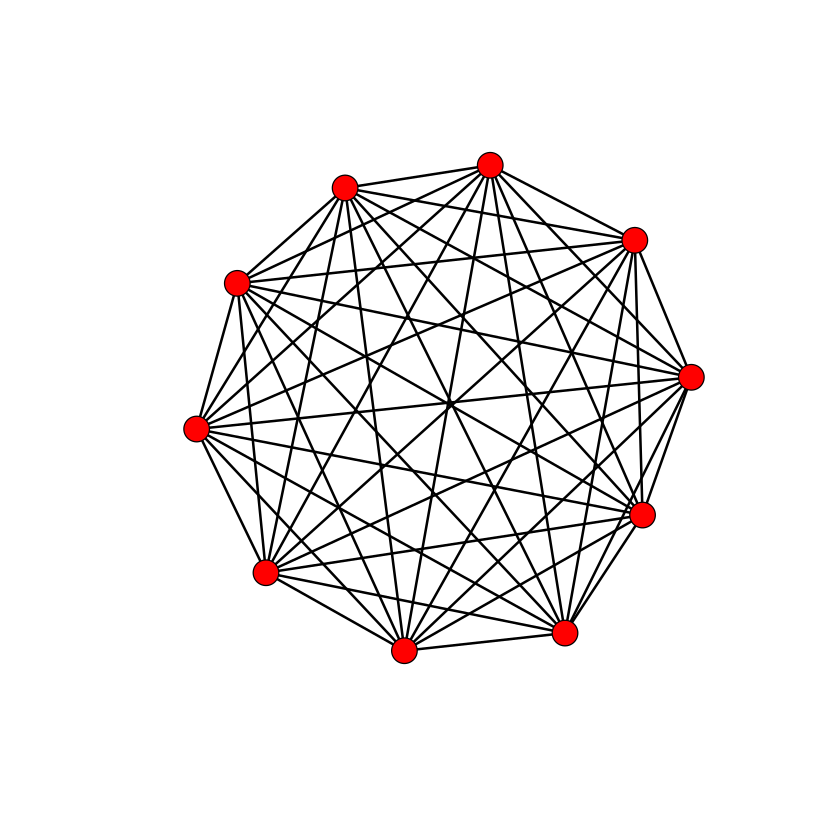

In [25]:
g <- rguman(1, 10, mut=0, asym=1, null=0) # An extreme case: random tournament
g
gplot(g)
coords <- gplot(g,gmode="graph")

symmetrize(g, rule="weak")                # The same as above but undirected

# # gplot3d(rgws(1,50,1,2,0)) # A Watts-Strogatz process - baseline
# # gplot3d(rgws(1,50,1,2,0.05)) # ...with rewiring probability 0.05
# # gplot3d(rgws(1,50,1,2,0.2)) # ...with rewiring probability 0.2

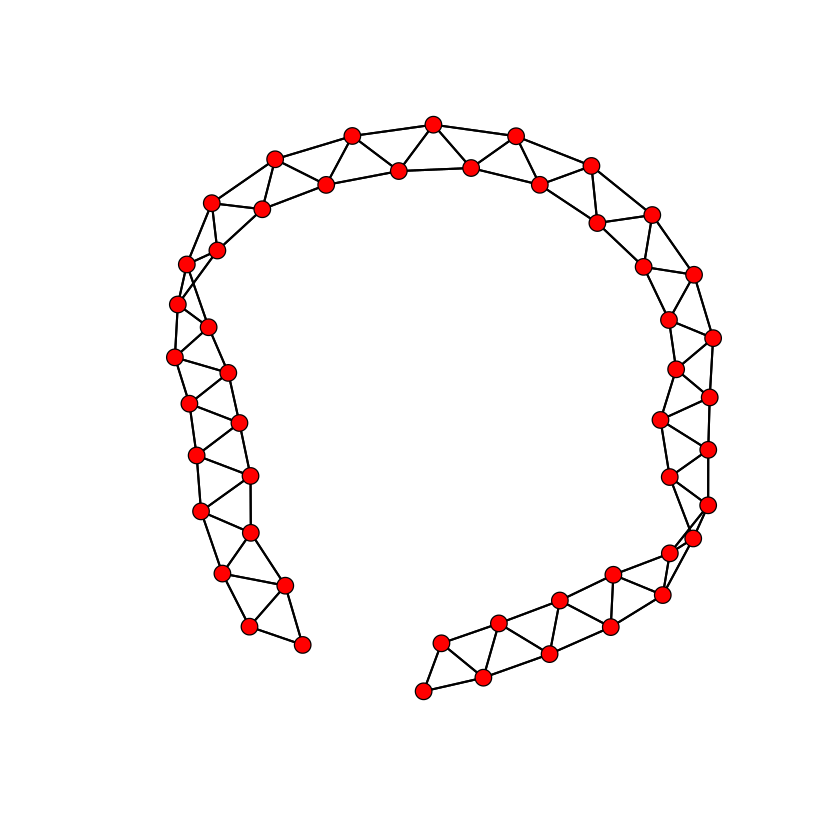

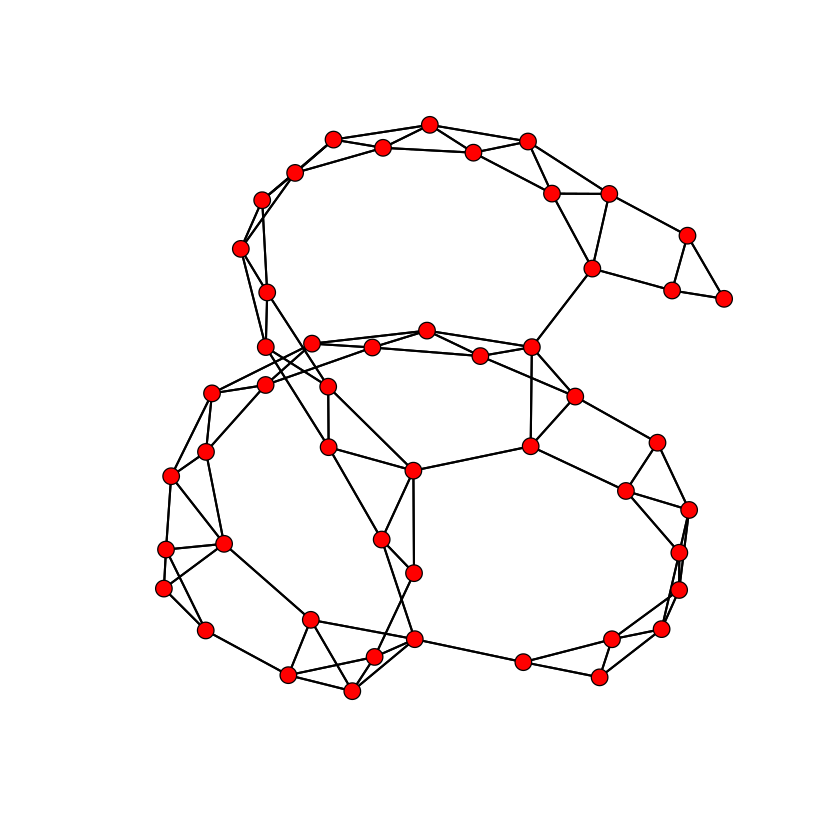

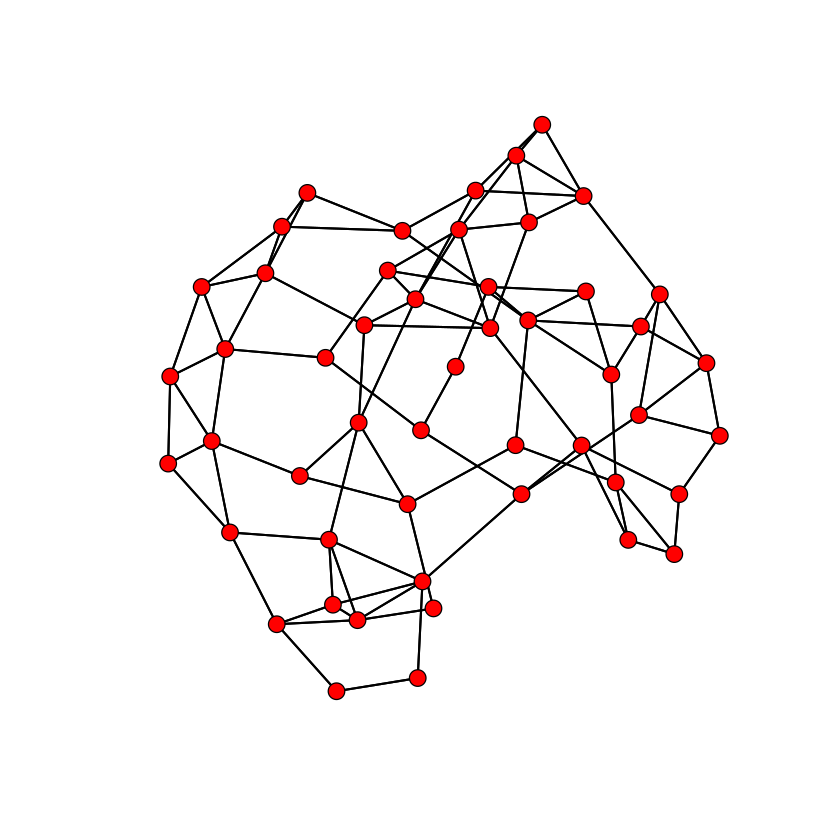

In [26]:
g <- rgws(1,50,1,2,0)     # A Watts-Strogatz process - baseline
gplot(g,gmode="graph")
g <- rgws(1,50,1,2,0.05)  # ...with rewiring probability 0.05
gplot(g,gmode="graph")
g <- rgws(1,50,1,2,0.2)   # ...with rewiring probability 0.2
gplot(g,gmode="graph")

<a id='1.2'></a>
### 1.2 Working in *igraph*

### 1.2.1 Creating Network by Hand in *igraph*


Attaching package: ‘igraph’

The following objects are masked from ‘package:sna’:

    betweenness, bonpow, closeness, components, degree, dyad.census,
    evcent, hierarchy, is.connected, neighborhood, triad.census

The following objects are masked from ‘package:network’:

    add.edges, add.vertices, %c%, delete.edges, delete.vertices,
    get.edge.attribute, get.edges, get.vertex.attribute, is.bipartite,
    is.directed, list.edge.attributes, list.vertex.attributes, %s%,
    set.edge.attribute, set.vertex.attribute

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



IGRAPH U--- 4 4 -- 
+ edges:
[1] 1--2 2--3 1--3 3--4

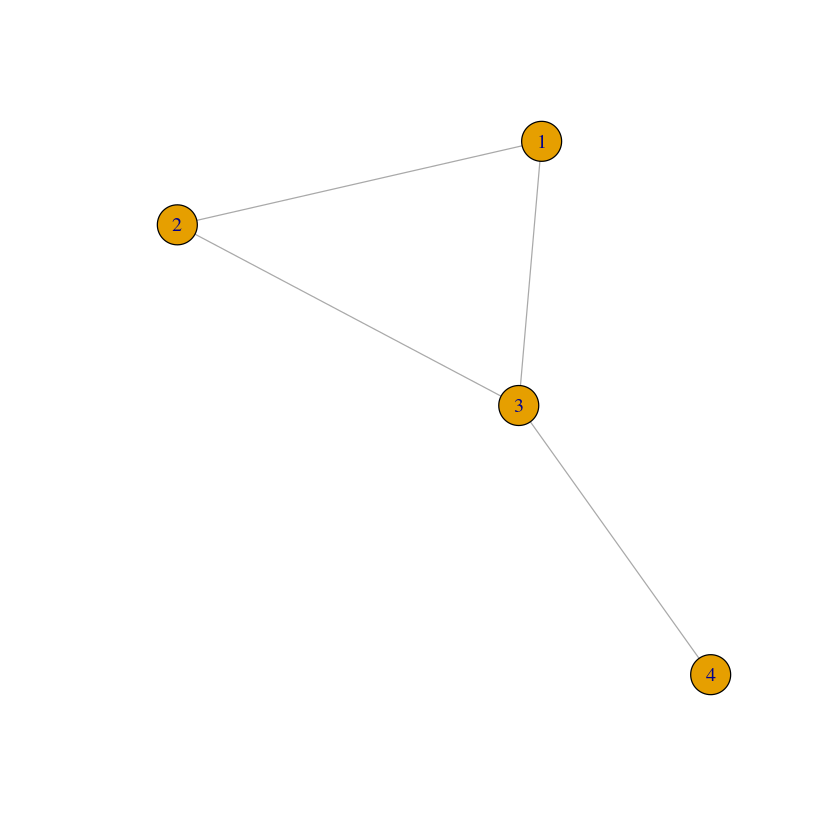

In [27]:
library(igraph)

g1 <- graph( edges=c(1,2, 2,3, 3,1, 3,4), n=3, directed=F) 
g1
plot(g1)

IGRAPH D--- 4 6 -- 
+ edges:
[1] 1->2 2->1 2->3 3->1 3->4 4->3

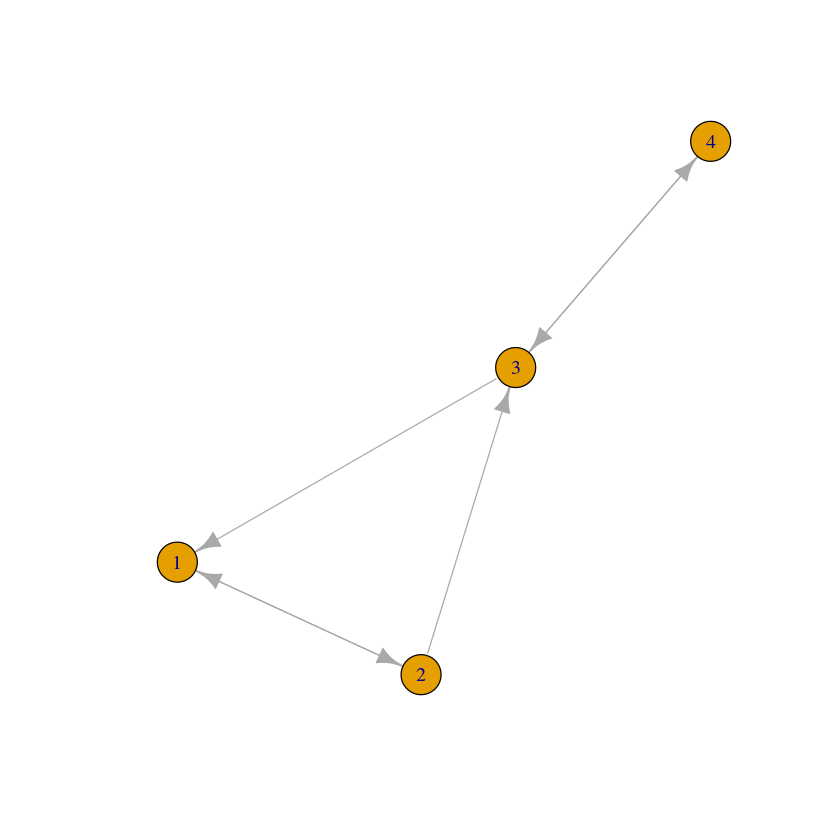

In [28]:
g2 <- graph( edges=c(1,2, 2,1, 2,3, 3,1, 3,4, 4,3), n=3, directed=T) 
g2
plot(g2)

IGRAPH D--- 4 6 -- 
+ edges:
[1] 1->2 2->1 2->3 3->1 3->4 4->3

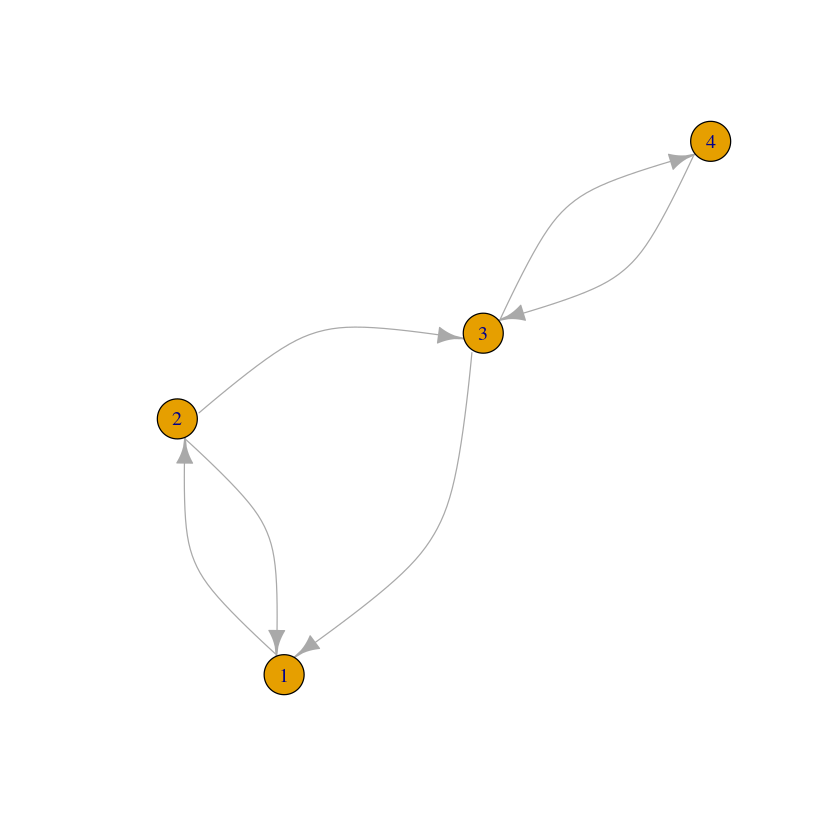

In [29]:
g3 <- graph( edges=c(1,2, 2,1, 2,3, 3,1, 3,4, 4,3), n=3, directed=T) 
g3
plot(g3,edge.curved=TRUE)

IGRAPH D--- 6 3 -- 
+ edges:
[1] 1->2 2->3 3->1

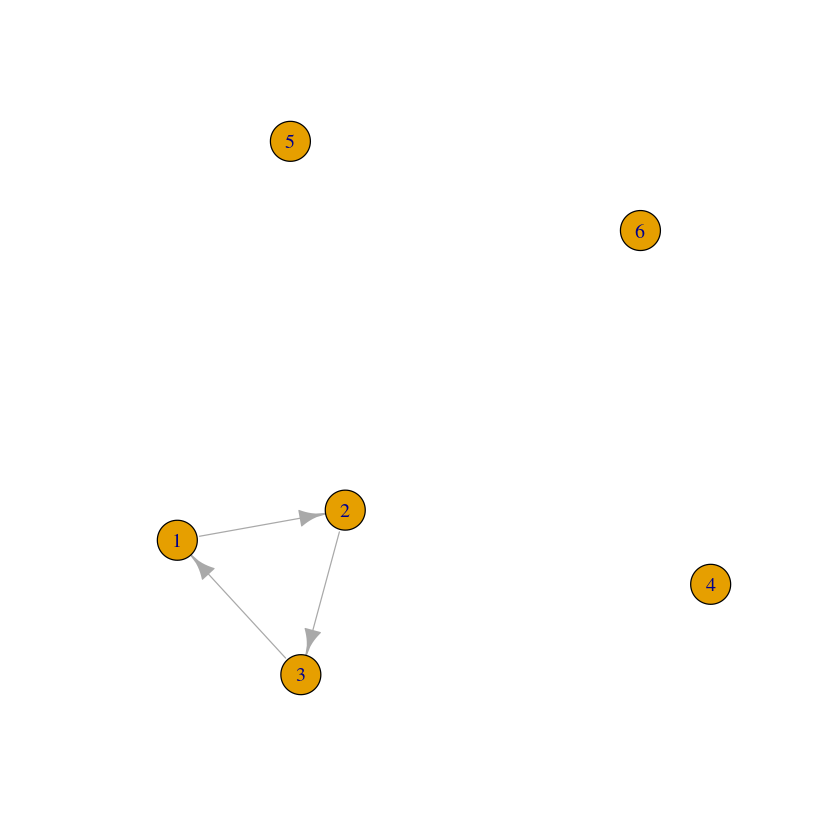

In [30]:
# Now with 6 vertices, and directed by default:

g4 <- graph( edges=c(1,2, 2,3, 3,1), n=6 )
g4
plot(g4) 

IGRAPH U--- 6 3 -- 
+ edges:
[1] 1--2 2--3 1--3

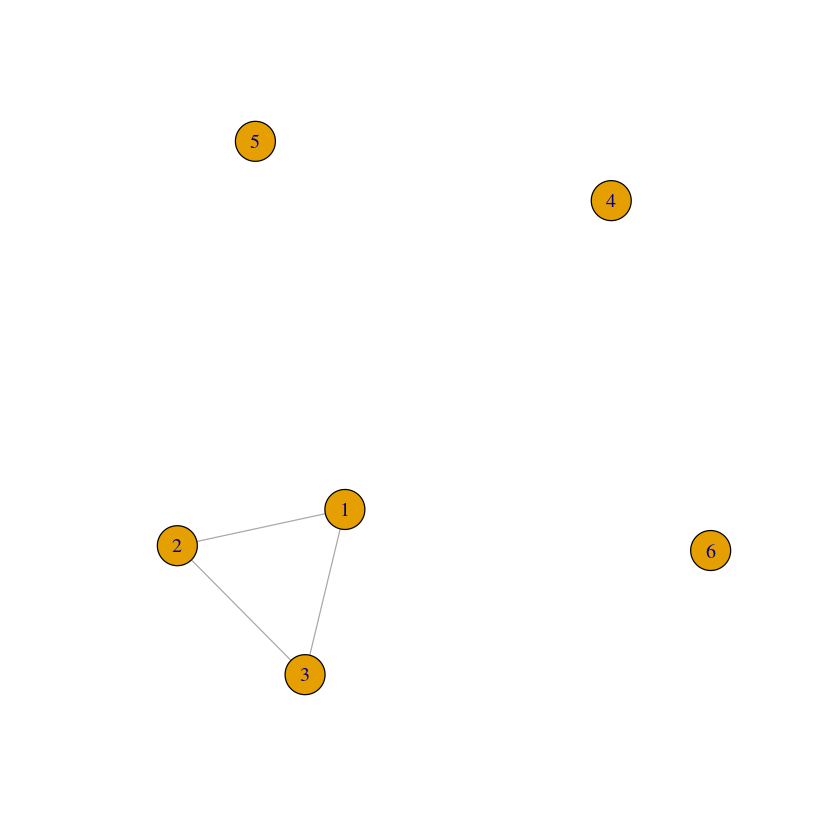

In [31]:
g5 <- graph( edges=c(1,2, 2,3, 3,1), n=6, directed=F )
g5
plot(g5) 

IGRAPH DN-- 3 3 -- 
+ attr: name (v/c)
+ edges (vertex names):
[1] John->Jim  Jim ->Jill Jill->John

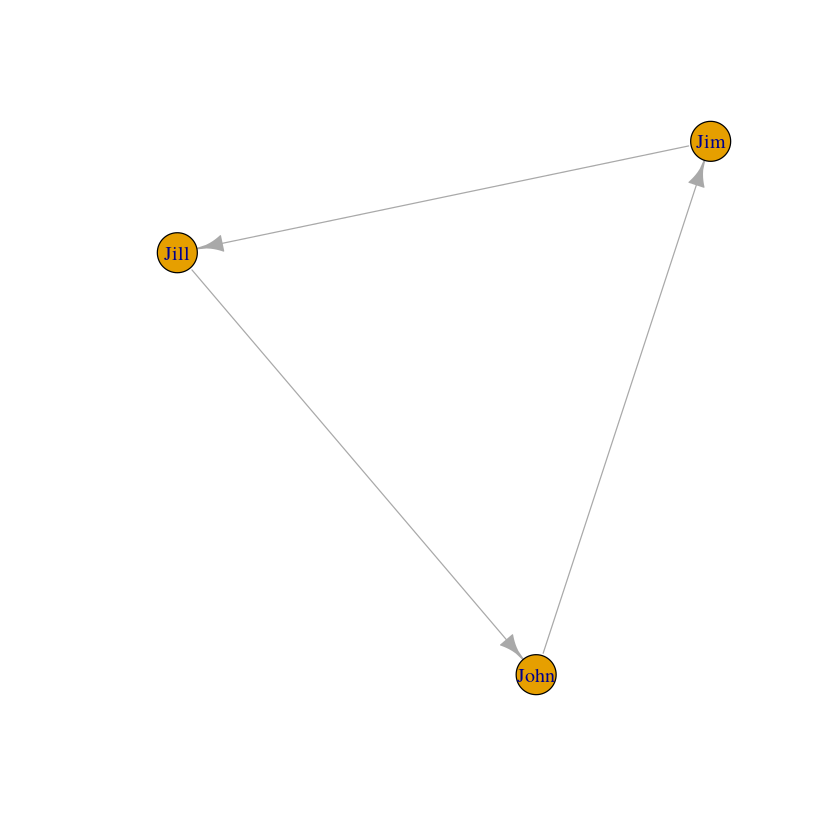

In [32]:
# Named vertices

g6 <- graph( c("John","Jim", "Jim","Jill", "Jill","John")) 
g6
plot(g6)

IGRAPH UN-- 3 3 -- 
+ attr: name (v/c)
+ edges (vertex names):
[1] John--Jim  Jim --Jill John--Jill

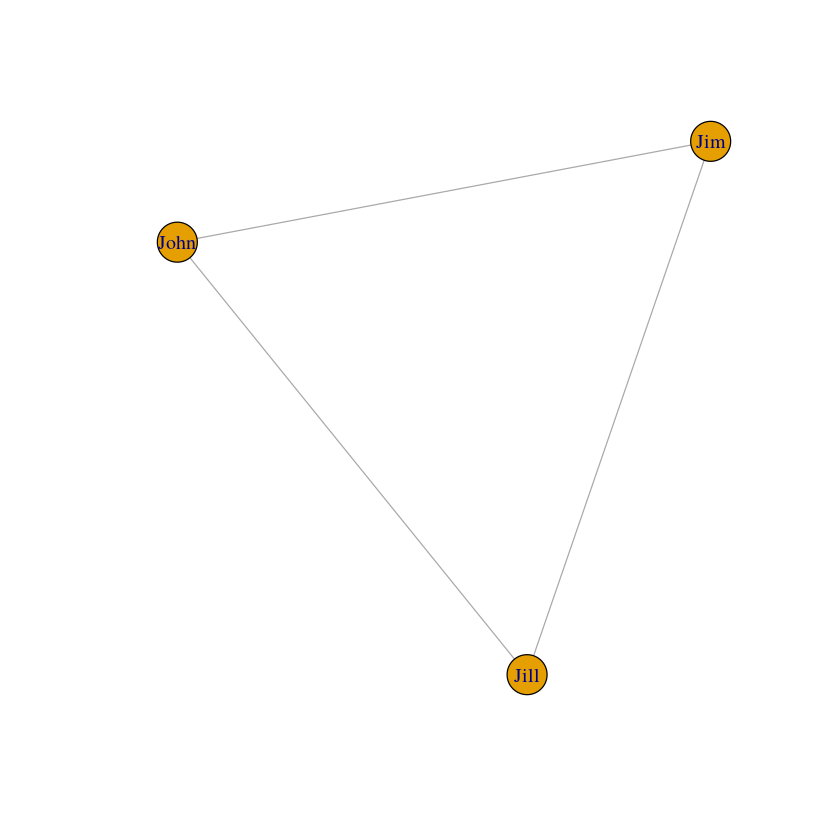

In [33]:
g7 <- graph( c("John","Jim", "Jim","Jill", "Jill","John"),directed=F) 
g7
plot(g7)

IGRAPH DN-- 7 4 -- 
+ attr: name (v/c)
+ edges (vertex names):
[1] John->Jim  Jim ->Jack Jim ->Jack John->John

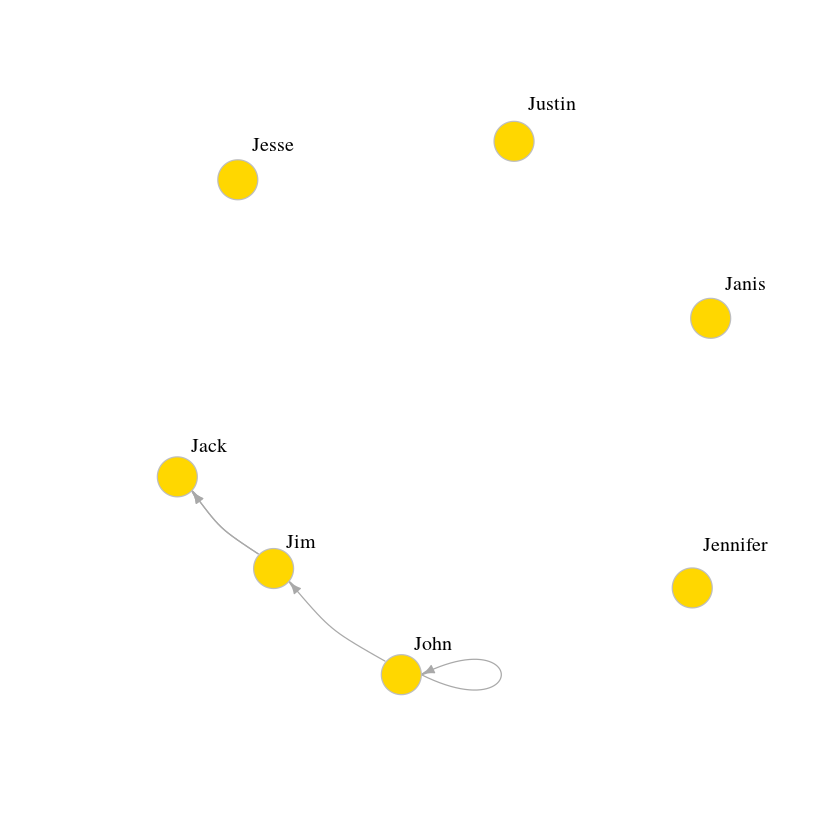

In [34]:
# Isolates and Self-Loops

g8 <- graph( c("John", "Jim", "Jim", "Jack", "Jim", "Jack", "John", "John"), 
             isolates=c("Jesse", "Janis", "Jennifer", "Justin") )  
g8
plot(g8, edge.arrow.size=.5, vertex.color="gold", vertex.size=15, vertex.frame.color="gray", 
     vertex.label.color="black", vertex.label.cex=1, vertex.label.dist=1, edge.curved=0.2) 

#### Graph Description with +-- and :

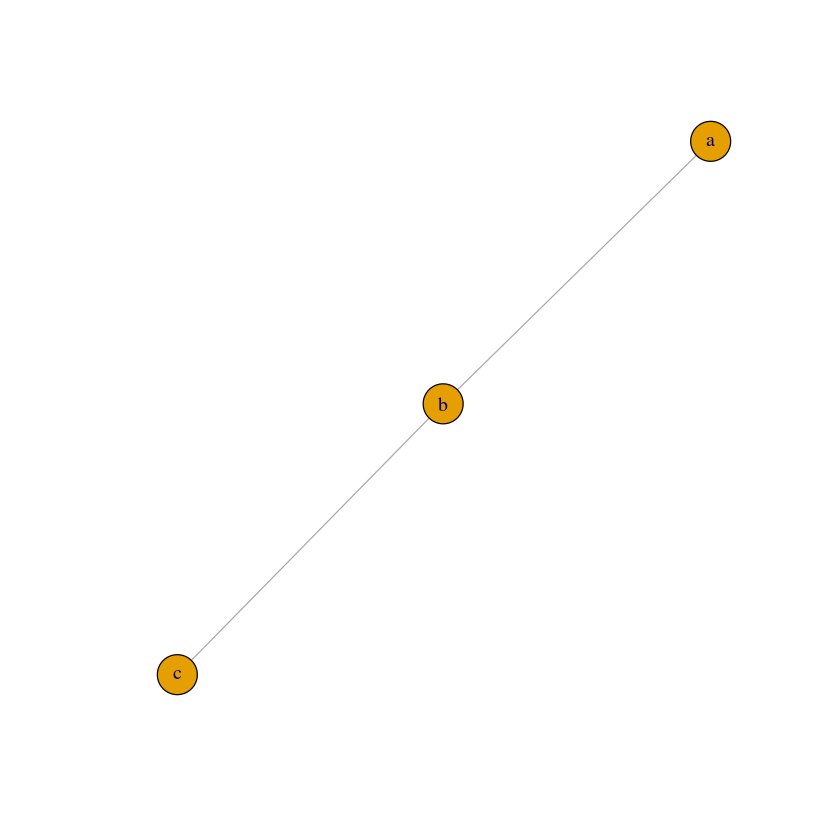

In [35]:
plot(graph_from_literal(a---b, b---c))

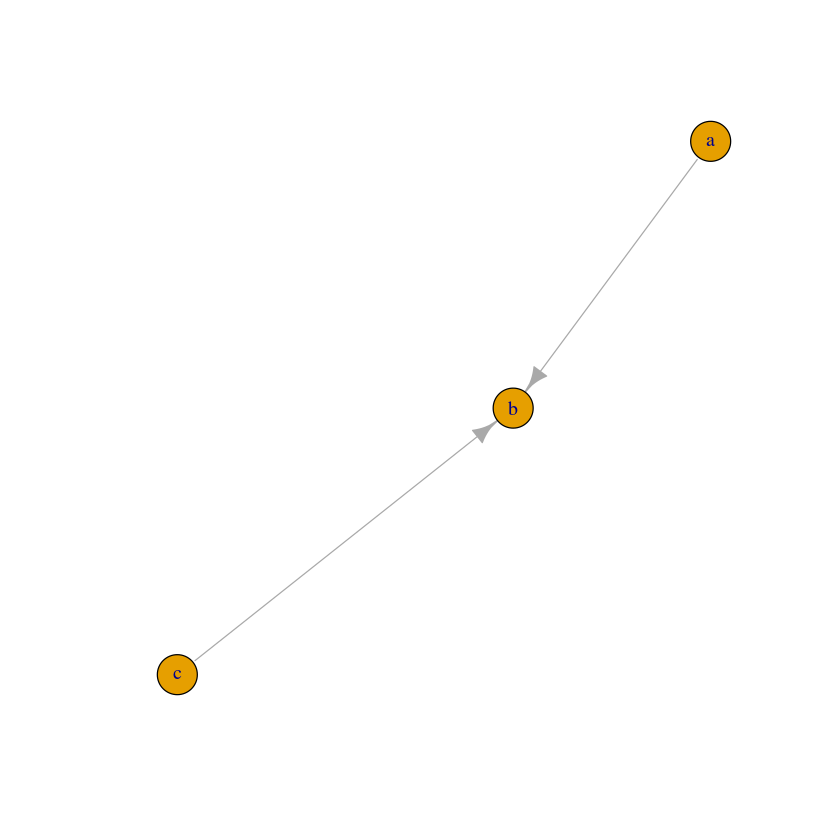

In [36]:
plot(graph_from_literal(a--+b, b+--c))

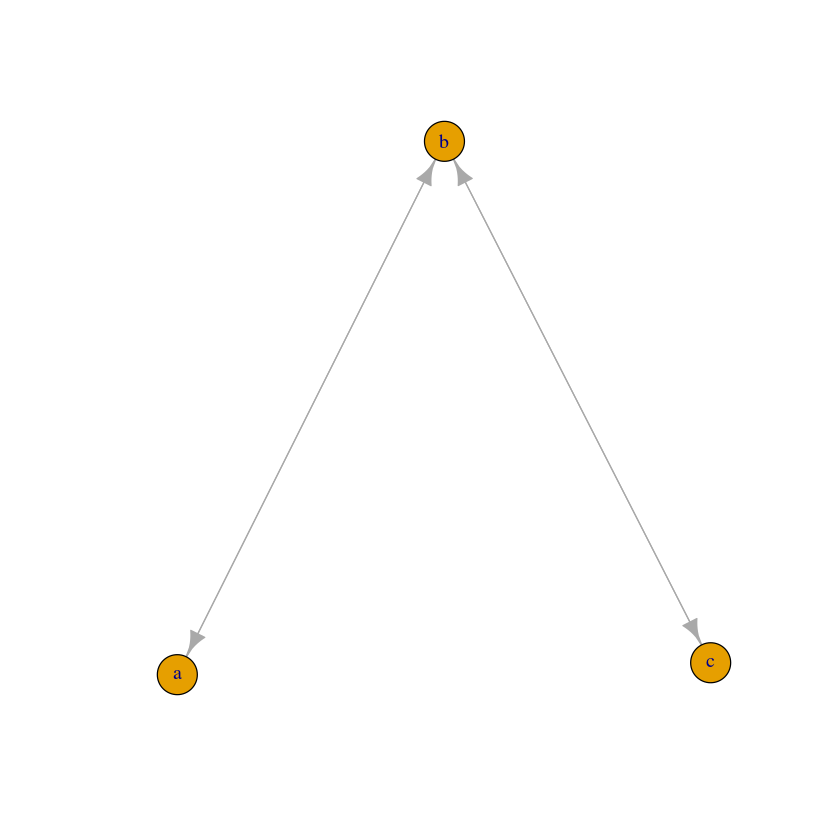

In [37]:
plot(graph_from_literal(a+-+b, b+-+c)) 

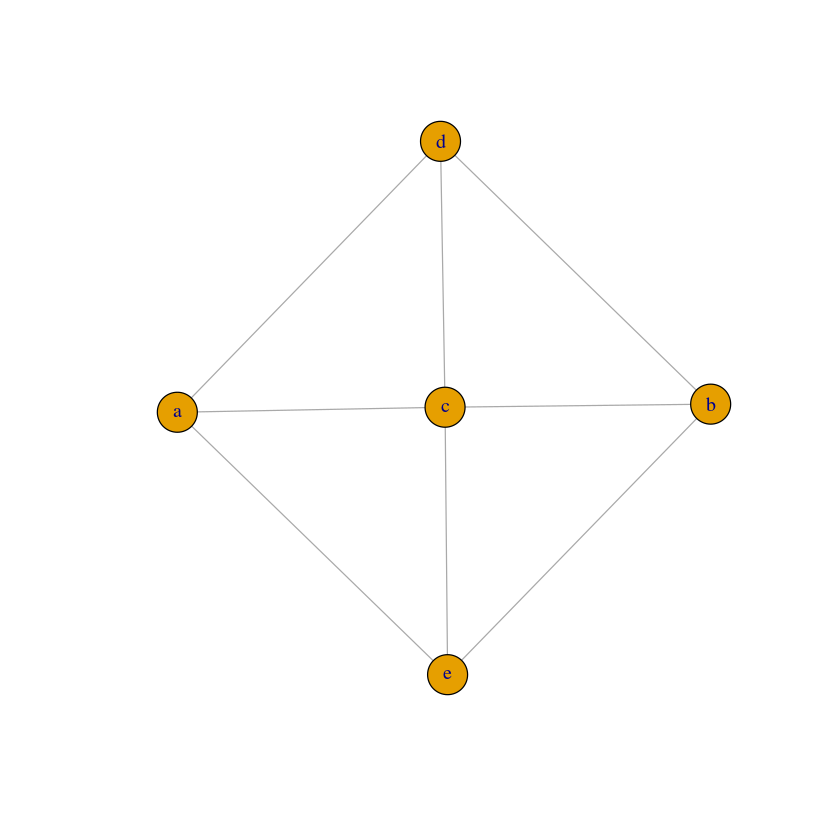

In [38]:
plot(graph_from_literal(a:b:c---c:d:e))

IGRAPH UN-- 10 11 -- 
+ attr: name (v/c)
+ edges (vertex names):
 [1] a--b a--g b--c b--h c--d d--e e--f e--h f--h g--h h--i

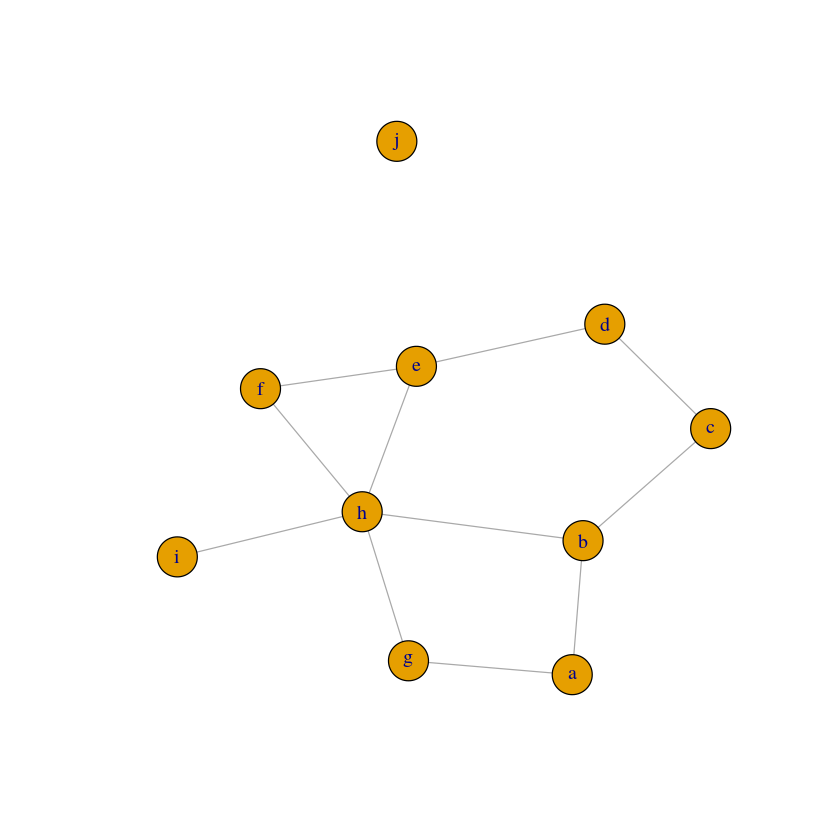

In [39]:
gl <- graph_from_literal(a-b-c-d-e-f, a-g-h-b, h-e:f:i, j)
gl
plot(gl)

### 1.2.2 Create Network from Adjacency Matrix in *igraph*

[,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
 [1,] 0    0    0    1    0    1    1    0    0    1    
 [2,] 1    0    0    1    1    0    1    0    1    0    
 [3,] 0    0    0    0    1    1    1    0    1    0    
 [4,] 1    0    1    0    0    1    1    0    0    1    
 [5,] 0    0    0    1    0    1    1    0    0    0    
 [6,] 1    0    0    1    1    0    1    0    0    0    
 [7,] 1    0    1    0    0    0    0    1    1    1    
 [8,] 0    1    1    0    1    1    0    0    0    1    
 [9,] 0    1    0    0    0    0    0    0    0    1    
[10,] 0    0    0    0    1    1    0    0    0    0

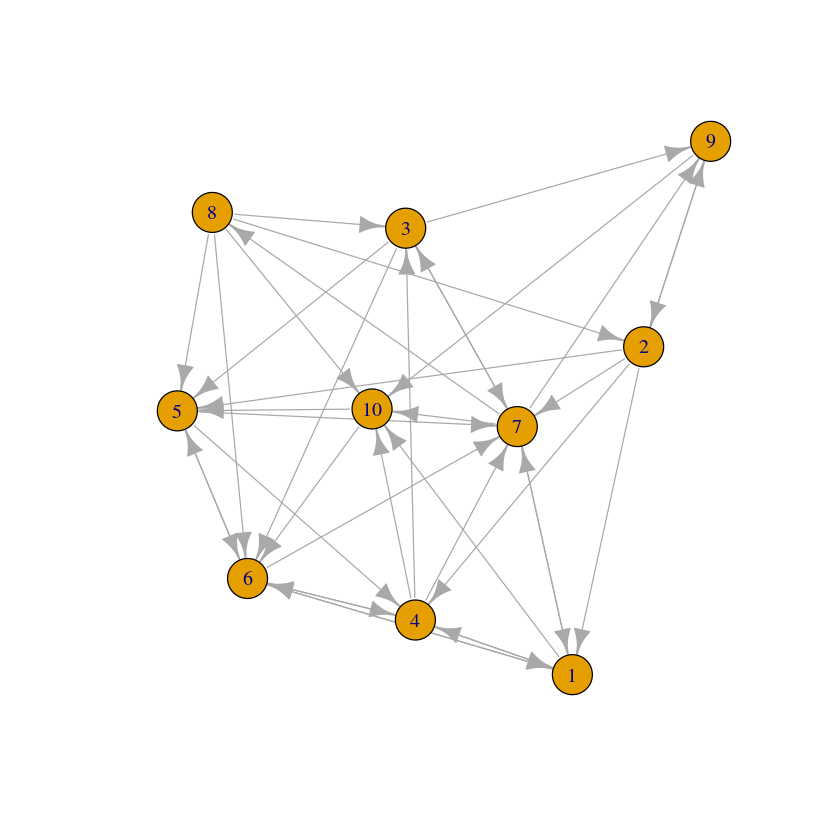

In [40]:
num_nodes <- 10
adjm <- matrix(round(runif(num_nodes*num_nodes)), nrow = num_nodes, ncol = num_nodes)
diag(adjm) <- 0
adjm
net <- graph_from_adjacency_matrix(adjm)
plot(net)

[,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
 [1,] 0    0    0    1    0    1    1    0    0    1    
 [2,] 0    0    0    1    1    0    1    0    1    0    
 [3,] 0    0    0    0    1    1    1    0    1    0    
 [4,] 1    1    0    0    0    1    1    0    0    1    
 [5,] 0    1    1    0    0    1    1    0    0    0    
 [6,] 1    0    1    1    1    0    1    0    0    0    
 [7,] 1    1    1    1    1    1    0    1    1    1    
 [8,] 0    0    0    0    0    0    1    0    0    1    
 [9,] 0    1    1    0    0    0    1    0    0    1    
[10,] 1    0    0    1    0    0    1    1    1    0

IGRAPH U--- 10 23 -- 
+ edges:
 [1] 1-- 4 1-- 6 1-- 7 1--10 2-- 4 2-- 5 2-- 7 2-- 9 3-- 5 3-- 6 3-- 7 3-- 9
[13] 4-- 6 4-- 7 4--10 5-- 6 5-- 7 6-- 7 7-- 8 7-- 9 7--10 8--10 9--10

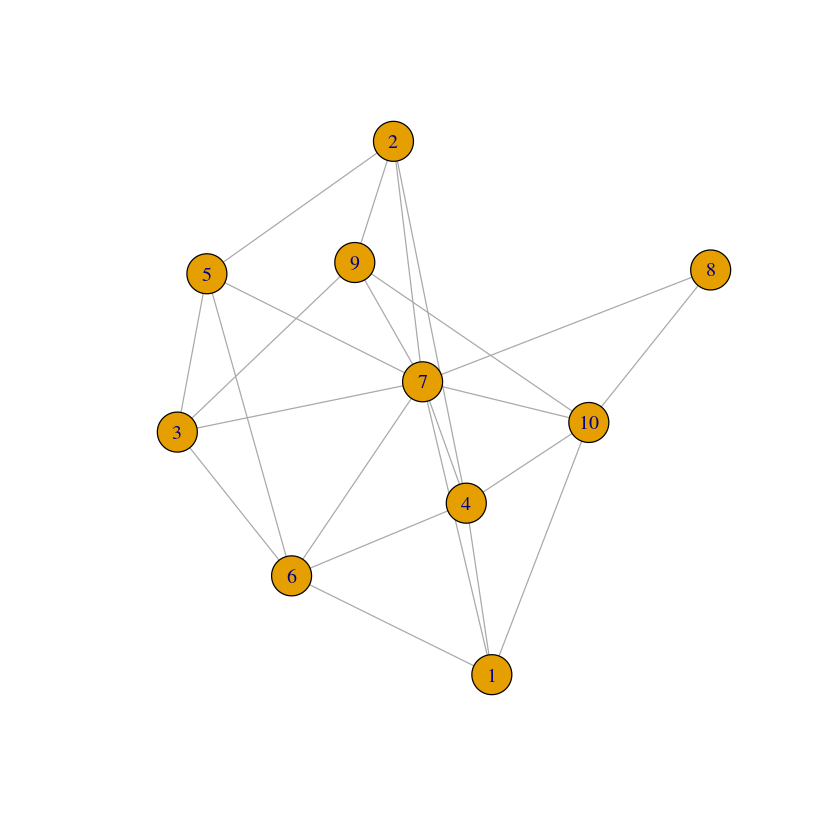

In [41]:
# Symmetrization

adjm[lower.tri(adjm)] = t(adjm)[lower.tri(adjm)]
adjm
net <- graph_from_adjacency_matrix(adjm, mode="undirected")
net
plot(net) 

[,1]      [,2]      [,3]      [,4]      [,5]      [,6]      [,7]     
 [1,] 0.0000000 1.0400888 1.0400888 1.0400888 1.0400888 1.0400888 1.0400888
 [2,] 0.7075776 0.0000000 0.7075776 0.7075776 0.7075776 0.7075776 0.7075776
 [3,] 2.6589758 2.6589758 0.0000000 2.6589758 2.6589758 2.6589758 2.6589758
 [4,] 0.8566373 0.8566373 0.8566373 0.0000000 0.8566373 0.8566373 0.8566373
 [5,] 1.1579186 1.1579186 1.1579186 1.1579186 0.0000000 1.1579186 1.1579186
 [6,] 0.6333926 0.6333926 0.6333926 0.6333926 0.6333926 0.0000000 0.6333926
 [7,] 3.6891180 3.6891180 3.6891180 3.6891180 3.6891180 3.6891180 0.0000000
 [8,] 5.3217239 5.3217239 5.3217239 5.3217239 5.3217239 5.3217239 5.3217239
 [9,] 1.2911232 1.2911232 1.2911232 1.2911232 1.2911232 1.2911232 1.2911232
[10,] 0.5359080 0.5359080 0.5359080 0.5359080 0.5359080 0.5359080 0.5359080
      [,8]      [,9]      [,10]    
 [1,] 1.0400888 1.0400888 1.0400888
 [2,] 0.7075776 0.7075776 0.7075776
 [3,] 2.6589758 2.6589758 2.6589758
 [4,] 0.8566373 0.8566373 0.8566373
 [5,] 1.1579186 1.1579186 1.1579186
 [6,] 0.6333926 0.6333926 0.6333926
 [7,] 3.6891180 3.6891180 3.6891180
 [8,] 0.0000000 5.3217239 5.3217239
 [9,] 1.2911232 0.0000000 1.2911232
[10,] 0.5359080 0.5359080 0.0000000

IGRAPH D-W- 10 90 -- 
+ attr: weight (e/n)
+ edges:
 [1]  1-> 2  1-> 3  1-> 4  1-> 5  1-> 6  1-> 7  1-> 8  1-> 9  1->10  2-> 1
[11]  2-> 3  2-> 4  2-> 5  2-> 6  2-> 7  2-> 8  2-> 9  2->10  3-> 1  3-> 2
[21]  3-> 4  3-> 5  3-> 6  3-> 7  3-> 8  3-> 9  3->10  4-> 1  4-> 2  4-> 3
[31]  4-> 5  4-> 6  4-> 7  4-> 8  4-> 9  4->10  5-> 1  5-> 2  5-> 3  5-> 4
[41]  5-> 6  5-> 7  5-> 8  5-> 9  5->10  6-> 1  6-> 2  6-> 3  6-> 4  6-> 5
[51]  6-> 7  6-> 8  6-> 9  6->10  7-> 1  7-> 2  7-> 3  7-> 4  7-> 5  7-> 6
[61]  7-> 8  7-> 9  7->10  8-> 1  8-> 2  8-> 3  8-> 4  8-> 5  8-> 6  8-> 7
[71]  8-> 9  8->10  9-> 1  9-> 2  9-> 3  9-> 4  9-> 5  9-> 6  9-> 7  9-> 8
+ ... omitted several edges

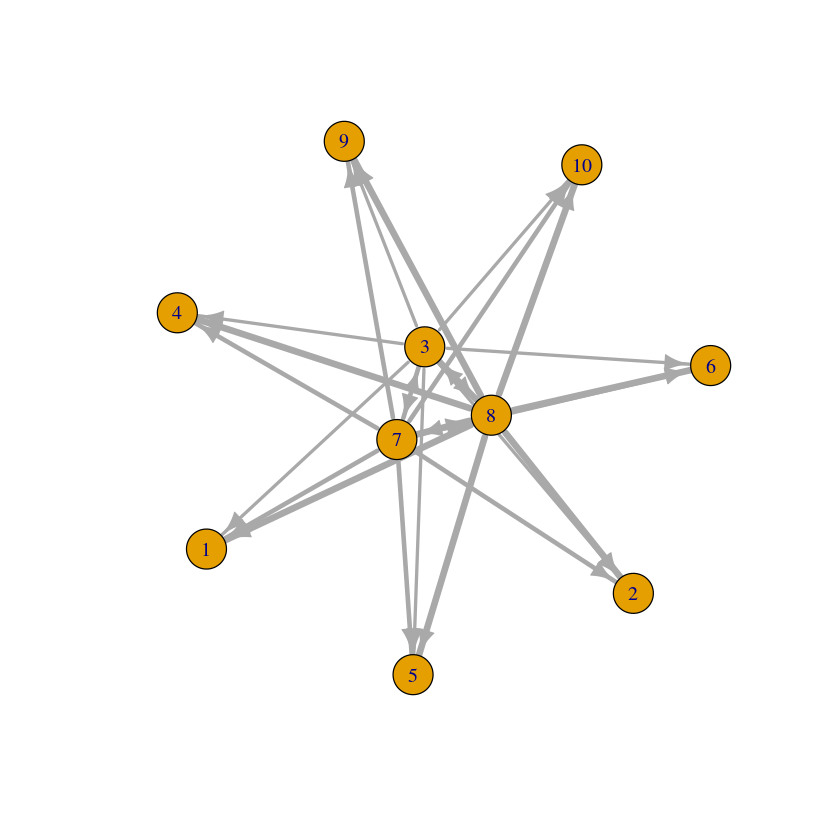

In [42]:
# Weigtted directed graph

wadjm <- matrix(data = rexp(10, rate = 4), nrow = 10, ncol = 10)
wadjm <-10*wadjm
diag(wadjm) <- 0 
# wadjm[lower.tri(wadjm)] = t(wadjm)[lower.tri(wadjm)]
wadjm

wnet <- graph_from_adjacency_matrix(wadjm,weighted=T)
wnet
cut.off <- mean(E(wnet)$weight) 
wnet.sp <- delete_edges(wnet, E(wnet)[weight<cut.off])
plot(wnet.sp,edge.width=E(wnet.sp)$weight)

[,1]     [,2]      [,3]      [,4]      [,5]      [,6]      [,7]     
 [1,] 0.000000 1.0400888 1.0400888 1.0400888 1.0400888 1.0400888 1.0400888
 [2,] 1.040089 0.0000000 0.7075776 0.7075776 0.7075776 0.7075776 0.7075776
 [3,] 1.040089 0.7075776 0.0000000 2.6589758 2.6589758 2.6589758 2.6589758
 [4,] 1.040089 0.7075776 2.6589758 0.0000000 0.8566373 0.8566373 0.8566373
 [5,] 1.040089 0.7075776 2.6589758 0.8566373 0.0000000 1.1579186 1.1579186
 [6,] 1.040089 0.7075776 2.6589758 0.8566373 1.1579186 0.0000000 0.6333926
 [7,] 1.040089 0.7075776 2.6589758 0.8566373 1.1579186 0.6333926 0.0000000
 [8,] 1.040089 0.7075776 2.6589758 0.8566373 1.1579186 0.6333926 3.6891180
 [9,] 1.040089 0.7075776 2.6589758 0.8566373 1.1579186 0.6333926 3.6891180
[10,] 1.040089 0.7075776 2.6589758 0.8566373 1.1579186 0.6333926 3.6891180
      [,8]      [,9]      [,10]    
 [1,] 1.0400888 1.0400888 1.0400888
 [2,] 0.7075776 0.7075776 0.7075776
 [3,] 2.6589758 2.6589758 2.6589758
 [4,] 0.8566373 0.8566373 0.8566373
 [5,] 1.1579186 1.1579186 1.1579186
 [6,] 0.6333926 0.6333926 0.6333926
 [7,] 3.6891180 3.6891180 3.6891180
 [8,] 0.0000000 5.3217239 5.3217239
 [9,] 5.3217239 0.0000000 1.2911232
[10,] 5.3217239 1.2911232 0.0000000

IGRAPH U-W- 10 45 -- 
+ attr: weight (e/n)
+ edges:
 [1] 1-- 2 1-- 3 1-- 4 1-- 5 1-- 6 1-- 7 1-- 8 1-- 9 1--10 2-- 3 2-- 4 2-- 5
[13] 2-- 6 2-- 7 2-- 8 2-- 9 2--10 3-- 4 3-- 5 3-- 6 3-- 7 3-- 8 3-- 9 3--10
[25] 4-- 5 4-- 6 4-- 7 4-- 8 4-- 9 4--10 5-- 6 5-- 7 5-- 8 5-- 9 5--10 6-- 7
[37] 6-- 8 6-- 9 6--10 7-- 8 7-- 9 7--10 8-- 9 8--10 9--10

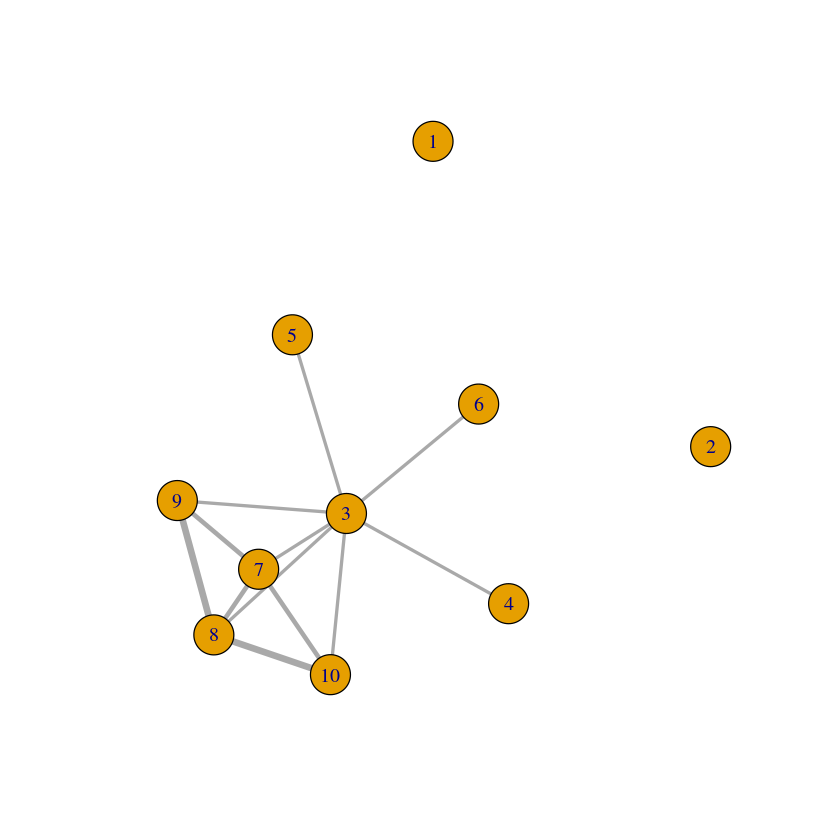

In [43]:
# Weighted undirected graph

wadjm[lower.tri(wadjm)] = t(wadjm)[lower.tri(wadjm)]
wadjm

wnet <- graph_from_adjacency_matrix(wadjm,mode="undirected",weighted=T)
wnet
cut.off <- mean(E(wnet)$weight) 
wnet.sp <- delete_edges(wnet, E(wnet)[weight<cut.off])
plot(wnet.sp,edge.width=E(wnet.sp)$weight)

### 1.2.3 Access to Vertices, Edges and the Adjacency Matrix in *igraph*

In [44]:
V(g8)

+ 7/7 vertices, named:
[1] John     Jim      Jack     Jesse    Janis    Jennifer Justin  

In [45]:
E(g8)

+ 4/4 edges (vertex names):
[1] John->Jim  Jim ->Jack Jim ->Jack John->John

In [46]:
g8[]

7 x 7 sparse Matrix of class "dgCMatrix"
         John Jim Jack Jesse Janis Jennifer Justin
John        1   1    .     .     .        .      .
Jim         .   .    2     .     .        .      .
Jack        .   .    .     .     .        .      .
Jesse       .   .    .     .     .        .      .
Janis       .   .    .     .     .        .      .
Jennifer    .   .    .     .     .        .      .
Justin      .   .    .     .     .        .      .

In [47]:
g8[1,]

John      Jim     Jack    Jesse    Janis Jennifer   Justin 
       1        1        0        0        0        0        0

In [48]:
g8[,3]

John      Jim     Jack    Jesse    Janis Jennifer   Justin 
       0        2        0        0        0        0        0

#### 1.3.3 Adding Attributes Vertices Edges, and to the Network

In [49]:
V(g8)$name

[1] "John"     "Jim"      "Jack"     "Jesse"    "Janis"    "Jennifer" "Justin"

In [50]:
# New nodal attribute

V(g8)$gender <- c("male", "male", "male", "male", "female", "female", "male")
V(g8)$name[4]
V(g8)$gender[4]

[1] "Jesse"

[1] "male"

In [51]:
# Eamine verex attributes

vertex_attr(g8)

$name
[1] "John"     "Jim"      "Jack"     "Jesse"    "Janis"    "Jennifer" "Justin"  

$gender
[1] "male"   "male"   "male"   "male"   "female" "female" "male"

In [52]:
# New edge attributes

length(E(g8))
E(g8)$type <- "email" # Assign "email" to all edges
E(g8)$type
E(g8)$weight <- sample(1:100, length(E(g8)), replace=T)
E(g8)$weight

[1] 4

[1] "email" "email" "email" "email"

[1] 85  5 39 32

In [53]:
# Examine edge attributes

edge_attr(g8)

$type
[1] "email" "email" "email" "email"

$weight
[1] 85  5 39 32

In [54]:
# Set graph attributes

g8 <- set_graph_attr(g8, "name", "Email Network")
graph_attr(g8)

$name
[1] "Email Network"

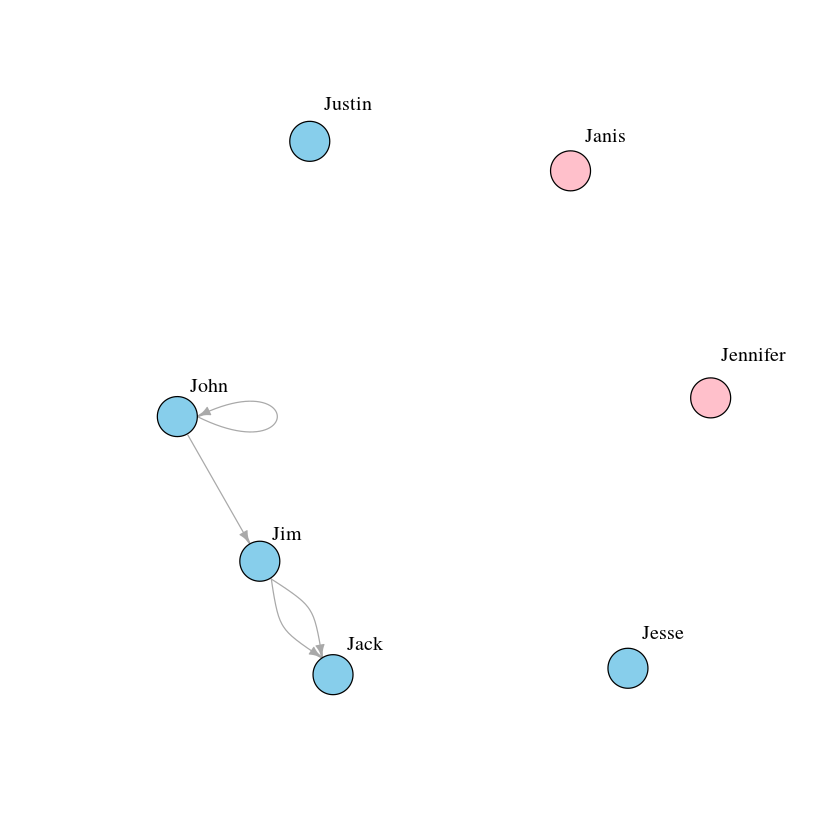

In [55]:
plot(g8, edge.arrow.size=.5, vertex.label.color="black", vertex.label.dist=1,
     vertex.color=c( "pink", "skyblue")[1+(V(g8)$gender=="male")] )

IGRAPH DNW- 7 3 -- Email Network
+ attr: name (g/c), name (v/c), gender (v/c), weight (e/n)
+ edges (vertex names):
[1] John->John John->Jim  Jim ->Jack

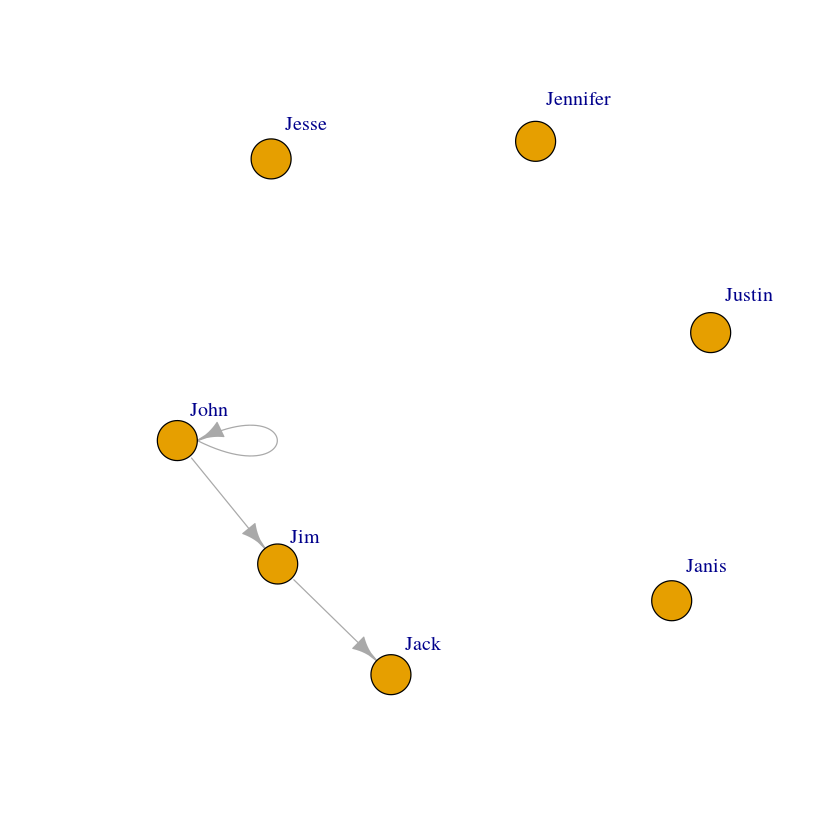

In [56]:
# Simplify to remove multiple edges and self-loops

g8s <- simplify( g8, remove.multiple = T, remove.loops = F, 
                edge.attr.comb=c(weight="sum", type="ignore") )
g8s
plot(g8s, vertex.label.dist=1)

### 1.2.4 Specific Graphs in *igraph*

#### Empty graph

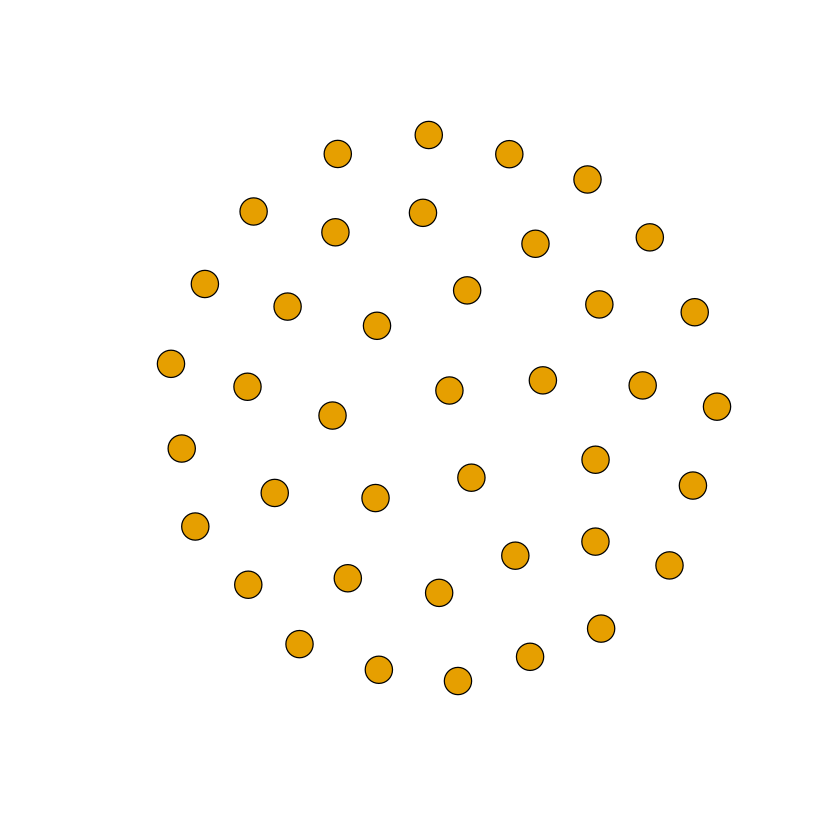

In [57]:
eg <- make_empty_graph(40)
plot(eg, vertex.size=10, vertex.label=NA)

#### Complete graph

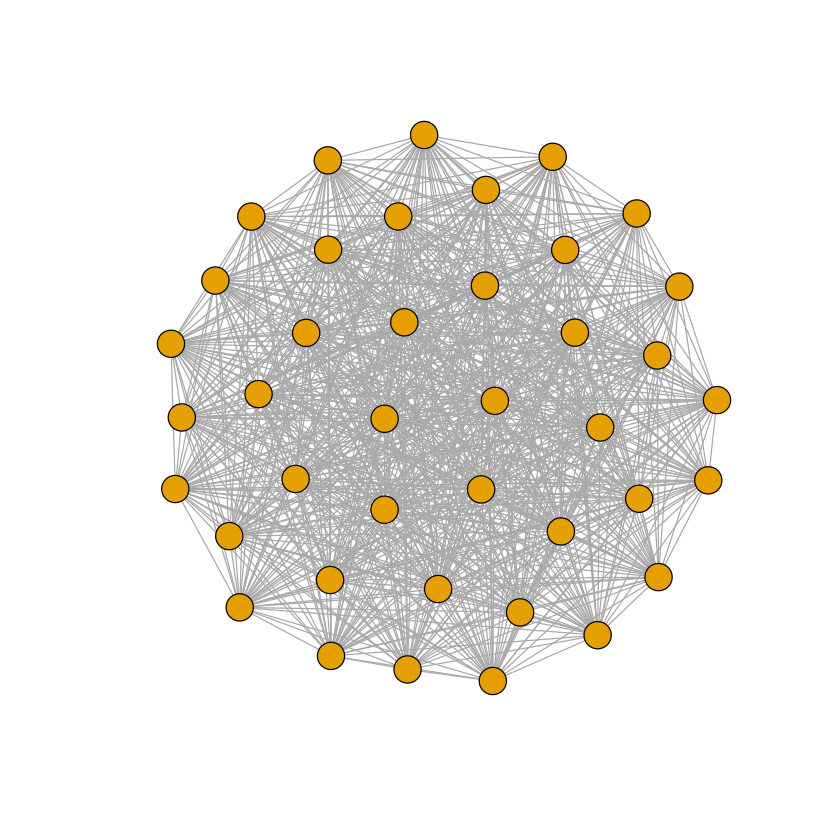

In [58]:
fg <- make_full_graph(40)
plot(fg, vertex.size=10, vertex.label=NA)

#### Star graph

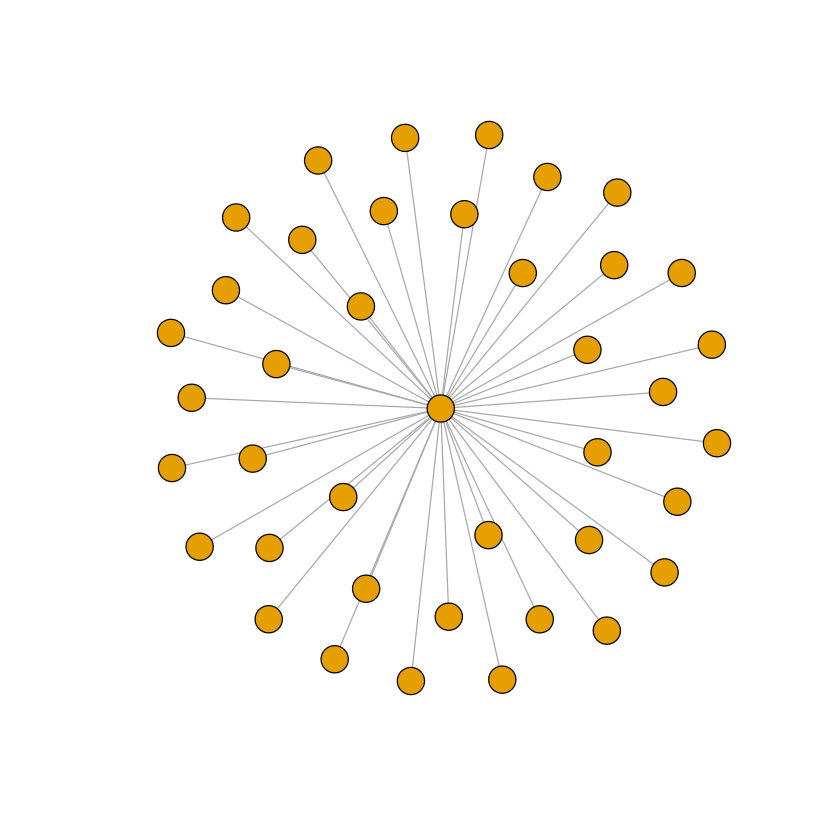

In [59]:
st <- make_star(40,mode="undirected")
plot(st, vertex.size=10, vertex.label=NA)

#### Tree graph

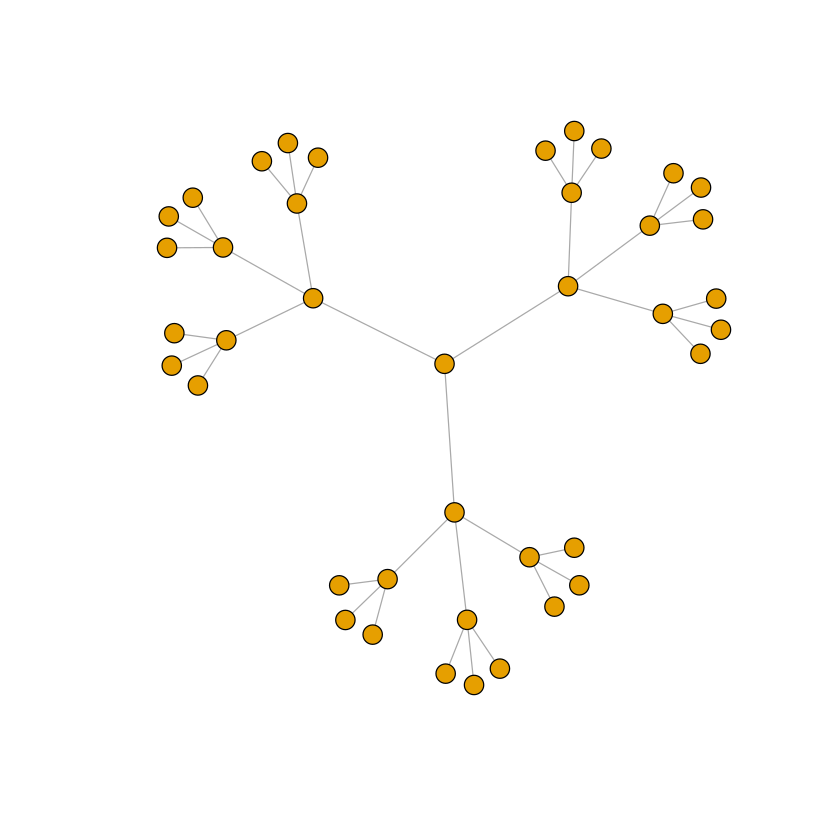

In [60]:
tr <- make_tree(40, children = 3, mode = "undirected")
plot(tr, vertex.size=7, vertex.label=NA)

#### Ring graph

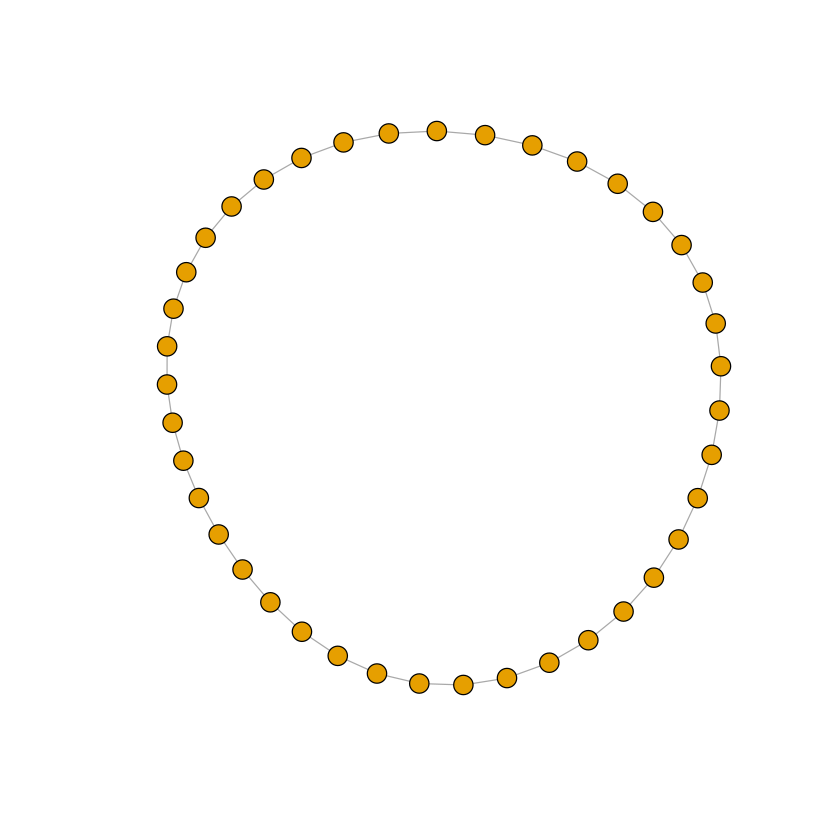

In [61]:
rn <- make_ring(40)
plot(rn, vertex.size=7, vertex.label=NA)

#### The Zachary Karate Club network

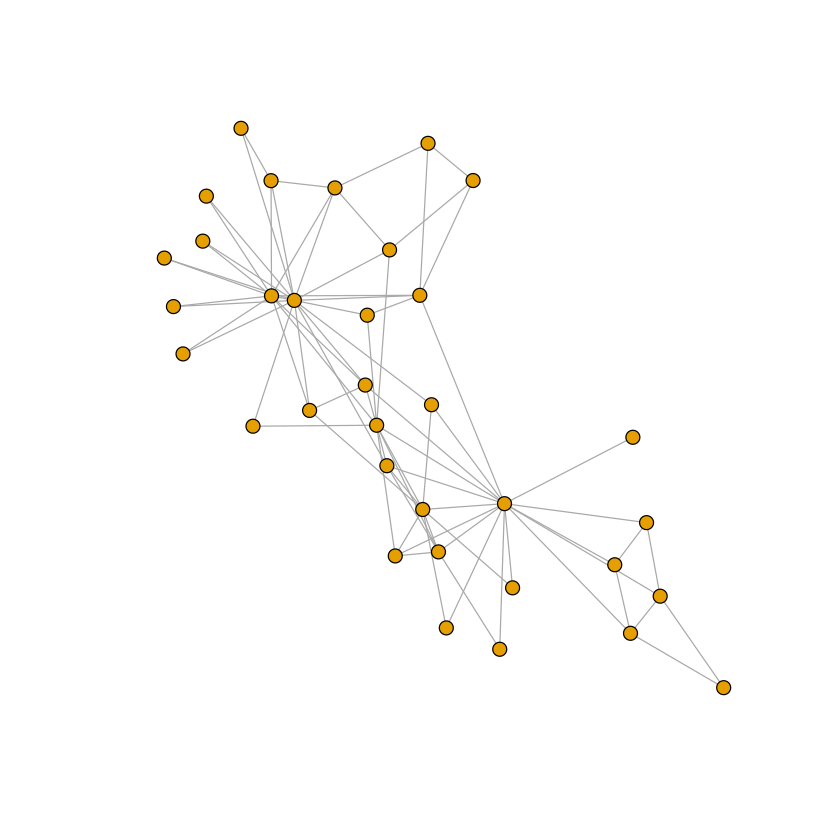

In [62]:
zach <- graph("Zachary") 
plot(zach, vertex.size=5, vertex.label=NA)

### 1.2.5 Elementary Random Graph Generation in *igraph*

#### Erdos-Renyi random graph model

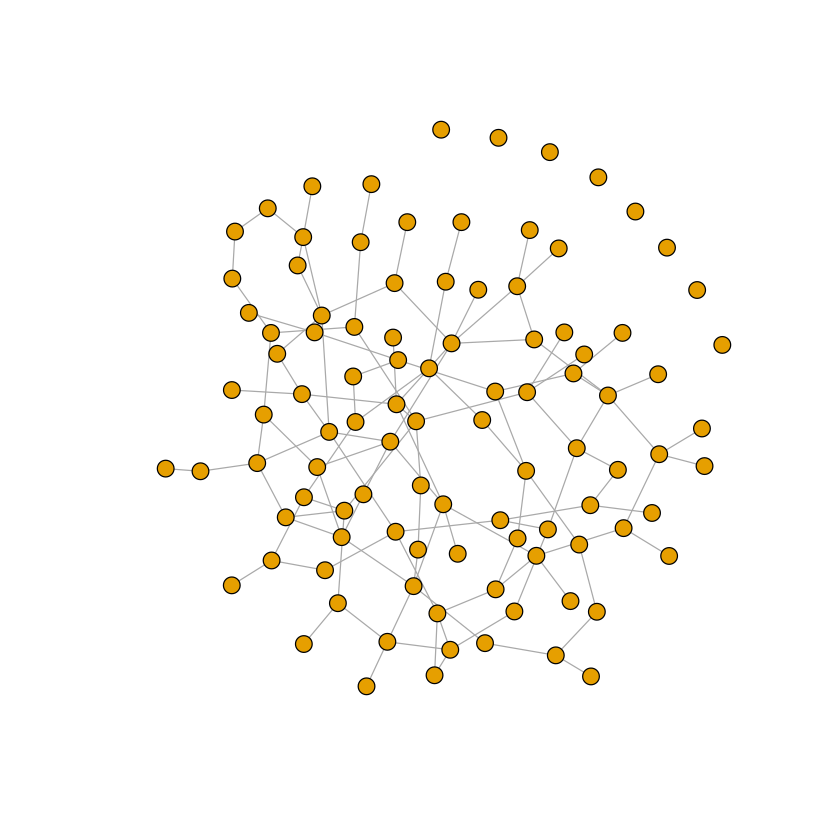

In [63]:
# n is number of nodes, m is the number of edges

er <- sample_gnm(n=100, m=120) 
plot(er, vertex.size=6, vertex.label=NA) 

#### Watts-Strogatz small-world model

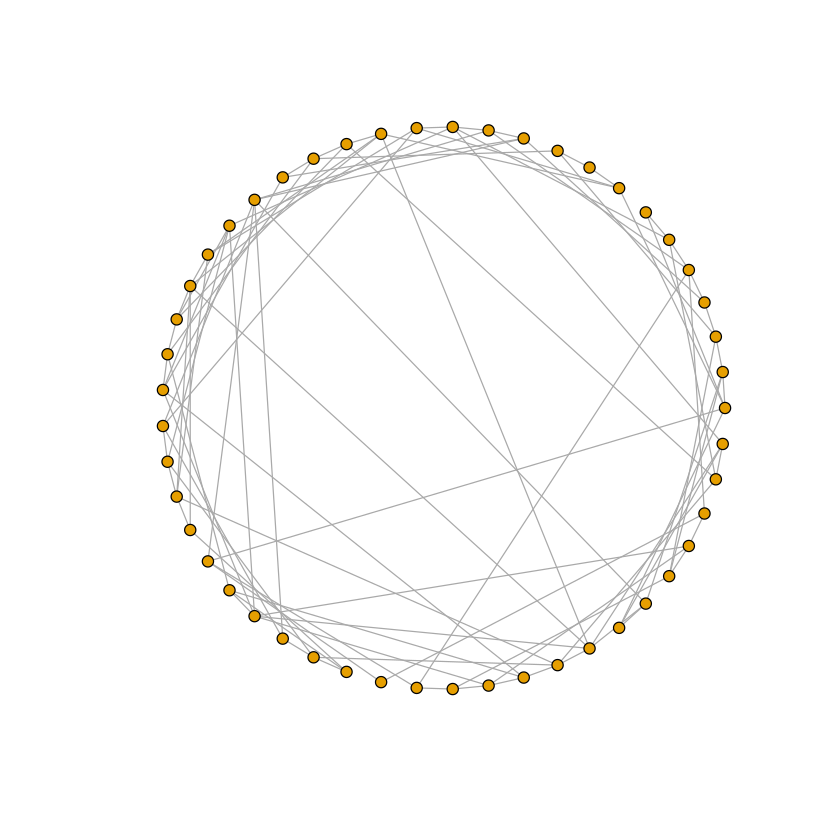

In [64]:
# Creates a lattice (with dim dimensions and size nodes across dimension) 
# and rewires edges randomly with probability p. 
# The neighborhood in which edges are connected is nei. 
# You can allow loops and multiple edges.

sw <- sample_smallworld(dim=2, size=7, nei=1, p=0.1)
plot(sw, vertex.size=4, vertex.label=NA, layout=layout_in_circle)

#### Barabasi-Albert preferential attachment model for scale-free graphs

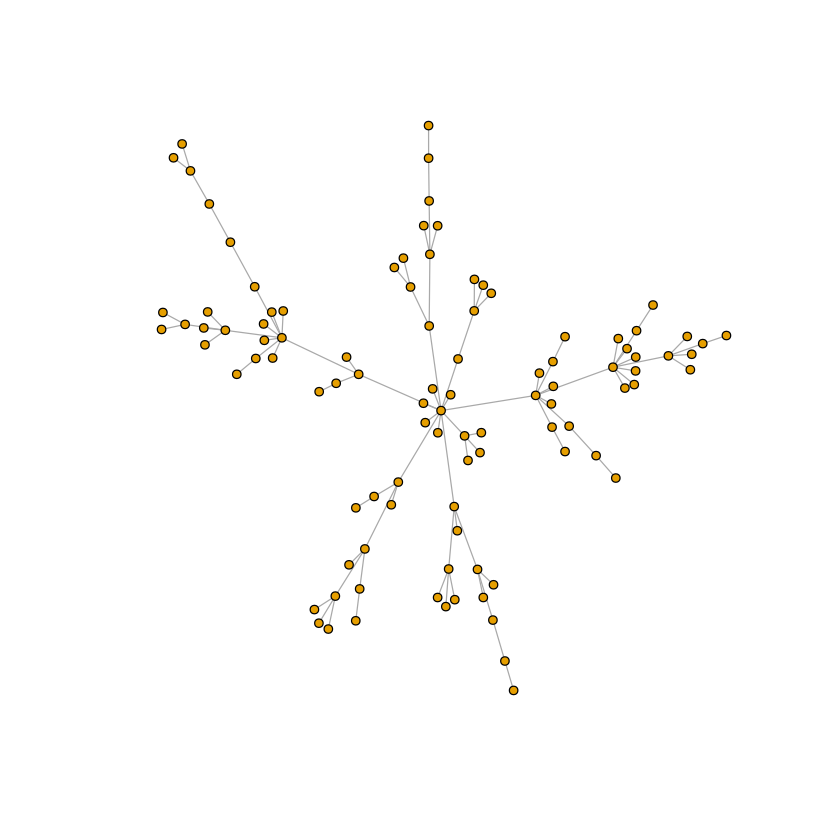

In [65]:
# n is number of nodes, power is the power of attachment (1 is linear); 
# m is the number of edges added on each time step

ba <-  sample_pa(n=100, power=1, m=1,  directed=F)
plot(ba, vertex.size=3, vertex.label=NA)

#### Random Bipartite Graphs

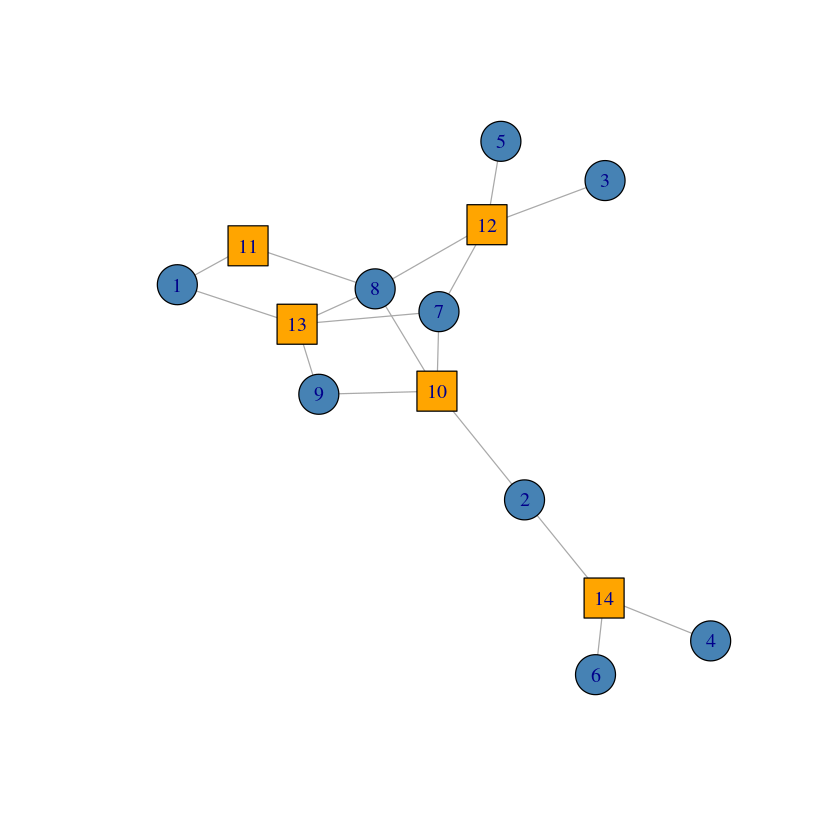

In [66]:
set.seed(123)
g <- sample_bipartite(10, 5, p=.4)

# Delete isolates
g <- g - V(g)[degree(g)==0]

# Define color and shape 
col <- c("steelblue", "orange")
shape <- c("circle", "square")

plot(g,
  vertex.color = col[as.numeric(V(g)$type)+1],
  vertex.shape = shape[as.numeric(V(g)$type)+1]
)

<a id='2'></a>
## 2. Network Visualization in *R*

<a id='2.1'></a>
### 2.1. Plotting in *sna*

#### 2.1.1 Plotting with *gplot*

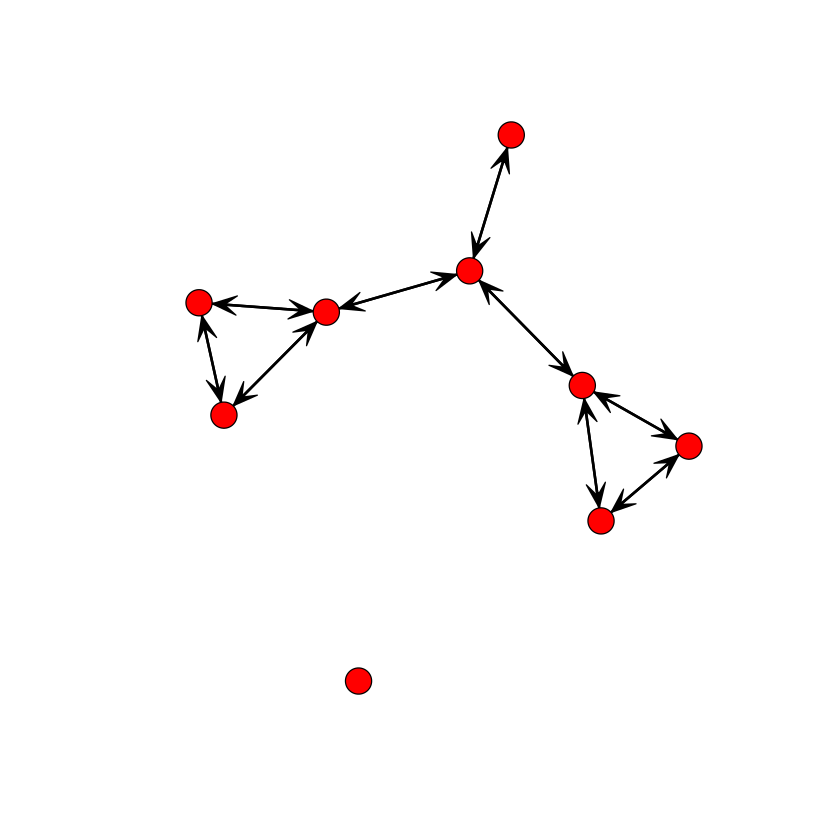

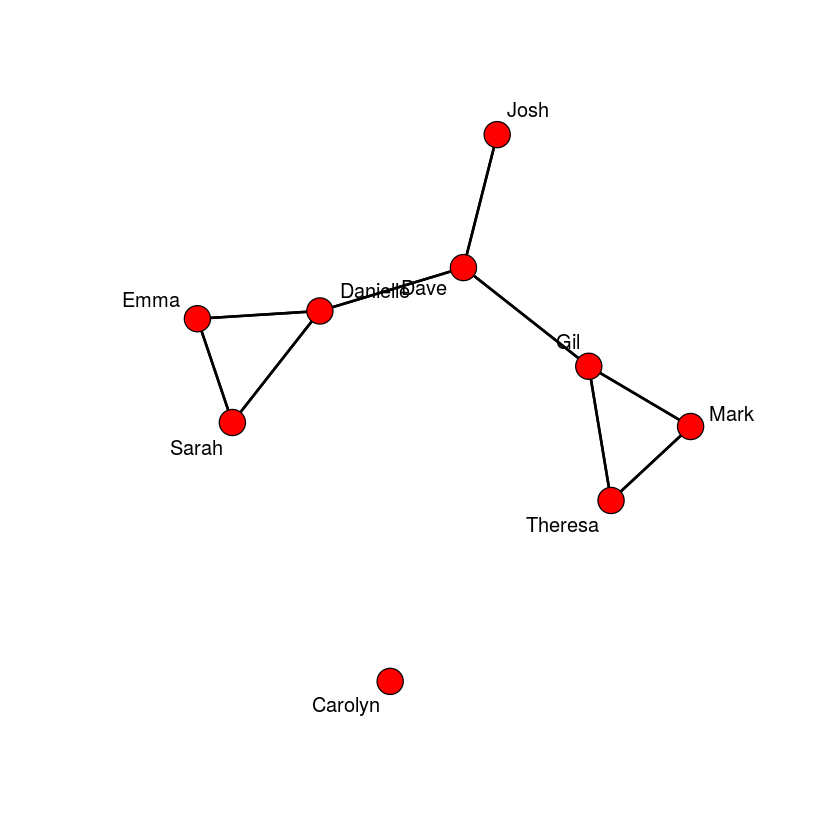

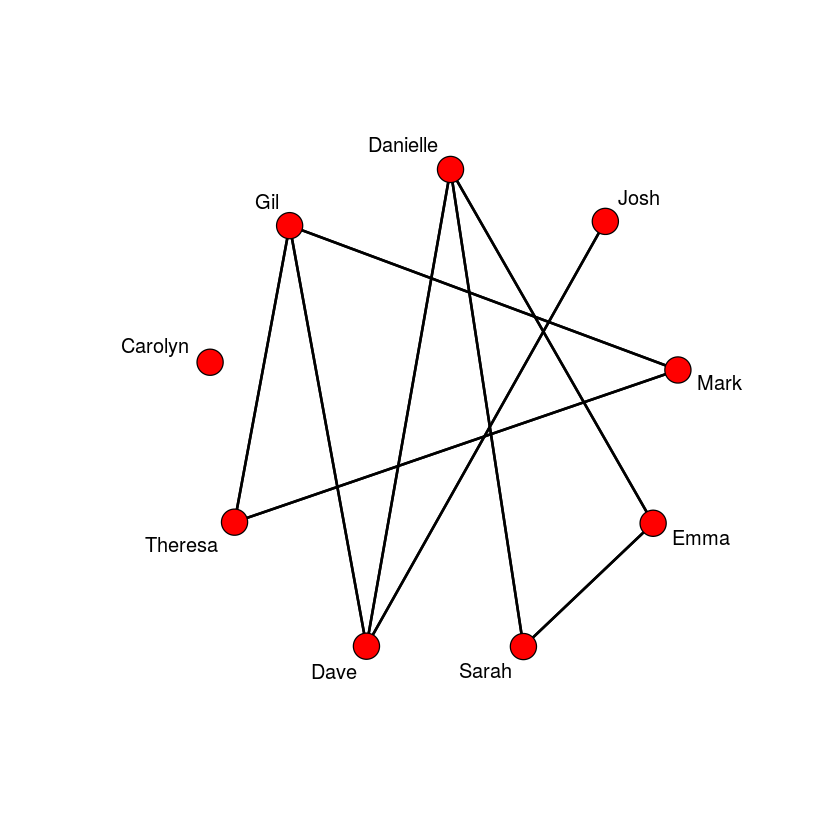

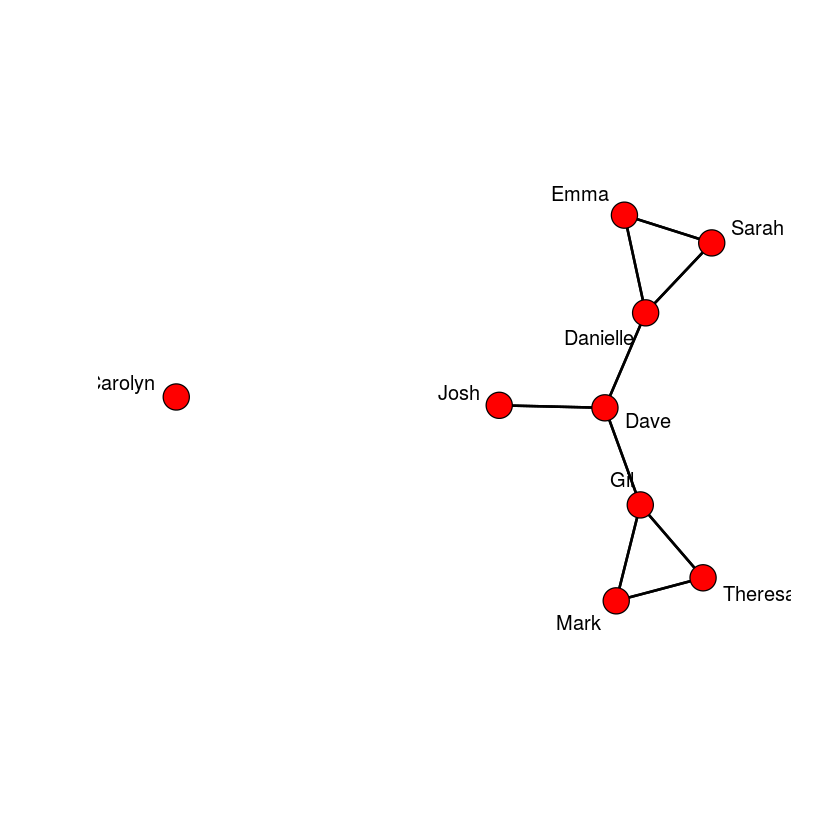

In [67]:
library(sna)                                         # Load the sna library

gplot(relations)                                     # Default graph is taken to be DIRECTED and WITHOUT NAMES of nodes! 
gplot(relations,gmode="graph",displaylabels=T)       # Plot as UNDIRECTED and WITH NAMES of nodes! 
# gplot(relations, usearrows=F,label=nodeInfo$name)        # Another way to do the same

# The default layout is Fruchterman-Reingold. Other (common) layouts are:
gplot(relations,gmode="graph",displaylabels=T, mode="circle")       # In the circular layout
gplot(relations,gmode="graph",displaylabels=T, mode="kamadakawai")  # In the Kumada-Kawai layout

# Info on gplot and all the permitted parameters. Very useful!
# ?gplot                                              
# ?gplot.layout

#### Plotting with *ggnet2*

In [68]:
# detach("package:igraph", unload=TRUE)

Loading required package: scales


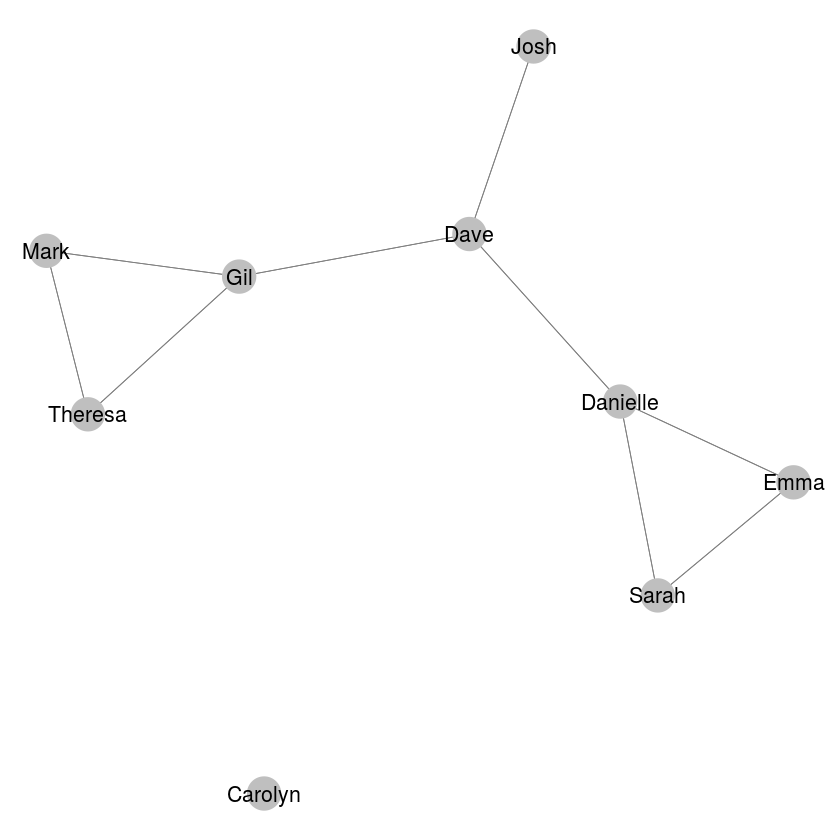

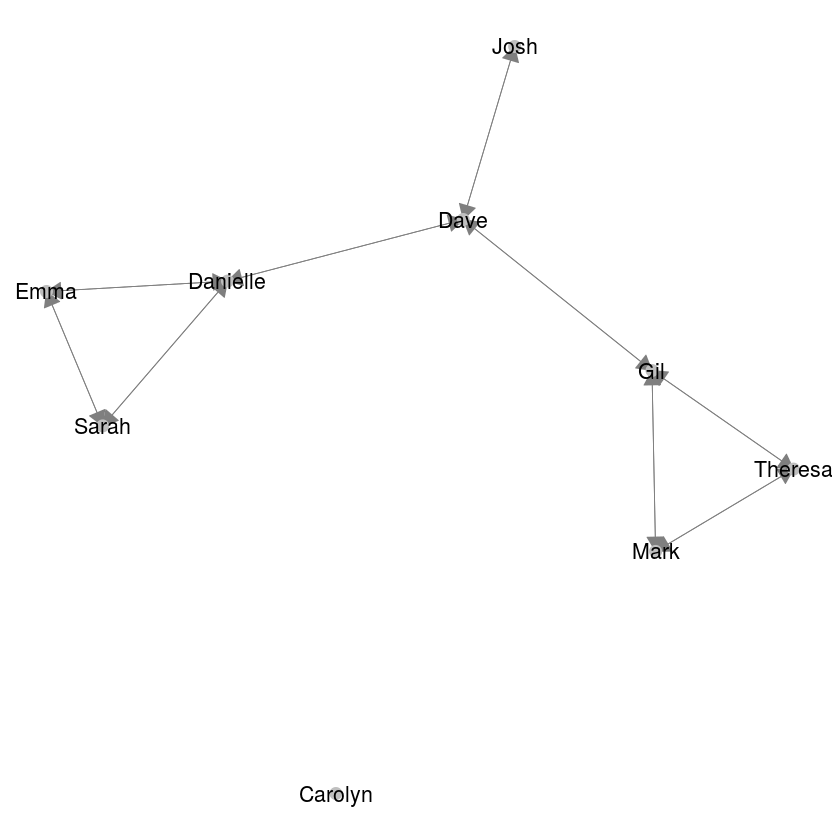

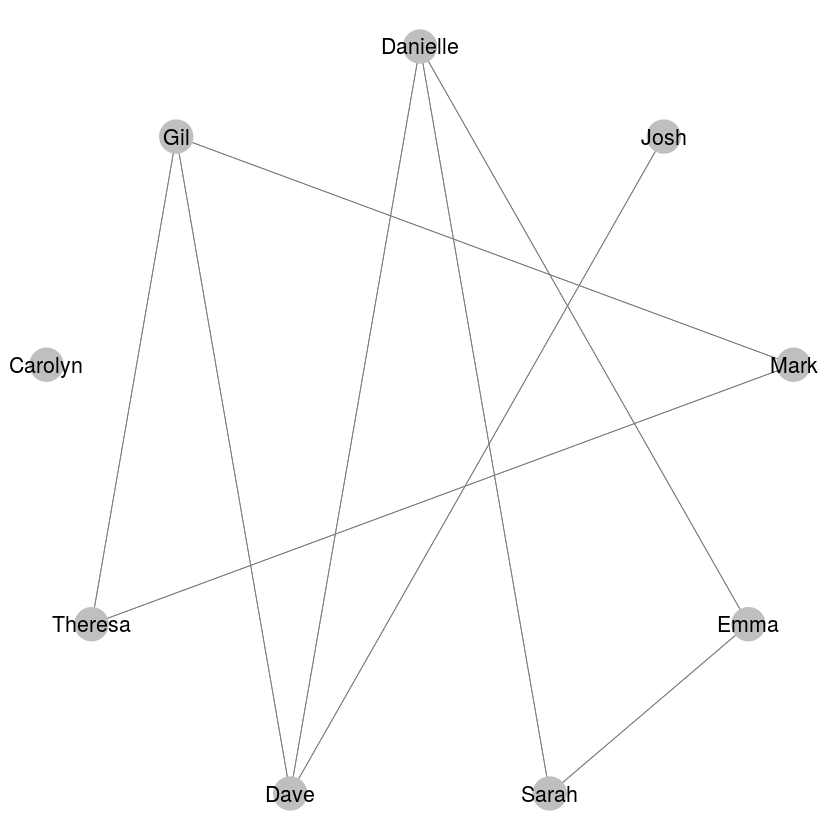

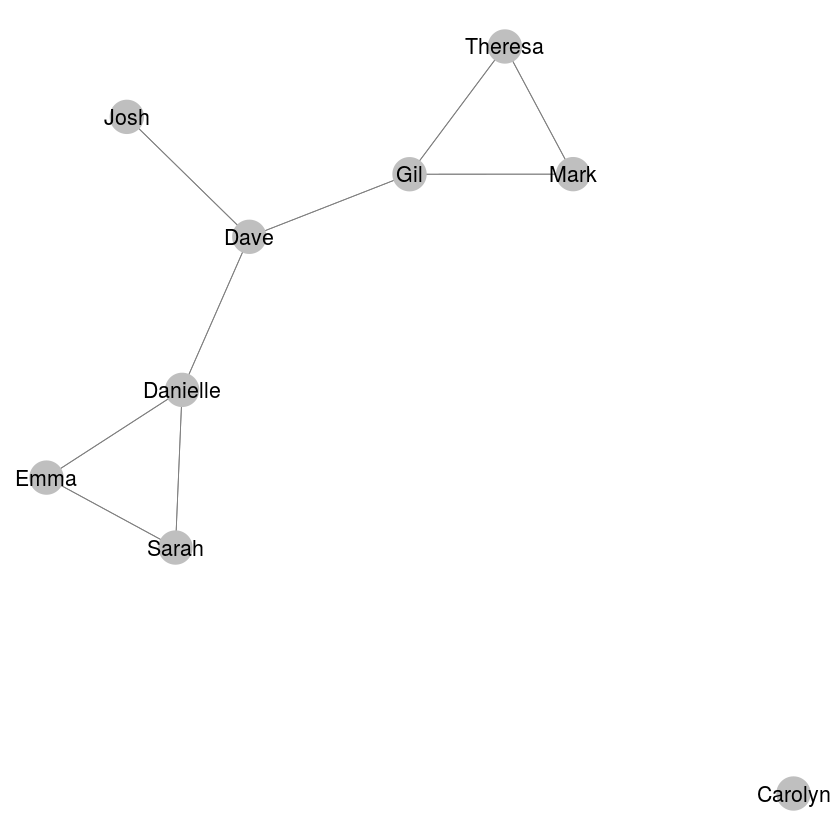

In [69]:
library(GGally)                                  # Load the GGally library for ggnet2

ggnet2(relations,label=nodeInfo$name)            # Default graph is taken to be UNDIRECTED and WITHOUT NAMES of nodes! 

ggnet2(network(relations,gmode="digraph"),size=3,arrow.size = 10,label=nodeInfo$name) # Plot as DIRECTED and WITH NAMES of nodes! 

# The default layout is Fruchterman-Reingold. Other (common) layouts are:
ggnet2(relations,label=nodeInfo$name, mode="circle")       # In the circular layout
ggnet2(relations,label=nodeInfo$name, mode="kamadakawai")  # In the Kumada-Kawai layout

# Info on ggnet2 and all the permitted parameters. Very useful!
# https://briatte.github.io/ggnet/

<a id='2.2'></a>
### 2.2 Coloring Attributes in *sna*

#### 2.2.1 Coloring Vertex Attributes with *gplot*

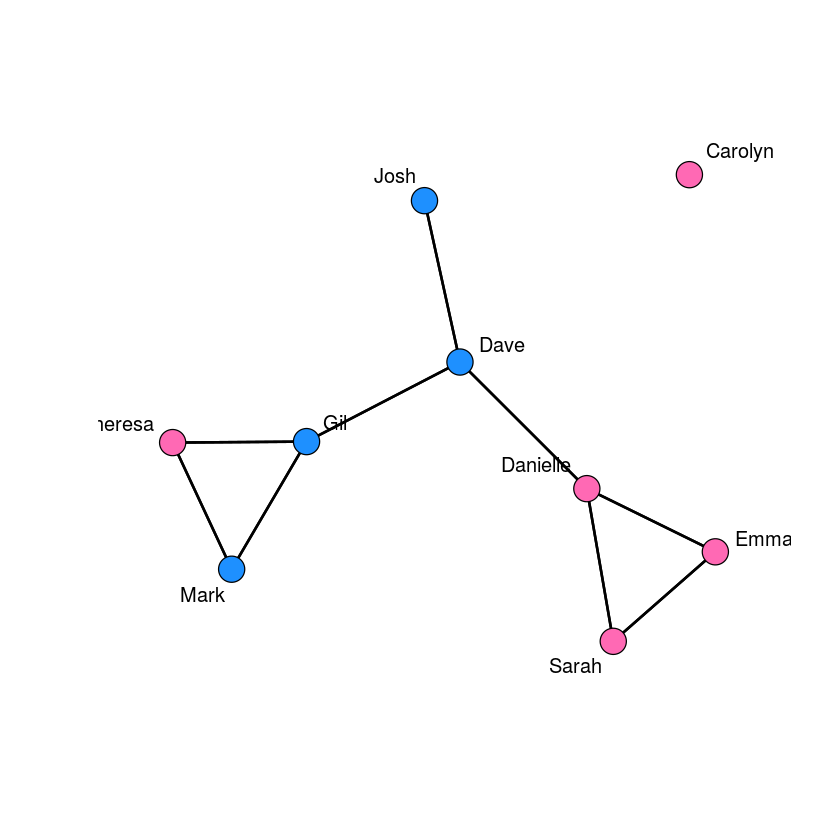

In [70]:
nodeColors <- ifelse(nodeInfo$sex=="F","hotpink","dodgerblue")
gplot(relations,gmode="graph",displaylabels=T,vertex.col=nodeColors)

#### 2.2.2 Coloring Vertex Attributes with *ggnet2*

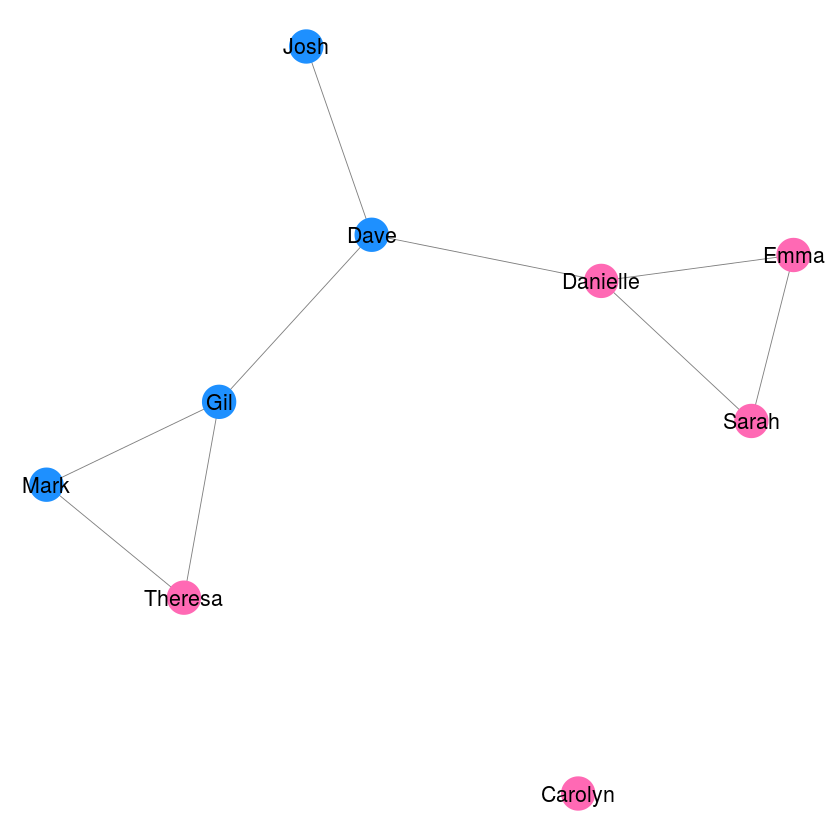

In [71]:
net <- network(relations, directed = FALSE)
net %v% "nodeColors" <- ifelse(nodeInfo$sex=="F","hotpink","dodgerblue")
ggnet2(net,label=nodeInfo$name,color=nodeColors)

#### 2.2.3 Edge Labels (Weights) with *ggnet2*

[,1]      [,2]     [,3]      [,4]     [,5]     
[1,] 0.0000000 1.539834 0.5309928 1.539834 0.5309928
[2,] 1.5398335 0.000000 2.0364151 3.126088 2.0364151
[3,] 0.5309928 2.036415 0.0000000 5.391129 3.1299580
[4,] 1.5398335 3.126088 5.3911289 0.000000 5.6453415
[5,] 0.5309928 2.036415 3.1299580 5.645342 0.0000000

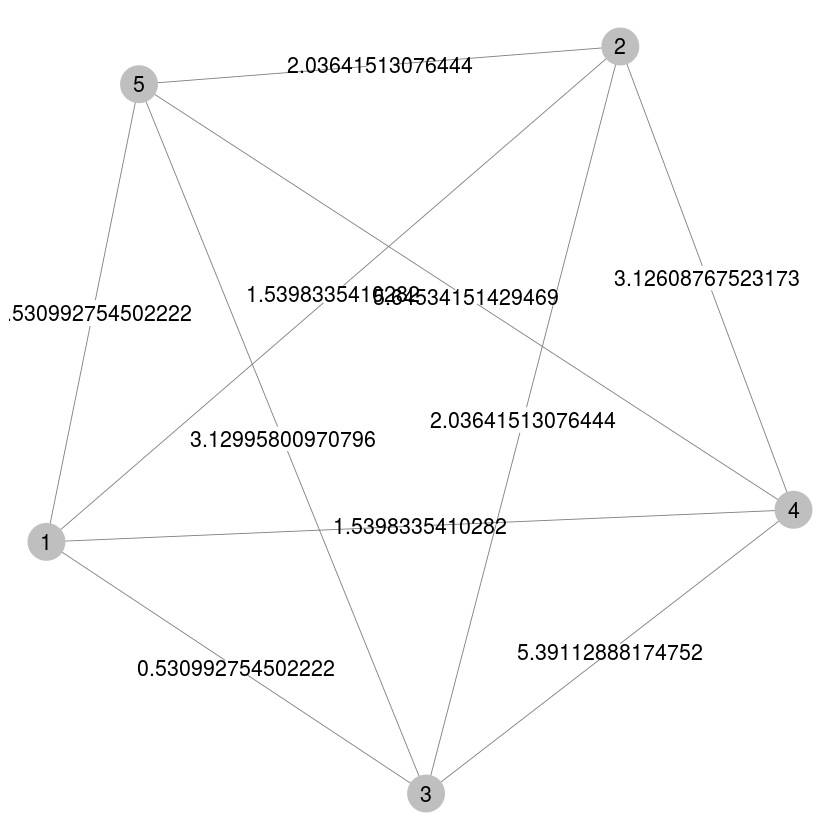

In [72]:
wm <- matrix(data = rexp(10, rate = 4), nrow = 5, ncol = 5)
wm <-10*wm
# wm <- matrix(sample.int(20, 6*6, TRUE), 6, 6)
diag(wm) <- 0 
wm[lower.tri(wm)] = t(wm)[lower.tri(wm)]
# options(digits=2)
wm
wn <- network(wm,directed=F,ignore.eval = FALSE,names.eval = "weights") 

ggnet2(wn,size=10,label = TRUE, edge.label = "weights")

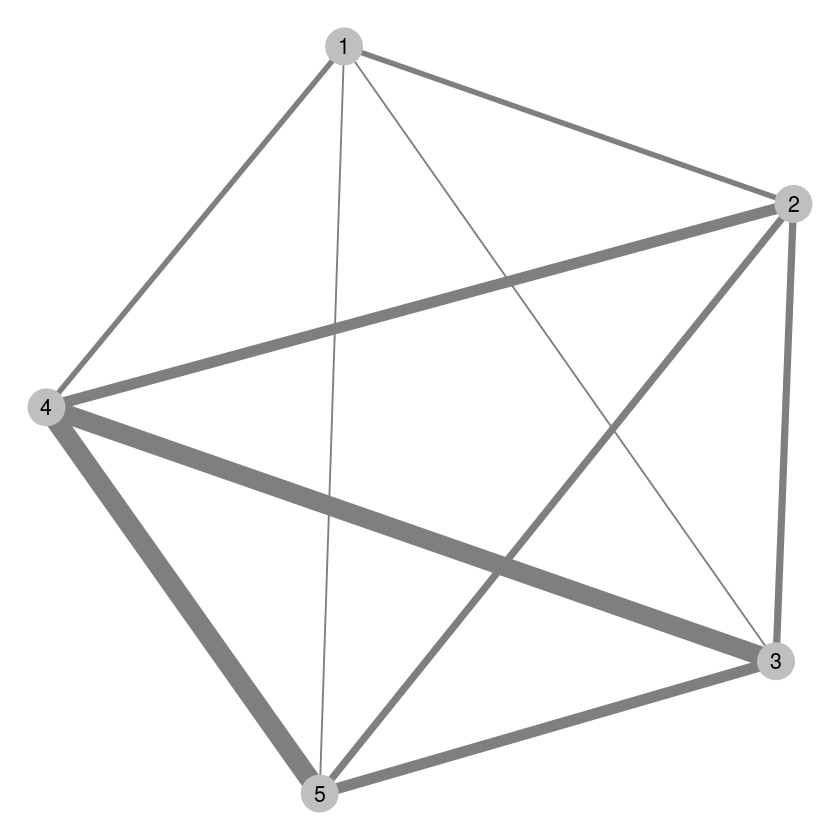

In [73]:
ggnet2(wn,size=10,label = TRUE, edge.size = "weights")

[,1] [,2]     [,3]     [,4]     [,5]    
[1,] 0    0.000000 0.000000 0.000000 0.000000
[2,] 0    0.000000 0.000000 3.126088 0.000000
[3,] 0    0.000000 0.000000 5.391129 3.129958
[4,] 0    3.126088 5.391129 0.000000 5.645342
[5,] 0    0.000000 3.129958 5.645342 0.000000

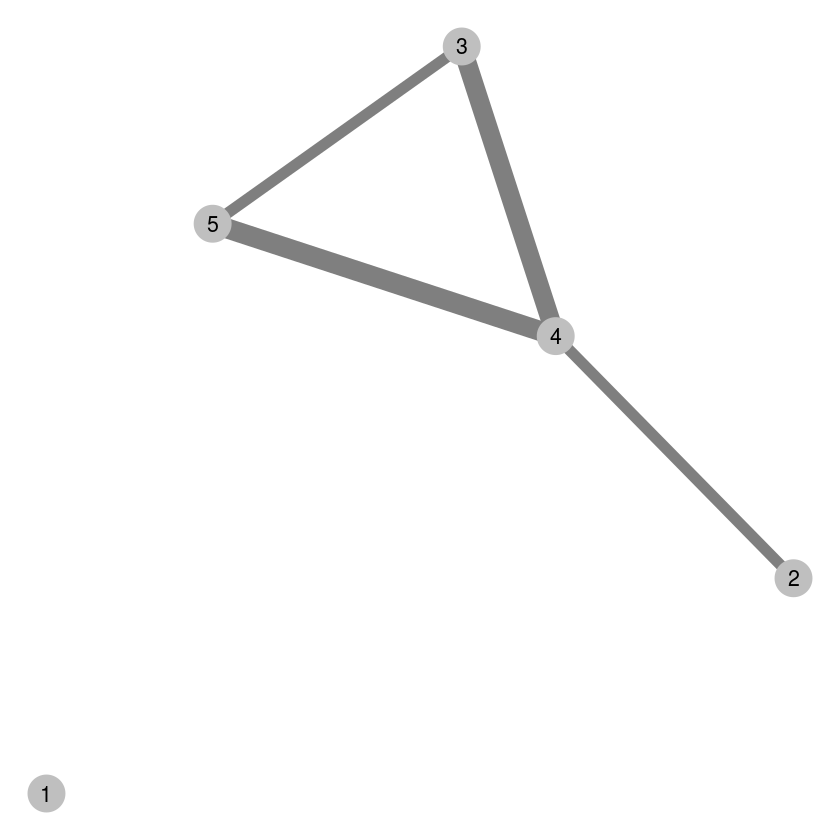

In [74]:
cut.off <- 2.2
fwm = wm[,]
fwm[fwm < cut.off] <- 0
fwm
fwn <- network(fwm,directed=F,ignore.eval = FALSE,names.eval = "weights") 
ggnet2(fwn,size=10,label = TRUE, edge.size = "weights")

In [75]:
# set.edge.attribute(wn,"color", ifelse(wn %e% "weights" > cut.off, "red", "blue"))
# ggnet2(wn,size=10,label = TRUE, edge.size = "weights", edge.color = "color")

In [76]:
# # set.edge.attribute(wn,"color", ifelse(wn %e% "weights" > cut.off, "red", "blue"))
# # ggnet2(wn,size=10,label = TRUE, edge.size = "weights", edge.color = "color")
# wm
# set.edge.attribute(wn, "lty", ifelse(wn %e% "weights" > cut.off, 1, 2))
# ggnet2(wn,size=10,label = TRUE, edge.size = "weights", edge.lty = "lty")
# # ggnet2(bip, color = "mode", palette = col, edge.size = "weights", edge.lty = "lty")

<a id='2.3'></a>
### 2.3 Plotting in *igraph*

In *igraph* a graph object might be imported in one of the following three ways:
* from an adjacency matrix or
* from a data frame or
* by hand

Below we are going to examine only the first and the third case. Moreover, we are going to show some examples of how various parametters in the graph plot might be specified.

#### Graph From Adjacency Matrix

[1] "matrix"

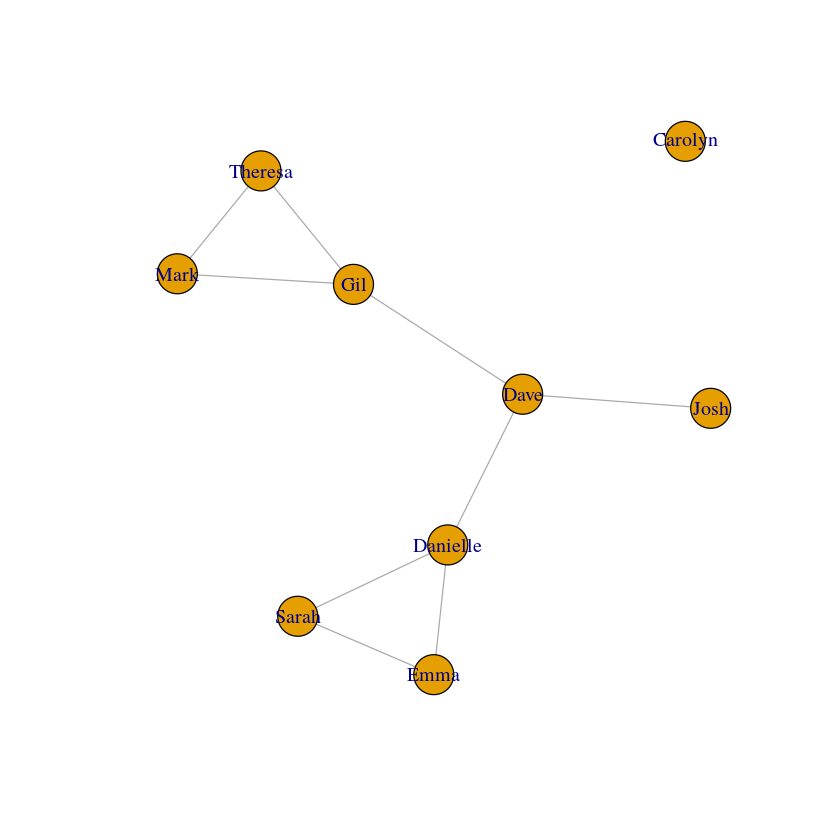

In [77]:
library(igraph)

class(relations)
g=graph.adjacency(adjmatrix=relations,mode="undirected",diag=FALSE)
plot(g)

#### Graph by Hand

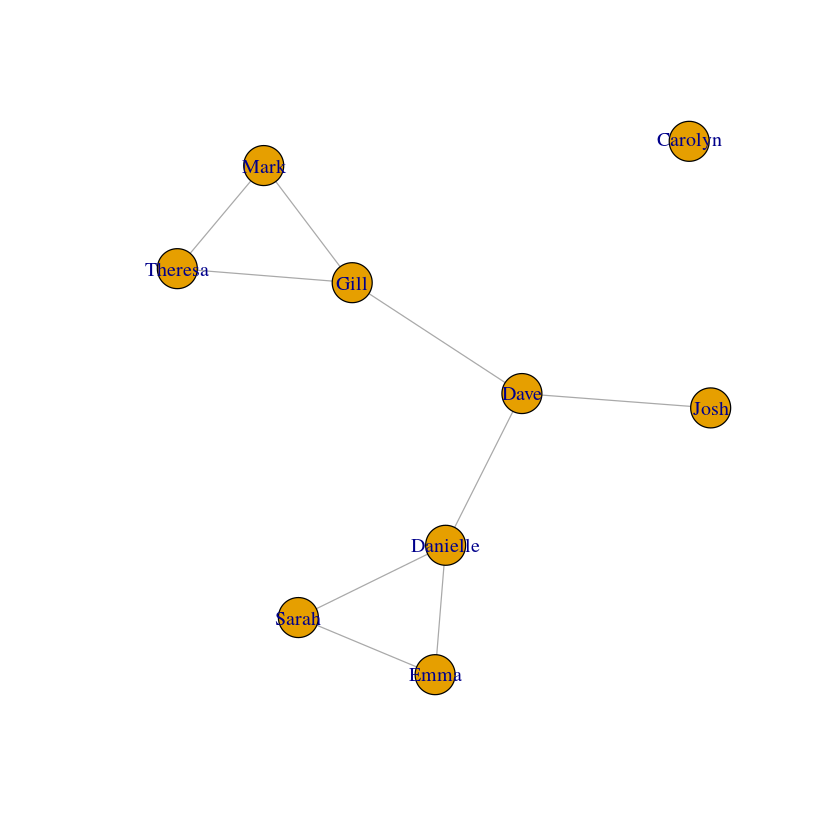

In [78]:
g <- graph.formula(Emma-Sarah-Danielle-Emma,Danielle-Dave-Josh,Dave-Gill,Gill-Theresa-Mark-Gill,Carolyn)
plot(g)

#### Graph Plot Parameters

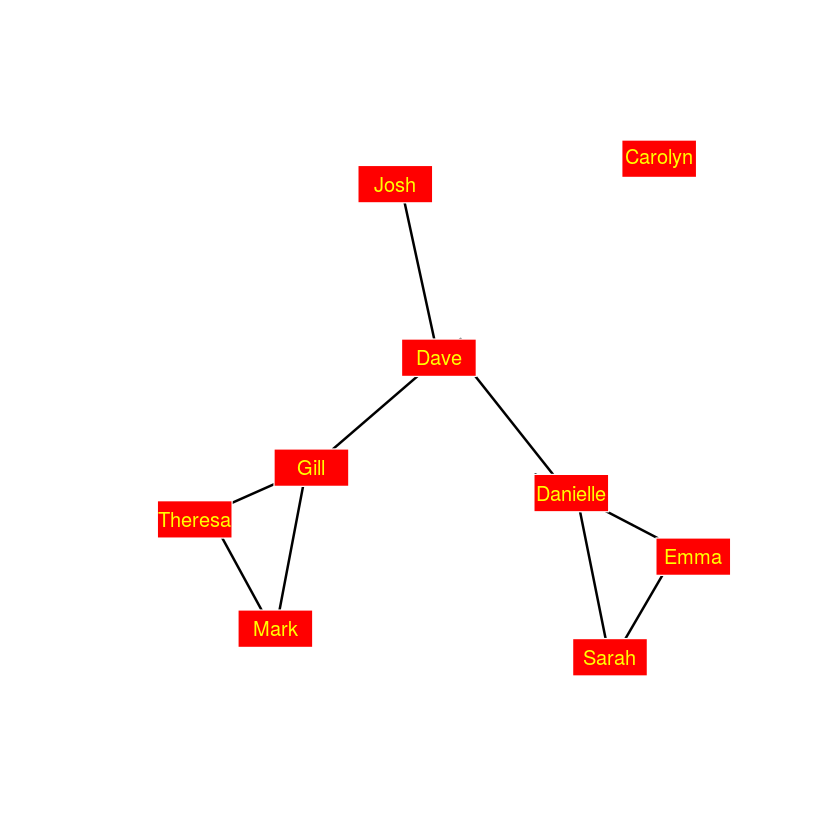

In [79]:
plot(g, layout = layout.fruchterman.reingold,
       vertex.size = 30,
       vertex.shape='rectangle',
       vertex.color="red",
       vertex.frame.color= "white",
       vertex.label.color = "yellow",
       vertex.label.family = "sans",
       edge.width=2,  
       edge.color="black")

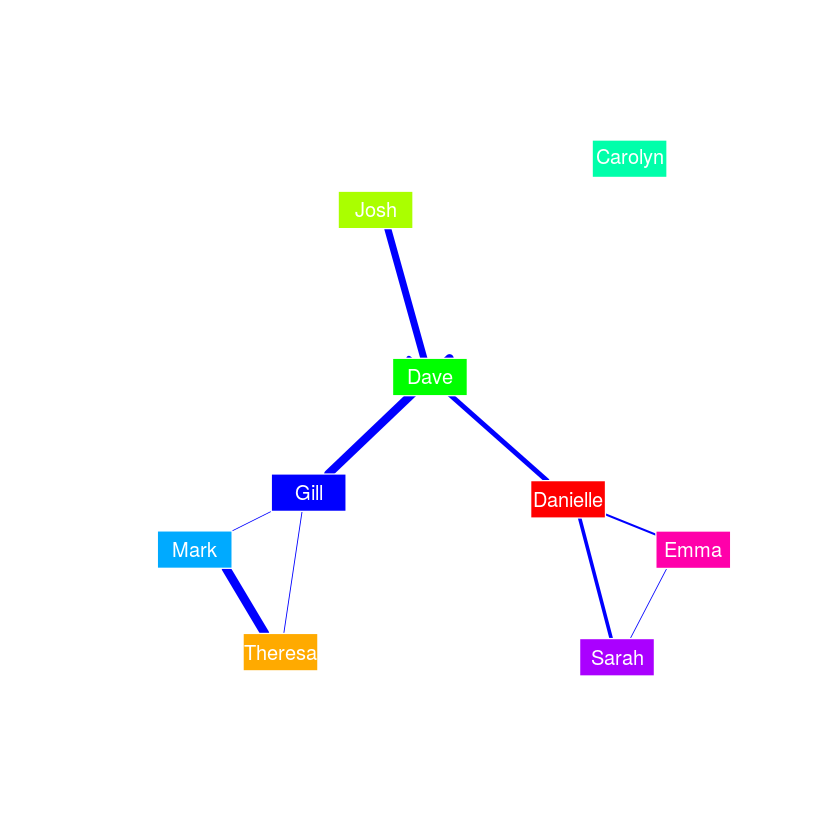

In [80]:
# Assign attributes (randomly chosen colors) to the graph's vertices
V(g)$color <- sample(rainbow(9),9,replace=FALSE)

# Assign attributes (randomly chosen weights) to the edges
E(g)$weight <- runif(length(E(g)),.5,7)

plot(g, layout = layout.fruchterman.reingold, 
     vertex.size = 30,
     vertex.shape='rectangle',
     vertex.color= V(g)$color,
     vertex.frame.color= "white",
     vertex.label.color = "white",
     vertex.label.family = "sans",
     edge.width=E(g)$weight, 
     edge.color="blue")

<a id='2.4'></a>
### 2.4 Network Layouts in *igraph*

#### The default layout of Fruchterman-Reingold

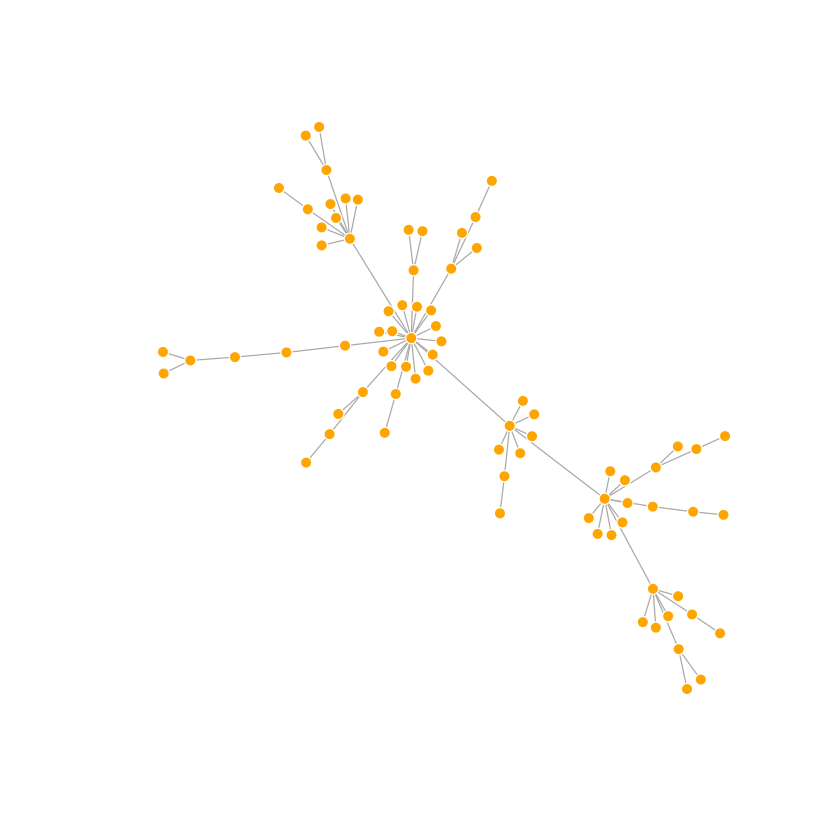

In [81]:
# Let us consider a Barabasi-Albert network

net.bg <- sample_pa(80) 
V(net.bg)$size <- 4
V(net.bg)$frame.color <- "white"
V(net.bg)$color <- "orange"
V(net.bg)$label <- "" 
E(net.bg)$arrow.mode <- 0
plot(net.bg)
# plot(net.bg,layout=layout_with_fr)

#### The Random Layout

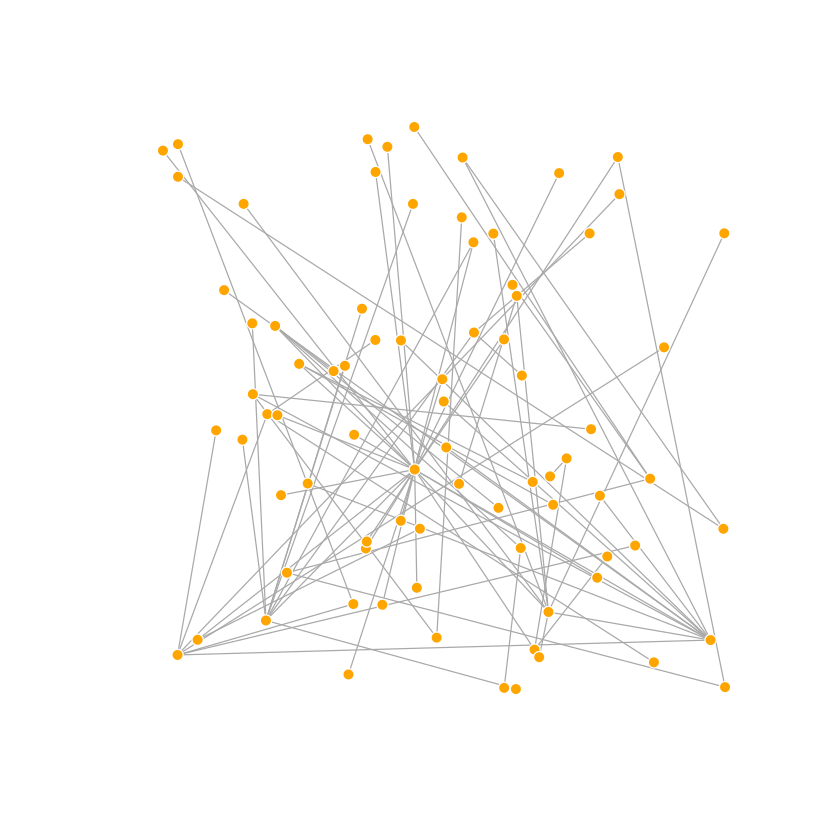

In [82]:
plot(net.bg, layout=layout_randomly)

#### The Circular Layout

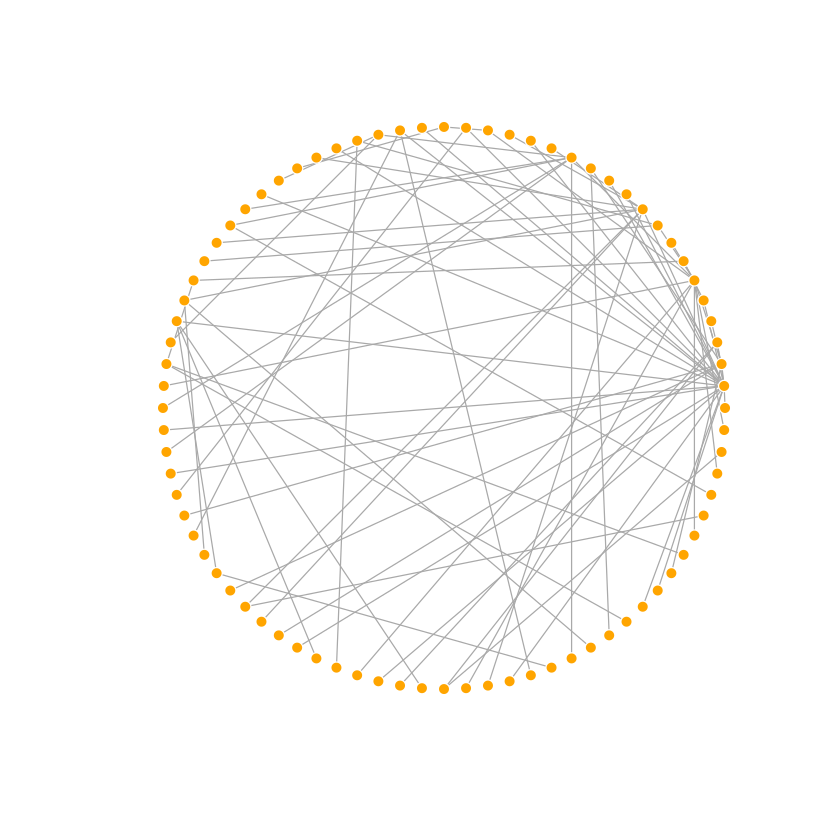

In [83]:
plot(net.bg, layout=layout_in_circle)

#### The Spherical Layout

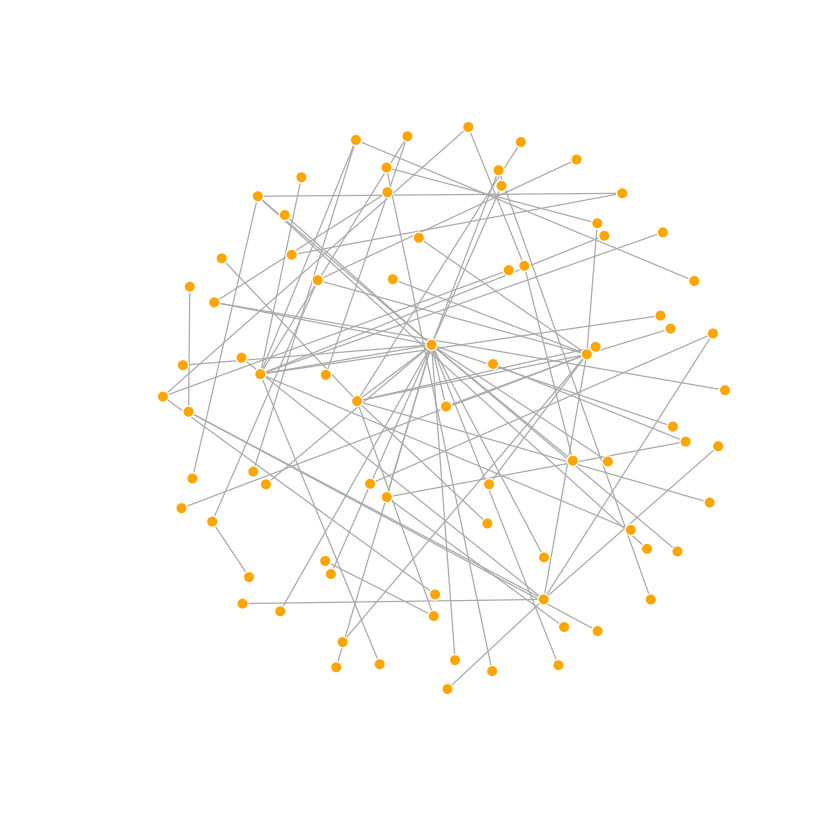

In [84]:
plot(net.bg, layout=layout_on_sphere)

#### The Layout Kamada-Kawai

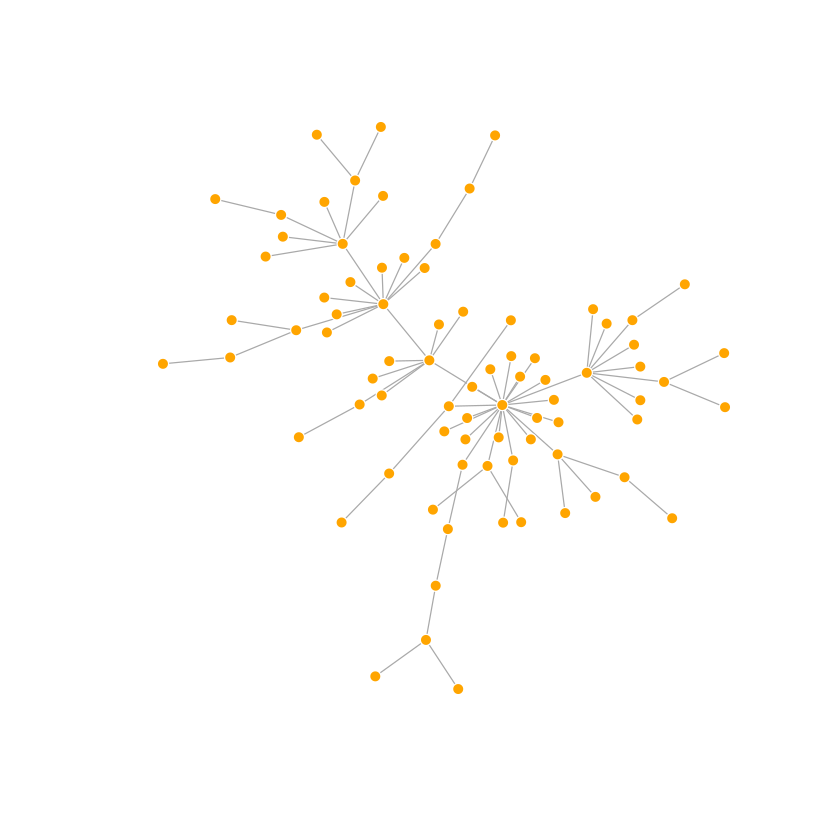

In [85]:
plot(net.bg, layout=layout_with_kk)

### The Bipartite Graph Layout

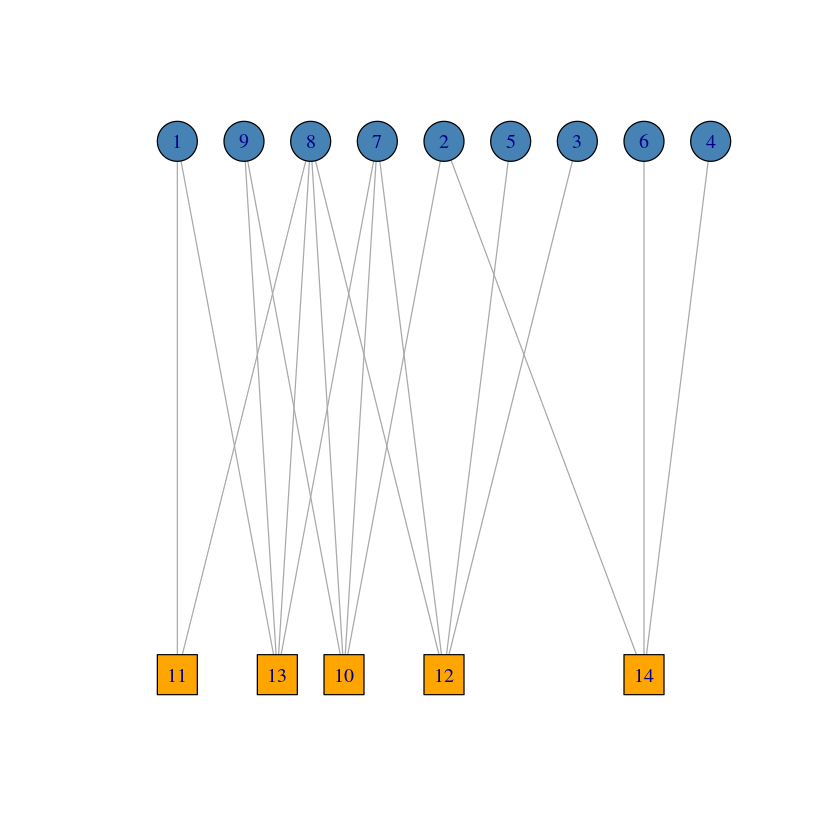

In [86]:
# Generate random bipartite graph

set.seed(123)
g <- sample_bipartite(10, 5, p=.4)

# Delete isolates
g <- g - V(g)[degree(g)==0]

# Define color and shape 
col <- c("steelblue", "orange")
shape <- c("circle", "square")

plot(g,
  vertex.color = col[as.numeric(V(g)$type)+1],
  vertex.shape = shape[as.numeric(V(g)$type)+1],
     layout=layout.bipartite
)

<a id='2.5'></a>
### 2.5 Vertex and Edge Attributes in *igraph*

In [87]:
# The following data can be downloaded from 
# http://www.kateto.net/wordpress/wp-content/uploads/2016/01/netscix2016.zip

nodes <- read.csv("Dataset1-Media-Example-NODES.csv", header=T, as.is=T)
links <- read.csv("Dataset1-Media-Example-EDGES.csv", header=T, as.is=T)

In [88]:
# Examine the data

head(nodes)
head(links)
nrow(nodes); length(unique(nodes$id))
nrow(links); nrow(unique(links[,c("from", "to")]))

id  media               media.type type.label audience.size
1 s01 NY Times            1          Newspaper  20           
2 s02 Washington Post     1          Newspaper  25           
3 s03 Wall Street Journal 1          Newspaper  30           
4 s04 USA Today           1          Newspaper  32           
5 s05 LA Times            1          Newspaper  20           
6 s06 New York Post       1          Newspaper  50

from to  weight type     
1 s01  s02 10     hyperlink
2 s01  s02 12     hyperlink
3 s01  s03 22     hyperlink
4 s01  s04 21     hyperlink
5 s04  s11 22     mention  
6 s05  s15 21     mention

[1] 17

[1] 17

[1] 52

[1] 49

In [89]:
# Convert the above multigraph to a weighted graph

links <- aggregate(links[,3], links[,-3], sum)
links <- links[order(links$from, links$to),]
colnames(links)[4] <- "weight"
rownames(links) <- NULL

In [90]:
# Get the network object (in igraph)

net <- graph_from_data_frame(d=links, vertices=nodes, directed=T) 
net

IGRAPH DNW- 17 49 -- 
+ attr: name (v/c), media (v/c), media.type (v/n), type.label (v/c),
| audience.size (v/n), type (e/c), weight (e/n)
+ edges (vertex names):
 [1] s01->s02 s01->s03 s01->s04 s01->s15 s02->s01 s02->s03 s02->s09 s02->s10
 [9] s03->s01 s03->s04 s03->s05 s03->s08 s03->s10 s03->s11 s03->s12 s04->s03
[17] s04->s06 s04->s11 s04->s12 s04->s17 s05->s01 s05->s02 s05->s09 s05->s15
[25] s06->s06 s06->s16 s06->s17 s07->s03 s07->s08 s07->s10 s07->s14 s08->s03
[33] s08->s07 s08->s09 s09->s10 s10->s03 s12->s06 s12->s13 s12->s14 s13->s12
[41] s13->s17 s14->s11 s14->s13 s15->s01 s15->s04 s15->s06 s16->s06 s16->s17
[49] s17->s04

In [91]:
# Access edges and vertices

E(net)       
V(net)       
E(net)$type  
V(net)$media

+ 49/49 edges (vertex names):
 [1] s01->s02 s01->s03 s01->s04 s01->s15 s02->s01 s02->s03 s02->s09 s02->s10
 [9] s03->s01 s03->s04 s03->s05 s03->s08 s03->s10 s03->s11 s03->s12 s04->s03
[17] s04->s06 s04->s11 s04->s12 s04->s17 s05->s01 s05->s02 s05->s09 s05->s15
[25] s06->s06 s06->s16 s06->s17 s07->s03 s07->s08 s07->s10 s07->s14 s08->s03
[33] s08->s07 s08->s09 s09->s10 s10->s03 s12->s06 s12->s13 s12->s14 s13->s12
[41] s13->s17 s14->s11 s14->s13 s15->s01 s15->s04 s15->s06 s16->s06 s16->s17
[49] s17->s04

+ 17/17 vertices, named:
 [1] s01 s02 s03 s04 s05 s06 s07 s08 s09 s10 s11 s12 s13 s14 s15 s16 s17

[1] "hyperlink" "hyperlink" "hyperlink" "mention"   "hyperlink" "hyperlink"
 [7] "hyperlink" "hyperlink" "hyperlink" "hyperlink" "hyperlink" "hyperlink"
[13] "mention"   "hyperlink" "hyperlink" "hyperlink" "mention"   "mention"  
[19] "hyperlink" "mention"   "mention"   "hyperlink" "hyperlink" "mention"  
[25] "hyperlink" "hyperlink" "mention"   "mention"   "mention"   "hyperlink"
[31] "mention"   "hyperlink" "mention"   "mention"   "mention"   "hyperlink"
[37] "mention"   "hyperlink" "mention"   "hyperlink" "mention"   "mention"  
[43] "mention"   "hyperlink" "hyperlink" "hyperlink" "hyperlink" "mention"  
[49] "hyperlink"

[1] "NY Times"            "Washington Post"     "Wall Street Journal"
 [4] "USA Today"           "LA Times"            "New York Post"      
 [7] "CNN"                 "MSNBC"               "FOX News"           
[10] "ABC"                 "BBC"                 "Yahoo News"         
[13] "Google News"         "Reuters.com"         "NYTimes.com"        
[16] "WashingtonPost.com"  "AOL.com"

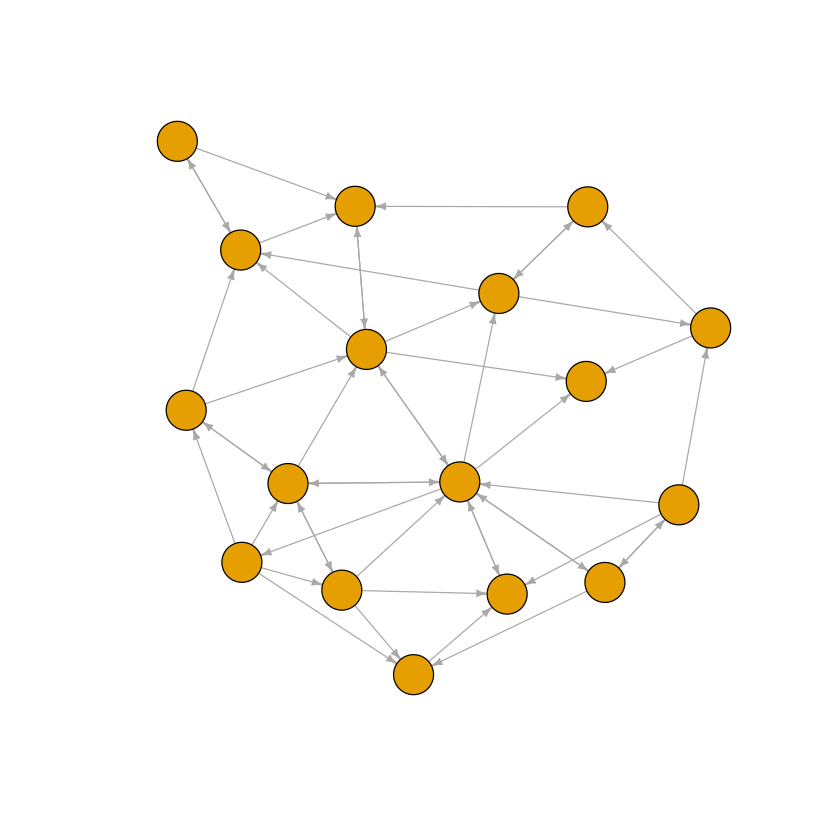

In [92]:
# Plot after removing multiedges and self-loops

net <- simplify(net, remove.multiple = F, remove.loops = T)
plot(net, edge.arrow.size=.4,vertex.label=NA)

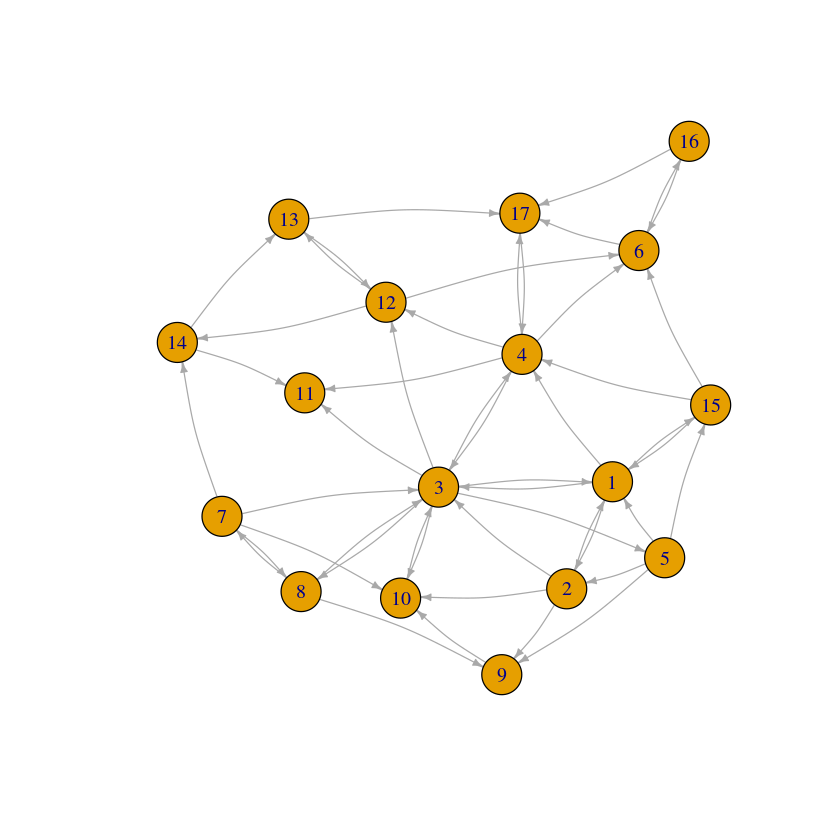

In [93]:
# Plot with curved edges (edge.curved=.1) and include indices of vertices as their names

plot(net, edge.arrow.size=.4, edge.curved=.1,,vertex.label=V(net))

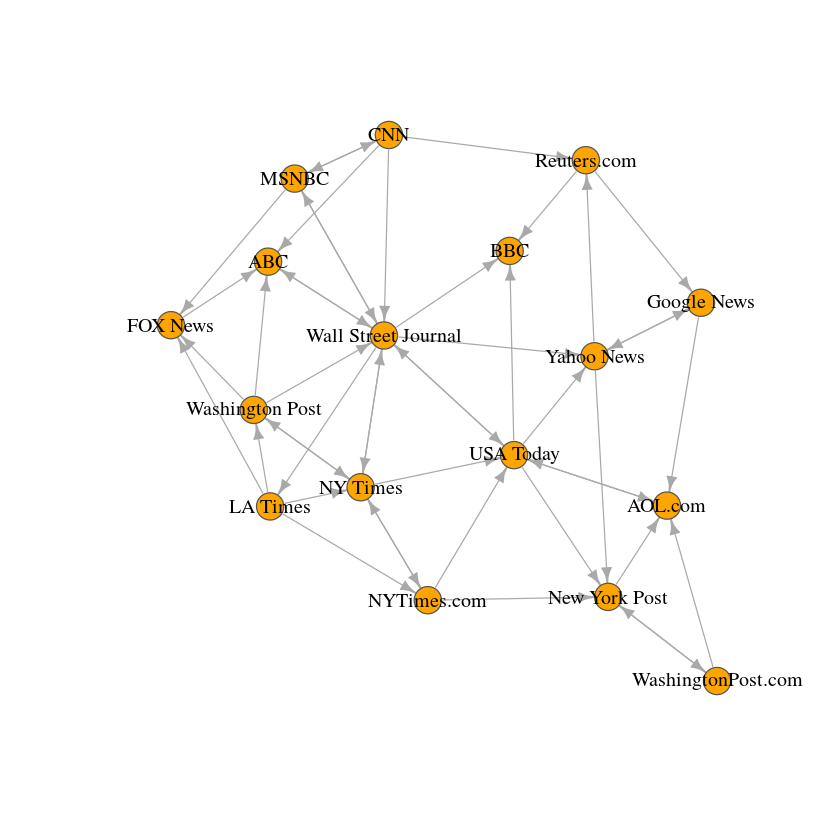

In [94]:
# Set edge color to gray, and the node color to orange. 
# Replace the vertex label with the node names stored in "media"

plot(net, edge.arrow.size=.6, edge.curved=0,vertex.size=10,
     vertex.color="orange", vertex.frame.color="#555555",
     vertex.label=V(net)$media, vertex.label.color="black",
     vertex.label.cex=1) 

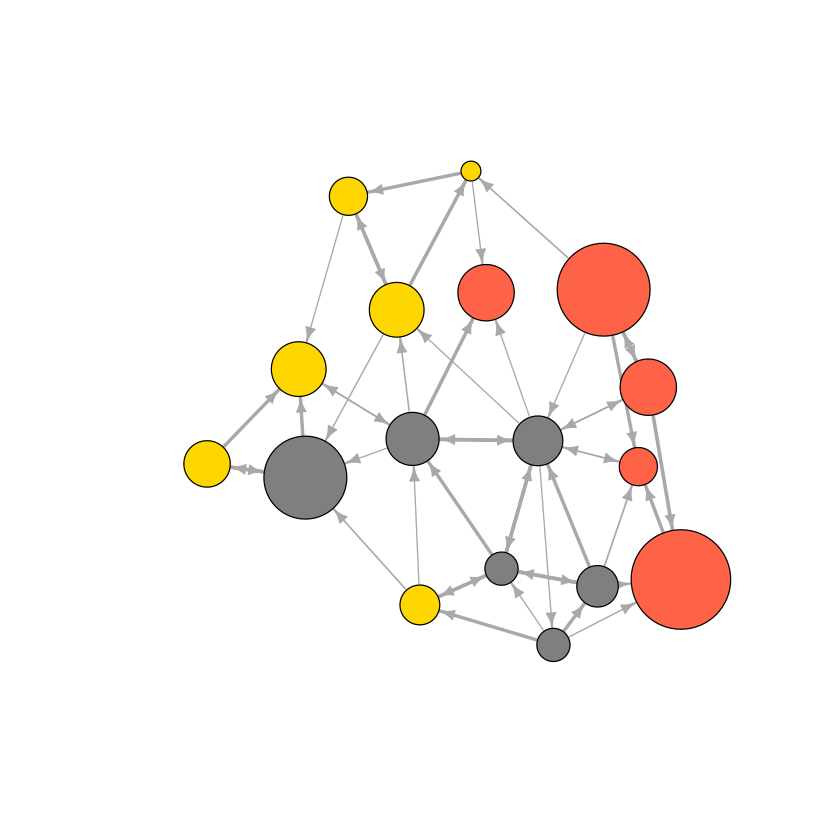

In [95]:
# Generate colors based on media type:

colrs <- c("gray50", "tomato", "gold")
V(net)$color <- colrs[V(net)$media.type]

# Set node size based on audience size:
V(net)$size <- V(net)$audience.size*0.7

# The labels are currently node IDs.
# Setting them to NA will render no labels:

V(net)$label.color <- "black"
V(net)$label <- NA

# Set edge width based on weight:
E(net)$width <- E(net)$weight/6

#change arrow size and edge color:
E(net)$arrow.size <- .2
E(net)$edge.color <- "gray80"

E(net)$width <- 1+E(net)$weight/12

plot(net,edge.arrow.size=.6)

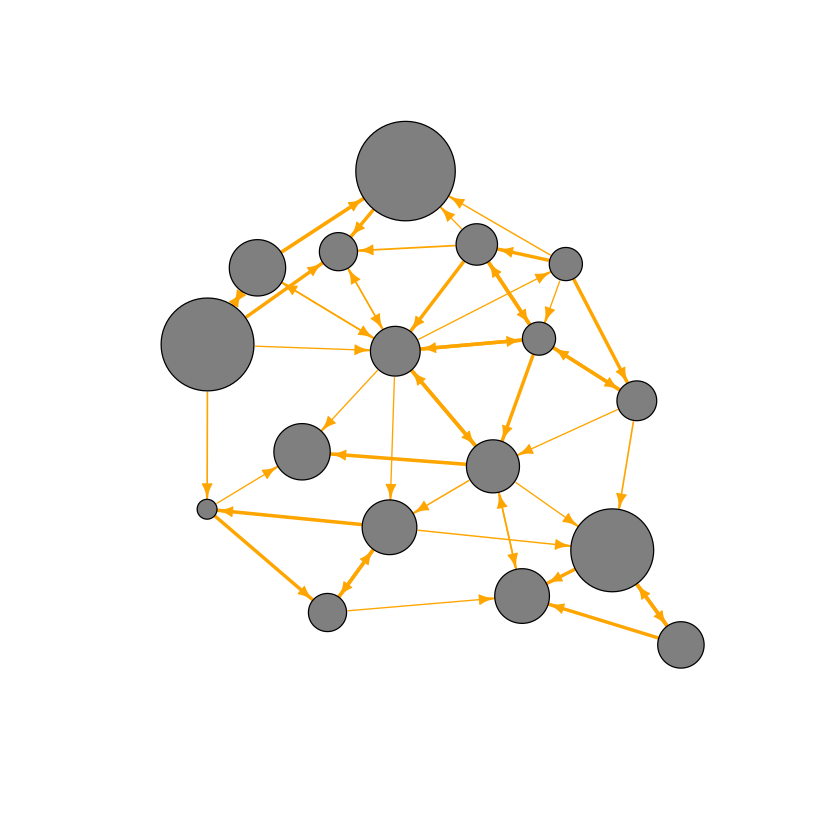

In [96]:
# We can also override the attributes explicitly in the plot

plot(net, edge.color="orange", vertex.color="gray50",edge.arrow.size=.6) 

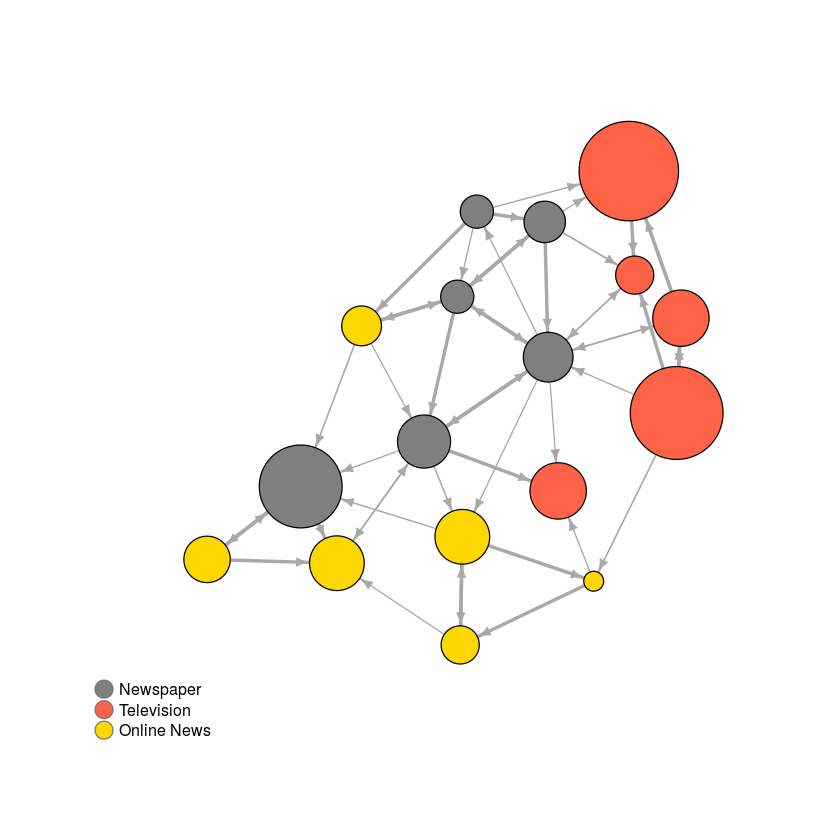

In [97]:
# Add a legend explaining the meaning of the colors we used:

plot(net,edge.arrow.size=.5) 
legend(x=-1.5, y=-1.1, c("Newspaper","Television", "Online News"), pch=21,
       col="#777777", pt.bg=colrs, pt.cex=2, cex=.8, bty="n", ncol=1)

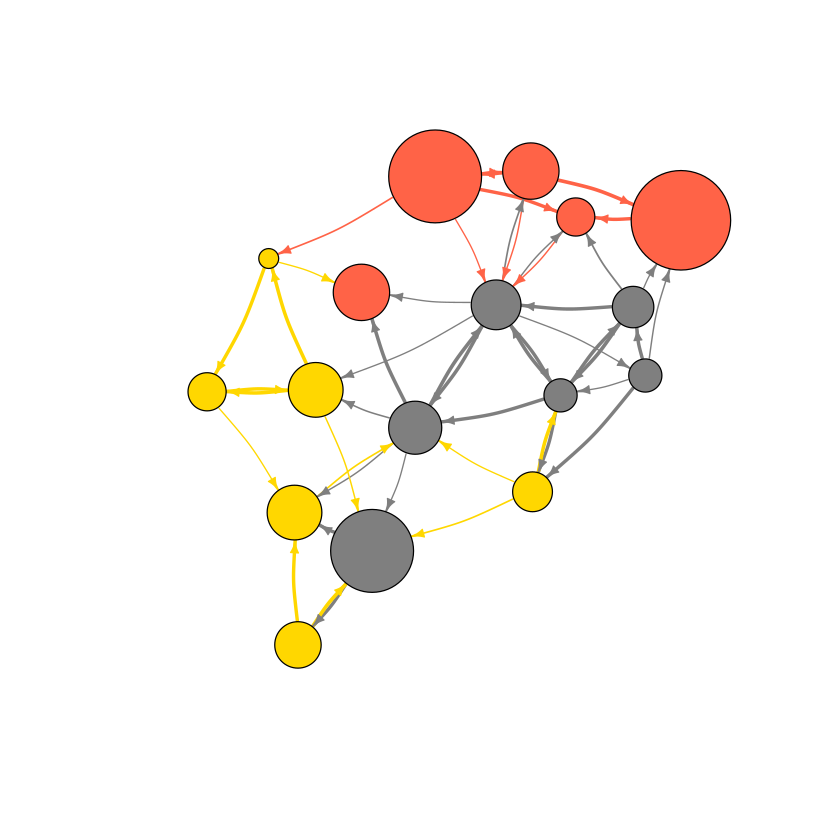

In [98]:
# Coloring the edges of the graph based on their source node color. 
# We can get the starting node for each edge with the ends() igraph function.

edge.start <- ends(net, es=E(net), names=F)[,1]
edge.col <- V(net)$color[edge.start]
plot(net, edge.color=edge.col, edge.curved=.1,edge.arrow.size=.5)  